# IMPORT LIBRARIES

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score, cohen_kappa_score

from sklearn.model_selection import GroupKFold
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, make_scorer

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from collections import defaultdict

# MERGE D7 AND D8

In [2]:
d7 = pd.read_csv("d7_null.csv")
d8 = pd.read_csv("d8_null.csv")

In [3]:
d7_d8 = pd.concat((d7, d8), ignore_index=True)
d7_d8

,Participant,Paragraph,PP_Gazes,PP_AOI_Gazes,PP_OffscreenPix,PP_OffscreenProp,PP_2_Gazes,PP_2_AOI_Gazes,PP_2_OffscreenPix,PP_2_OffscreenProp,...,PP_3_JJS,PP_3_MD,PP_3_VB,PP_3_RB,PP_3_VBZ,PP_3_RBS,PP_3_JJR,PP_3_WRB,PP_3_RBR,TUT
0,5b07b71c68eff50001d1c859,4,-0.603115,-0.760665,0.730738,0.517160,-0.890047,-0.838912,0.152591,-0.002734,...,0.0,-0.408349,-0.632643,-0.935216,-0.544481,0.0,-0.408349,-0.408349,0.0,0
1,5b07b71c68eff50001d1c859,10,-0.944236,-0.751543,-0.261507,-0.394614,-0.706923,-0.814176,0.444325,0.249157,...,0.0,-0.408349,-0.632643,-0.935216,0.407957,0.0,-0.408349,-0.408349,0.0,0
2,5b07b71c68eff50001d1c859,15,-0.886534,-0.602557,-0.547080,-0.614850,-0.941487,-0.533837,-0.546471,-0.607271,...,0.0,-0.408349,1.580670,0.935216,2.312831,0.0,2.448884,-0.408349,0.0,0
3,5b07b71c68eff50001d1c859,20,-0.613298,-0.249856,-0.566441,-0.522351,-1.038193,-0.727601,-0.590506,-0.692914,...,0.0,-0.408349,-0.632643,0.000000,-0.544481,0.0,-0.408349,-0.408349,0.0,1
4,5b07b71c68eff50001d1c859,26,-0.635360,-0.611679,0.183793,0.125141,-0.890047,-0.558573,-0.496931,-0.526666,...,0.0,-0.408349,-0.632643,1.870432,-0.544481,0.0,-0.408349,-0.408349,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,63052f20afc39e87110eb83e,15,0.043488,-0.636003,-0.092100,-0.214021,1.025559,-0.125697,1.038803,0.803317,...,0.0,-0.408349,1.580670,0.935216,2.312831,0.0,2.448884,-0.408349,0.0,1
227,63052f20afc39e87110eb83e,20,2.051181,1.246085,-0.125981,0.006214,-0.408574,-0.706987,-0.133639,-0.219359,...,0.0,-0.408349,-0.632643,0.000000,-0.544481,0.0,-0.408349,-0.408349,0.0,0
228,63052f20afc39e87110eb83e,26,1.212804,1.534935,-0.106620,-0.064261,1.165474,0.727686,0.081033,0.526237,...,0.0,-0.408349,-0.632643,1.870432,-0.544481,0.0,-0.408349,-0.408349,0.0,0
229,63052f20afc39e87110eb83e,31,0.673119,-0.660327,1.669740,1.719645,1.840360,0.822507,1.088343,1.382665,...,0.0,2.448884,1.580670,-0.935216,-0.544481,0.0,-0.408349,-0.408349,0.0,0


In [4]:
# save file
# d7_d8.to_csv("d7_d8_null.csv", index=False)

# READ ALL CSV FILES

In [5]:
df_all = pd.read_csv("all_null.csv")
df_neurotypical = pd.read_csv("neurotypical_null.csv")
df_neurodivergent = pd.read_csv("neurodivergent_null.csv")
df_d1 = pd.read_csv("d1_null.csv")
df_d2 = pd.read_csv("d2_null.csv")
df_d3 = pd.read_csv("d3_null.csv")
df_d4 = pd.read_csv("d4_null.csv")
df_d5 = pd.read_csv("d5_null.csv")
df_d6 = pd.read_csv("d6_null.csv")
df_d7_d8 = pd.read_csv("d7_d8_null.csv")

In [6]:
num_instance = len(df_all)
num_instance

2359

In [7]:
num_participants = df_all['Participant'].nunique()
num_participants

337

# NUMBER OF PARTICIPANTS, INSTANCES, BASE RATE NULL

In [10]:
# List of DataFrames
dataframes = [
    ('df_all', df_all),
    ('df_neurotypical', df_neurotypical),
    ('df_neurodivergent', df_neurodivergent),
    ('df_d1', df_d1),
    ('df_d2', df_d2),
    ('df_d3', df_d3),
    ('df_d4', df_d4),
    ('df_d5', df_d5),
    ('df_d6', df_d6),
    ('df_d7_d8', df_d7_d8)
]

def calculate_statistics(df):
    num_participants = df['Participant'].nunique()
    num_instances = len(df) 
    base_rate = df['TUT'].mean()
    return num_participants, num_instances, base_rate

for i, (name, df) in enumerate(dataframes, start=1):
    num_participants, num_instances, base_rate = calculate_statistics(df)
    print(f"{name}:")
    print(f"  Number of participants = {num_participants}")
    print(f"  Number of instances = {num_instances}")
    print(f"  Base Rate: {base_rate:.2f}")

df_all:
  Number of participants = 337
  Number of instances = 2359
  Base Rate: 0.33
df_neurotypical:
  Number of participants = 171
  Number of instances = 1197
  Base Rate: 0.27
df_neurodivergent:
  Number of participants = 166
  Number of instances = 1162
  Base Rate: 0.38
df_d1:
  Number of participants = 69
  Number of instances = 483
  Base Rate: 0.50
df_d2:
  Number of participants = 60
  Number of instances = 420
  Base Rate: 0.45
df_d3:
  Number of participants = 13
  Number of instances = 91
  Base Rate: 0.54
df_d4:
  Number of participants = 13
  Number of instances = 91
  Base Rate: 0.47
df_d5:
  Number of participants = 83
  Number of instances = 581
  Base Rate: 0.43
df_d6:
  Number of participants = 36
  Number of instances = 252
  Base Rate: 0.40
df_d7_d8:
  Number of participants = 33
  Number of instances = 231
  Base Rate: 0.29


# REMOVE NULL VALUES

In [18]:
# check for null values

def remove_null(df):
#     print(df.isnull().sum())
    
    # Drop rows with null values
    df_no_null = df.dropna()
    
#     print(df_no_null.isnull().sum())
    
    return df_no_null
    
df_all_clean = remove_null(df_all)
df_typical_clean = remove_null(df_neurotypical)
df_divergent_clean = remove_null(df_neurodivergent)
df_d1_clean = remove_null(df_d1)
df_d2_clean = remove_null(df_d2)
df_d3_clean = remove_null(df_d3)
df_d4_clean = remove_null(df_d4)
df_d5_clean = remove_null(df_d5)
df_d6_clean = remove_null(df_d6)
df_d7_d8_clean = remove_null(df_d7_d8)


In [21]:
# #save files after removing null values
# df_all_clean.to_csv("all_clean.csv", index=False)
# df_typical_clean.to_csv("neurotypical_clean.csv", index=False)
# df_divergent_clean.to_csv("neurodivergent_clean.csv", index=False)
# df_d1_clean.to_csv("d1_clean.csv", index=False)
# df_d2_clean.to_csv("d2_clean.csv", index=False)
# df_d3_clean.to_csv("d3_clean.csv", index=False)
# df_d4_clean.to_csv("d4_clean.csv", index=False)
# df_d5_clean.to_csv("d5_clean.csv", index=False)
# df_d6_clean.to_csv("d6_clean.csv", index=False)
# df_d7_d8_clean.to_csv("d7_d8_clean.csv", index=False)


# READ FILES WITH NO NULL 

In [2]:
df_all_clean = pd.read_csv("all_clean.csv")
df_typical_clean = pd.read_csv("neurotypical_clean.csv")
df_divergent_clean = pd.read_csv("neurodivergent_clean.csv")
df_d1_clean = pd.read_csv("d1_clean.csv")
df_d2_clean = pd.read_csv("d2_clean.csv")
df_d3_clean = pd.read_csv("d3_clean.csv")
df_d4_clean = pd.read_csv("d4_clean.csv")
df_d5_clean = pd.read_csv("d5_clean.csv")
df_d6_clean = pd.read_csv("d6_clean.csv")
df_d7_d8_clean = pd.read_csv("d7_d8_clean.csv")

# NUMBER OF PARTICIPANTS, INSTANCES, BASE RATE NO NULL

In [23]:
# List of DataFrames
dataframes = [
    ('df_all_clean', df_all_clean),
    ('df_typical_clean', df_typical_clean),
    ('df_divergent_clean', df_divergent_clean),
    ('df_d1_clean', df_d1_clean),
    ('df_d2_clean', df_d2_clean),
    ('df_d3_clean', df_d3_clean),
    ('df_d4_clean', df_d4_clean),
    ('df_d5_clean', df_d5_clean),
    ('df_d6_clean', df_d6_clean),
    ('df_d7_d8_clean', df_d7_d8_clean)
]

def calculate_statistics(df):
    num_participants = df['Participant'].nunique()
    num_instances = len(df) 
    base_rate = df['TUT'].mean()
    return num_participants, num_instances, base_rate

for i, (name, df) in enumerate(dataframes, start=1):
    num_participants, num_instances, base_rate = calculate_statistics(df)
    print(f"{name}:")
    print(f"  Number of participants = {num_participants}")
    print(f"  Number of instances = {num_instances}")
    print(f"  Base Rate: {base_rate:.2f}")

df_all_clean:
  Number of participants = 317
  Number of instances = 1978
  Base Rate: 0.33
df_typical_clean:
  Number of participants = 161
  Number of instances = 998
  Base Rate: 0.26
df_divergent_clean:
  Number of participants = 156
  Number of instances = 980
  Base Rate: 0.39
df_d1_clean:
  Number of participants = 68
  Number of instances = 428
  Base Rate: 0.50
df_d2_clean:
  Number of participants = 60
  Number of instances = 389
  Base Rate: 0.45
df_d3_clean:
  Number of participants = 13
  Number of instances = 77
  Base Rate: 0.56
df_d4_clean:
  Number of participants = 13
  Number of instances = 76
  Base Rate: 0.43
df_d5_clean:
  Number of participants = 81
  Number of instances = 492
  Base Rate: 0.43
df_d6_clean:
  Number of participants = 32
  Number of instances = 203
  Base Rate: 0.43
df_d7_d8_clean:
  Number of participants = 30
  Number of instances = 191
  Base Rate: 0.27


# LIST OF FEATURE COMBINATIONS

In [ ]:

#NLP
features = [ "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", "wordCount_without_stopwords", 
            "syllableCount_without_stopwords", "sentiment", "PP_CD", "PP_NN", "PP_JJ", "PP_VBN", "PP_VBP", "PP_NNS", "PP_VBD", 
            "PP_VBG", "PP_DT", "PP_IN", "PP_JJS", "PP_MD", "PP_VB", "PP_RB", "PP_VBZ", "PP_RBS", "PP_JJR", "PP_WRB", "PP_RBR", 
            "PP_2_CD", "PP_2_NN", "PP_2_JJ", "PP_2_VBN", "PP_2_VBP", "PP_2_NNS", "PP_2_VBD", "PP_2_VBG", "PP_2_DT", "PP_2_IN", 
            "PP_2_JJS", "PP_2_MD", "PP_2_VB", "PP_2_RB", "PP_2_VBZ", "PP_2_RBS", "PP_2_JJR", "PP_2_WRB", "PP_2_RBR", "PP_3_CD", 
            "PP_3_NN", "PP_3_JJ", "PP_3_VBN", "PP_3_VBP", "PP_3_NNS", "PP_3_VBD", "PP_3_VBG", "PP_3_DT", "PP_3_IN", "PP_3_JJS", 
            "PP_3_MD", "PP_3_VB", "PP_3_RB", "PP_3_VBZ", "PP_3_RBS", "PP_3_JJR", "PP_3_WRB", "PP_3_RBR"

]

#Gaze + fixation
features = ["PP_Gazes", "PP_AOI_Gazes", "PP_OffscreenPix", "PP_OffscreenProp", "PP_2_Gazes", "PP_2_AOI_Gazes", 
            "PP_2_OffscreenPix", "PP_2_OffscreenProp", "PP_3_Gazes", "PP_3_AOI_Gazes", "PP_3_OffscreenPix", 
            "PP_3_OffscreenProp", "PP_cluster_num_clusters", "PP_cluster_avg_duration", "PP_cluster_sd_duration", 
            "PP_cluster_skew_duration", "PP_dispersion", "PP_2_cluster_num_clusters", "PP_2_cluster_avg_duration", 
            "PP_2_cluster_sd_duration", "PP_2_cluster_skew_duration", "PP_2_dispersion", "PP_3_cluster_num_clusters", 
            "PP_3_cluster_avg_duration", "PP_3_cluster_sd_duration", "PP_3_cluster_skew_duration", "PP_3_dispersion"
]

#Gaze + fixation + NLP
features = [ "PP_Gazes", "PP_AOI_Gazes", "PP_OffscreenPix", "PP_OffscreenProp", "PP_2_Gazes", "PP_2_AOI_Gazes", 
            "PP_2_OffscreenPix", "PP_2_OffscreenProp", "PP_3_Gazes", "PP_3_AOI_Gazes", "PP_3_OffscreenPix", 
            "PP_3_OffscreenProp", "PP_cluster_num_clusters", "PP_cluster_avg_duration", "PP_cluster_sd_duration", 
            "PP_cluster_skew_duration", "PP_dispersion", "PP_2_cluster_num_clusters", "PP_2_cluster_avg_duration", 
            "PP_2_cluster_sd_duration", "PP_2_cluster_skew_duration", "PP_2_dispersion", "PP_3_cluster_num_clusters", 
            "PP_3_cluster_avg_duration", "PP_3_cluster_sd_duration", "PP_3_cluster_skew_duration", "PP_3_dispersion", 
            "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", "wordCount_without_stopwords", 
            "syllableCount_without_stopwords", "sentiment", "PP_CD", "PP_NN", "PP_JJ", "PP_VBN", "PP_VBP", "PP_NNS", "PP_VBD", 
            "PP_VBG", "PP_DT", "PP_IN", "PP_JJS", "PP_MD", "PP_VB", "PP_RB", "PP_VBZ", "PP_RBS", "PP_JJR", "PP_WRB", "PP_RBR", 
            "PP_2_CD", "PP_2_NN", "PP_2_JJ", "PP_2_VBN", "PP_2_VBP", "PP_2_NNS", "PP_2_VBD", "PP_2_VBG", "PP_2_DT", "PP_2_IN", 
            "PP_2_JJS", "PP_2_MD", "PP_2_VB", "PP_2_RB", "PP_2_VBZ", "PP_2_RBS", "PP_2_JJR", "PP_2_WRB", "PP_2_RBR", "PP_3_CD", 
            "PP_3_NN", "PP_3_JJ", "PP_3_VBN", "PP_3_VBP", "PP_3_NNS", "PP_3_VBD", "PP_3_VBG", "PP_3_DT", "PP_3_IN", "PP_3_JJS", 
            "PP_3_MD", "PP_3_VB", "PP_3_RB", "PP_3_VBZ", "PP_3_RBS", "PP_3_JJR", "PP_3_WRB", "PP_3_RBR"
]

# FUNCTION FOR MODELING

In [7]:
def train_and_evaluate(df, features):
    X = df[features]
    y = df['TUT']
    
    # Define classifiers and parameter grids
    classifiers = {
        'Chance': DummyClassifier(strategy="stratified"),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "SVM": SVC(random_state=42, probability=True), 
        "XGBoost": xgb.XGBClassifier(random_state=42)
    }

    param_grid_RF = {
        'criterion': ['entropy', 'gini'],
        'max_depth': [10, 20],
        'max_features': ['sqrt', 'log2'],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [50, 100, 200],
    }

    param_grid_SVM = {
        'C': [0.1, 1, 10],
        'kernel': ['linear']
    }

    param_grid_XGB = {
        'colsample_bytree': [0.8, 1.0],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [10, 20],
        'min_child_weight': [1, 3, 5],
        'n_estimators': [50, 100, 200],
        'subsample': [0.8, 1.0],
    }

    param_grids = {
        'Random Forest': param_grid_RF,
        'SVM': param_grid_SVM,
        'XGBoost': param_grid_XGB
    }

    precision_dict = {}
    recall_dict = {}
    kappa_dict = {}
    auroc_score_barplot = {name: [] for name in classifiers}
    
    # Fit PCA to determine the number of components that explain 95% of the variance
    pca = PCA().fit(X)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(cumulative_variance >= 0.95) + 1

    # Define the number of folds for cross-validation
    n_splits = 5
    gkf = GroupKFold(n_splits=n_splits)

    # Loop through the classifiers
    for name, clf in classifiers.items():
        accuracy_scores = []
        weighted_f1_scores = []
        precision_scores = []
        recall_scores = []
        kappa_scores = []
        auroc_scores = []
        confusion_matrices = []
        prediction_rates = []

        # Perform cross-validation
        for train_index, test_index in gkf.split(X, y, groups=df['Participant']):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Apply PCA on the training data
            pca = PCA(n_components=n_components)
            X_train_pca = pca.fit_transform(X_train)
            X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(X_train_pca.shape[1])])

            # Perform oversampling on minority class
            smote = SMOTE()
            X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca_df, y_train)

            # Apply the transformation to the test data
            X_test_pca = pca.transform(X_test)
            X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(X_test_pca.shape[1])])

            if name != "Chance":
                grid = GridSearchCV(clf, param_grids[name], refit=True, verbose=3, scoring='roc_auc', n_jobs=-1)
                grid.fit(X_train_resampled, y_train_resampled)
                best_clf = grid.best_estimator_
                best_clf = best_clf.fit(X_train_resampled, y_train_resampled)
                y_pred = best_clf.predict(X_test_pca_df)
                y_pred_proba = best_clf.predict_proba(X_test_pca_df)[:, 1]
            else:
                best_clf = clf.fit(X_train, y_train)
                y_pred = best_clf.predict(X_test)
                y_pred_proba = best_clf.predict_proba(X_test)[:, 1]

            accuracy = accuracy_score(y_test, y_pred)
            weighted_f1 = f1_score(y_test, y_pred, average='weighted')
            precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
            recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
            kappa = cohen_kappa_score(y_test, y_pred)
            auroc = roc_auc_score(y_test, y_pred_proba)
            confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
            prediction_rate = (confusion_matrix[1, 1] + confusion_matrix[0, 1]) / (confusion_matrix[1, 1] + confusion_matrix[1, 0] + confusion_matrix[0, 1] + confusion_matrix[0, 0])

            accuracy_scores.append(accuracy)
            weighted_f1_scores.append(weighted_f1)
            precision_scores.append(precision)
            recall_scores.append(recall)
            kappa_scores.append(kappa)
            auroc_scores.append(auroc)
            confusion_matrices.append(confusion_matrix)
            prediction_rates.append(prediction_rate)

            auroc_score_barplot[name].append(auroc)

        avg_accuracy = np.mean(accuracy_scores)
        avg_weighted_f1 = np.mean(weighted_f1_scores)
        avg_precision = np.mean(precision_scores)
        avg_recall = np.mean(recall_scores)
        avg_kappa = np.mean(kappa_scores)
        avg_auroc = np.mean(auroc_scores)
        avg_confusion_matrix = np.mean(confusion_matrices, axis=0)
        avg_prediction_rate = np.mean(prediction_rates)

        print(f"{name} Results:")
        print(f"Avg Accuracy: {avg_accuracy:.2f}")
        print(f"Avg Weighted F1 Score: {avg_weighted_f1:.2f}")
        print(f"Avg Precision_1: {avg_precision:.2f}")
        print(f"Avg Recall_1: {avg_recall:.2f}")
        print(f"Avg Kappa: {avg_kappa:.2f}")
        print(f"Avg AUROC: {avg_auroc:.2f}")
        print("Avg Confusion Matrix:")
        print(avg_confusion_matrix)
        print(f"Avg Prediction Rate: {avg_prediction_rate:.2f}\n")

        precision_dict[name] = avg_precision
        recall_dict[name] = avg_recall
        kappa_dict[name] = avg_kappa

    return precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers

def plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers, n_splits=5):
    colors = ['#003F5C', '#FFA600', '#7A5195', '#D62728']

    fig, ax = plt.subplots(2, 1, figsize=(10, 12))

    ax[0].bar(precision_dict.keys(), precision_dict.values(), color=colors)
    ax[0].set_title('Precision Scores by Classifier')
    ax[0].set_xlabel('Classifier')
    ax[0].set_ylabel('Precision Score')
    ax[0].set_ylim([0, 1])

    ax[1].bar(recall_dict.keys(), recall_dict.values(), color=colors)
    ax[1].set_title('Recall Scores by Classifier')
    ax[1].set_xlabel('Classifier')
    ax[1].set_ylabel('Recall Score')
    ax[1].set_ylim([0, 1])

    plt.tight_layout()
    plt.show()

    fig, ax = plt.subplots(figsize=(11, 7))
    bar_width = 0.15  
    gap_width = 0.05 

    bar_positions = np.arange(len(classifiers)) * (n_splits * (bar_width + gap_width))

    for idx, name in enumerate(classifiers):
        scores = auroc_score_barplot[name]
        avg_score = np.mean(scores)
        for fold_idx, score in enumerate(scores):
            bar_pos = bar_positions[idx] + (fold_idx * bar_width)
            ax.bar(bar_pos, score, bar_width, label=name if fold_idx == 0 else "",
                   color=colors[idx], edgecolor='white', linewidth=0.1, alpha=1)
        ax.axhline(y=avg_score, color=colors[idx], linestyle='dashed', linewidth=1.5)
    ax.set_xlabel('Classifiers', fontsize=15)
    ax.set_ylabel('AUROC Score', fontsize=15)
    ax.set_title('AUROC Scores for each Fold, Grouped by Classifiers', fontsize=17)

    ax.set_xticks(bar_positions + ((n_splits * bar_width) / 2) - (bar_width / 2))
    ax.set_xticklabels(classifiers.keys())

    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.legend(loc='lower right', fontsize=13)

    plt.tight_layout()
    plt.show()



# ANALYSIS

## MODELING ALL PARTICIPANTS

### NLP FEATURES

Chance Results:
Avg Accuracy: 0.55
Avg Weighted F1 Score: 0.54
Avg Precision_1: 0.30
Avg Recall_1: 0.29
Avg Kappa: -0.04
Avg AUROC: 0.49
Avg Confusion Matrix:
[[179.8  87.2]
 [ 92.   36.6]]
Avg Prediction Rate: 0.31

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.54
Avg Weighted F1 Score: 0.55
Avg Precision_1: 0.35
Avg Recall_1: 0.43
Avg Kappa: 0.03
Avg AUROC: 0.55
Avg Confusion Matrix:
[[161.2 105.8]
 [ 74.4  54.2]]
Avg Prediction Rate: 0.40

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 

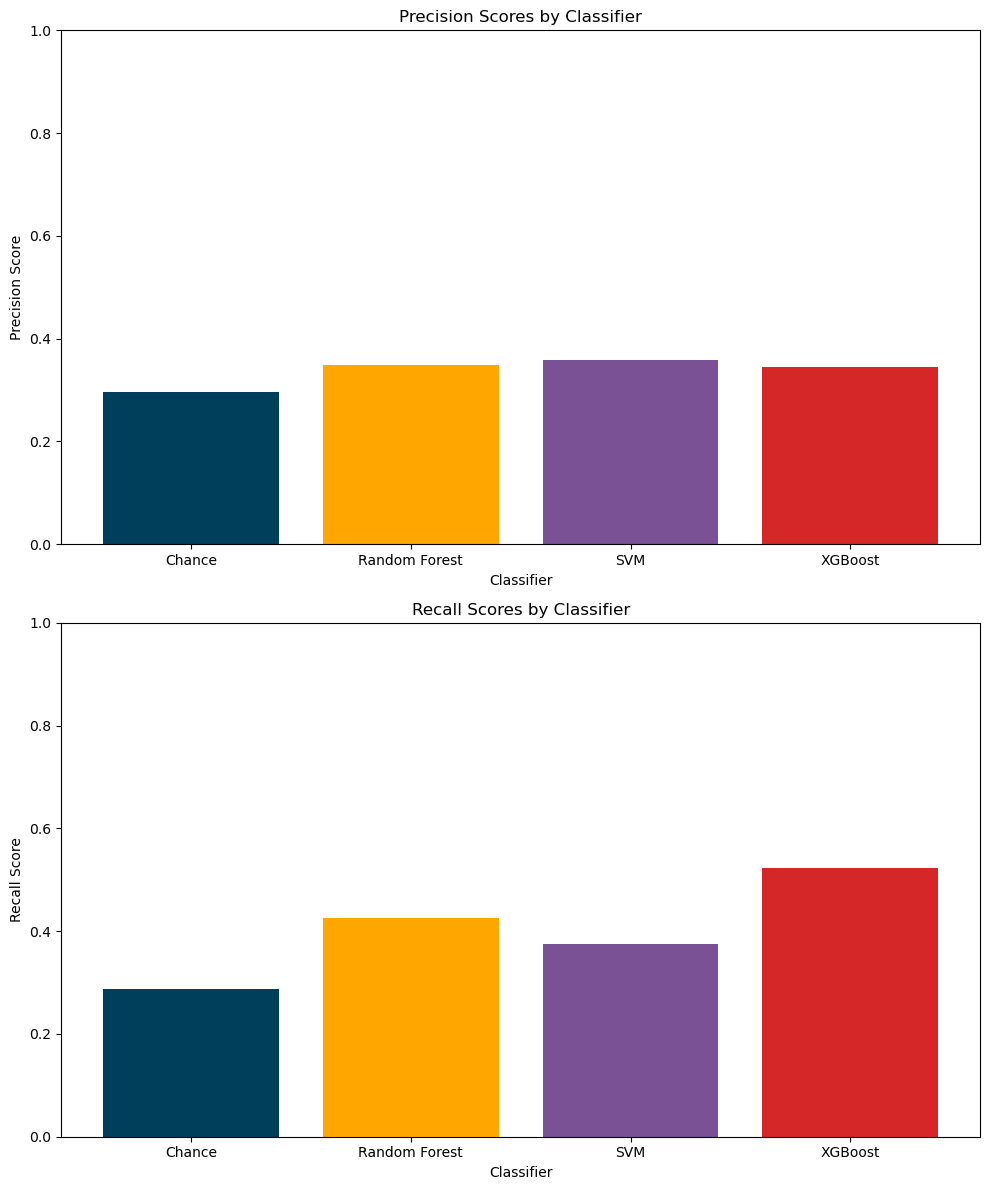

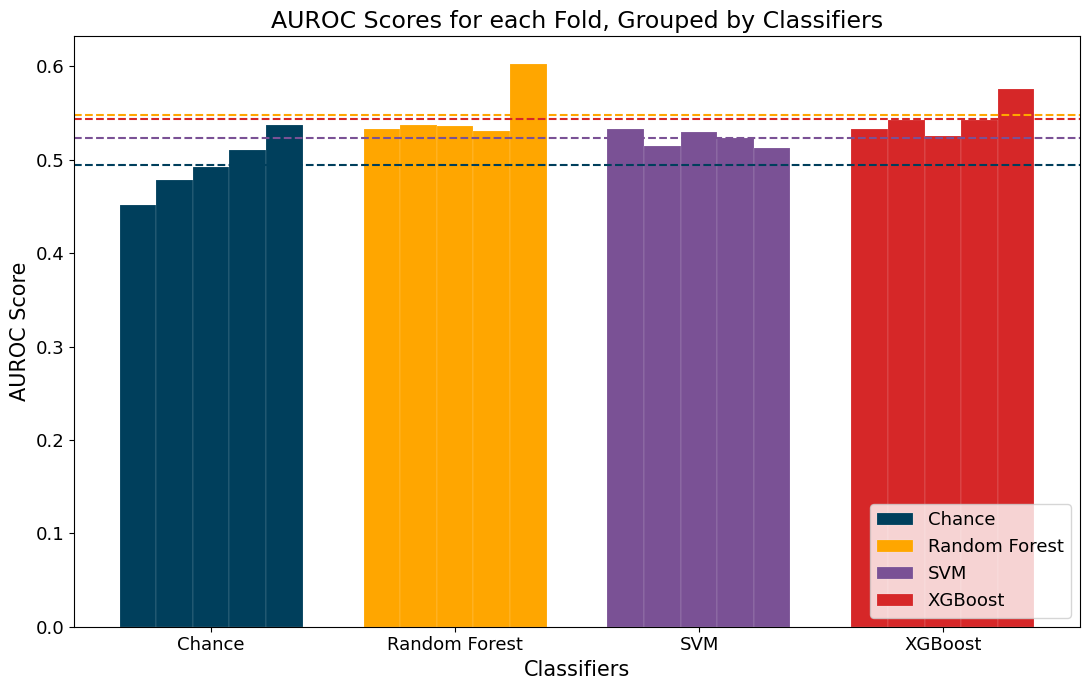

In [8]:
df = df_all_clean
features = ["wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", "wordCount_without_stopwords", 
            "syllableCount_without_stopwords", "sentiment", "PP_CD", "PP_NN", "PP_JJ", "PP_VBN", "PP_VBP", "PP_NNS", "PP_VBD", 
            "PP_VBG", "PP_DT", "PP_IN", "PP_JJS", "PP_MD", "PP_VB", "PP_RB", "PP_VBZ", "PP_RBS", "PP_JJR", "PP_WRB", "PP_RBR", 
            "PP_2_CD", "PP_2_NN", "PP_2_JJ", "PP_2_VBN", "PP_2_VBP", "PP_2_NNS", "PP_2_VBD", "PP_2_VBG", "PP_2_DT", "PP_2_IN", 
            "PP_2_JJS", "PP_2_MD", "PP_2_VB", "PP_2_RB", "PP_2_VBZ", "PP_2_RBS", "PP_2_JJR", "PP_2_WRB", "PP_2_RBR", "PP_3_CD", 
            "PP_3_NN", "PP_3_JJ", "PP_3_VBN", "PP_3_VBP", "PP_3_NNS", "PP_3_VBD", "PP_3_VBG", "PP_3_DT", "PP_3_IN", "PP_3_JJS", 
            "PP_3_MD", "PP_3_VB", "PP_3_RB", "PP_3_VBZ", "PP_3_RBS", "PP_3_JJR", "PP_3_WRB", "PP_3_RBR"]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION FEATURES

Chance Results:
Avg Accuracy: 0.57
Avg Weighted F1 Score: 0.57
Avg Precision_1: 0.33
Avg Recall_1: 0.31
Avg Kappa: 0.00
Avg AUROC: 0.51
Avg Confusion Matrix:
[[184.   83. ]
 [ 88.   40.6]]
Avg Prediction Rate: 0.31

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.60
Avg Weighted F1 Score: 0.58
Avg Precision_1: 0.33
Avg Recall_1: 0.25
Avg Kappa: 0.01
Avg AUROC: 0.51
Avg Confusion Matrix:
[[205.   62. ]
 [ 97.   31.6]]
Avg Prediction Rate: 0.24

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 f

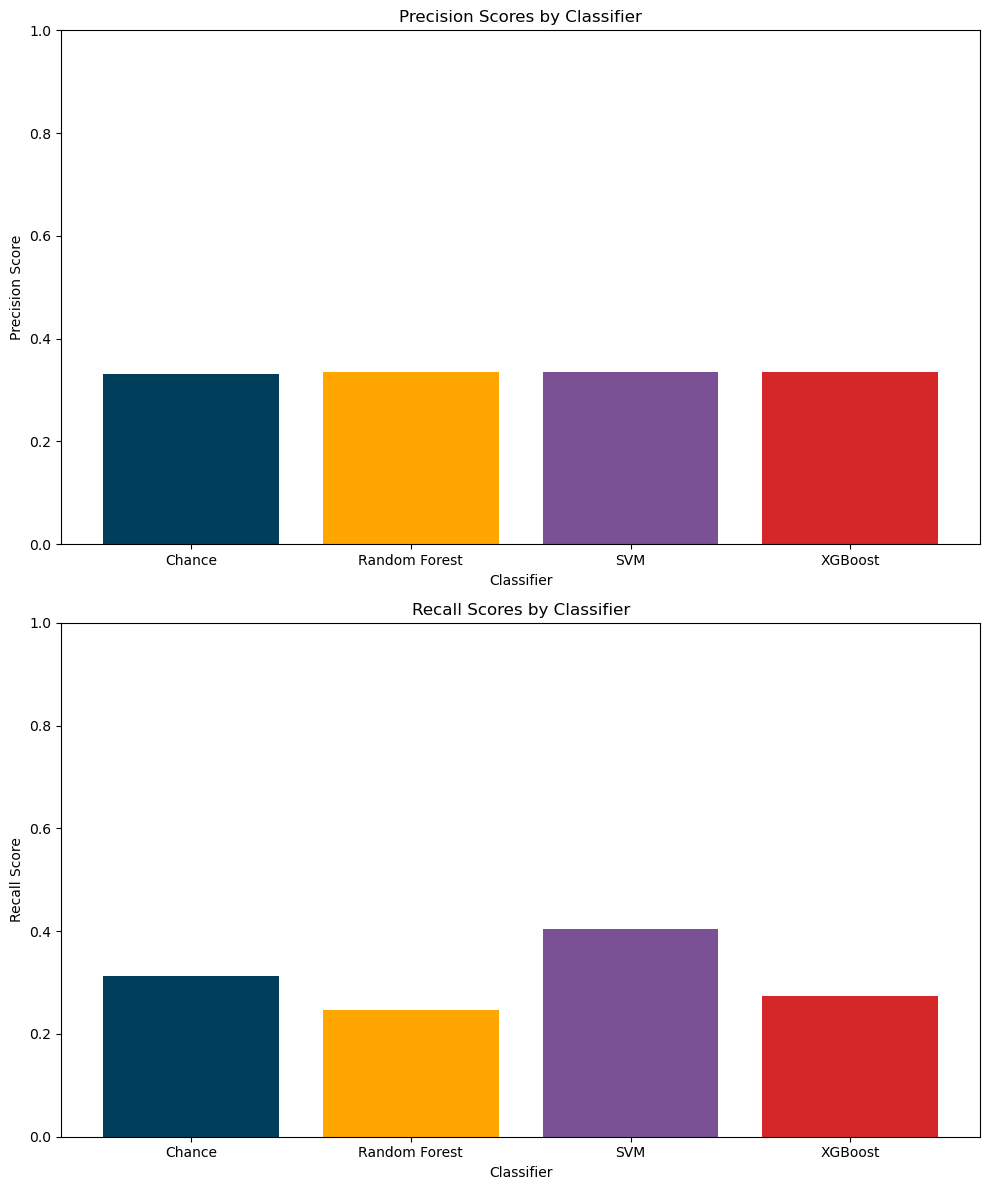

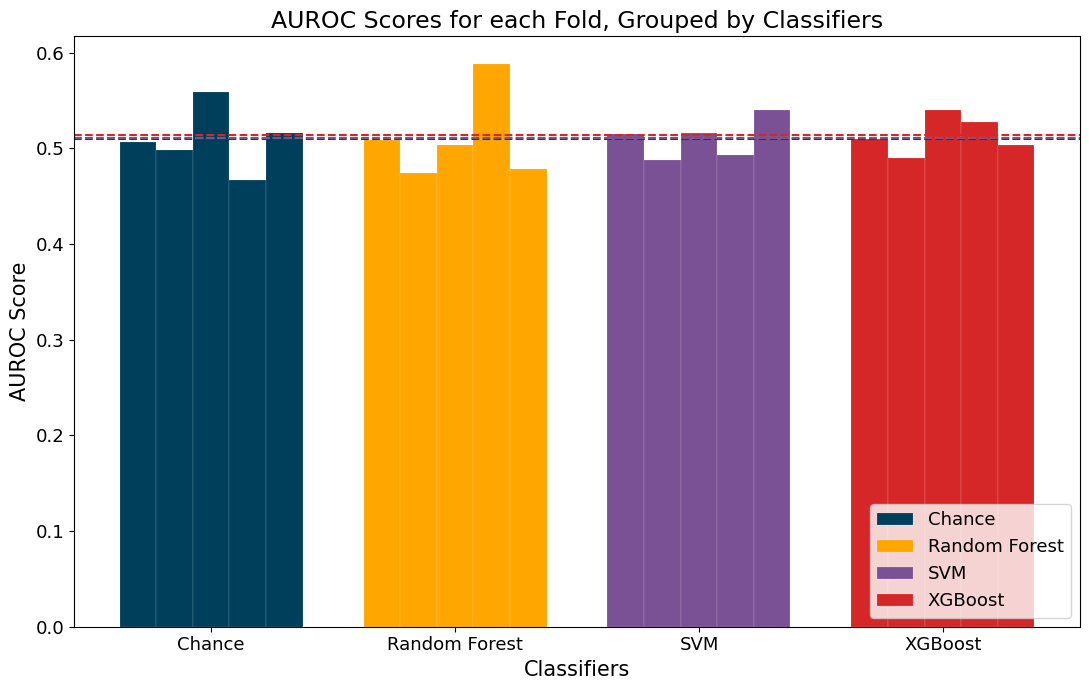

In [11]:
df = df_all_clean
features = ["PP_Gazes", "PP_AOI_Gazes", "PP_OffscreenPix", "PP_OffscreenProp", "PP_2_Gazes", "PP_2_AOI_Gazes", 
            "PP_2_OffscreenPix", "PP_2_OffscreenProp", "PP_3_Gazes", "PP_3_AOI_Gazes", "PP_3_OffscreenPix", 
            "PP_3_OffscreenProp", "PP_cluster_num_clusters", "PP_cluster_avg_duration", "PP_cluster_sd_duration", 
            "PP_cluster_skew_duration", "PP_dispersion", "PP_2_cluster_num_clusters", "PP_2_cluster_avg_duration", 
            "PP_2_cluster_sd_duration", "PP_2_cluster_skew_duration", "PP_2_dispersion", "PP_3_cluster_num_clusters", 
            "PP_3_cluster_avg_duration", "PP_3_cluster_sd_duration", "PP_3_cluster_skew_duration", "PP_3_dispersion"
]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + NLP

Chance Results:
Avg Accuracy: 0.54
Avg Weighted F1 Score: 0.54
Avg Precision_1: 0.29
Avg Recall_1: 0.27
Avg Kappa: -0.05
Avg AUROC: 0.51
Avg Confusion Matrix:
[[180.4  86.6]
 [ 93.6  35. ]]
Avg Prediction Rate: 0.31

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.59
Avg Weighted F1 Score: 0.58
Avg Precision_1: 0.35
Avg Recall_1: 0.29
Avg Kappa: 0.03
Avg AUROC: 0.52
Avg Confusion Matrix:
[[196.6  70.4]
 [ 91.2  37.4]]
Avg Prediction Rate: 0.27

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 

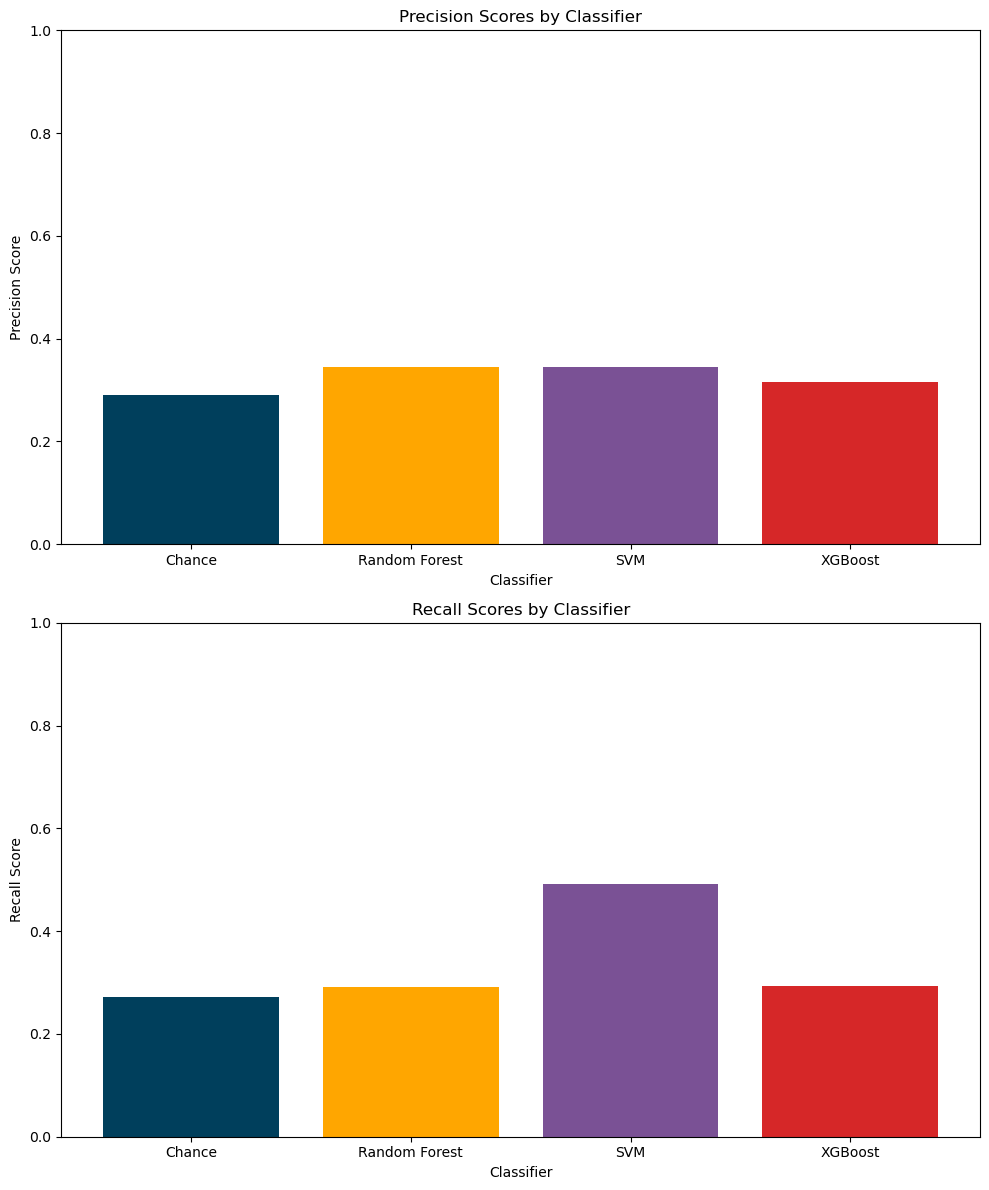

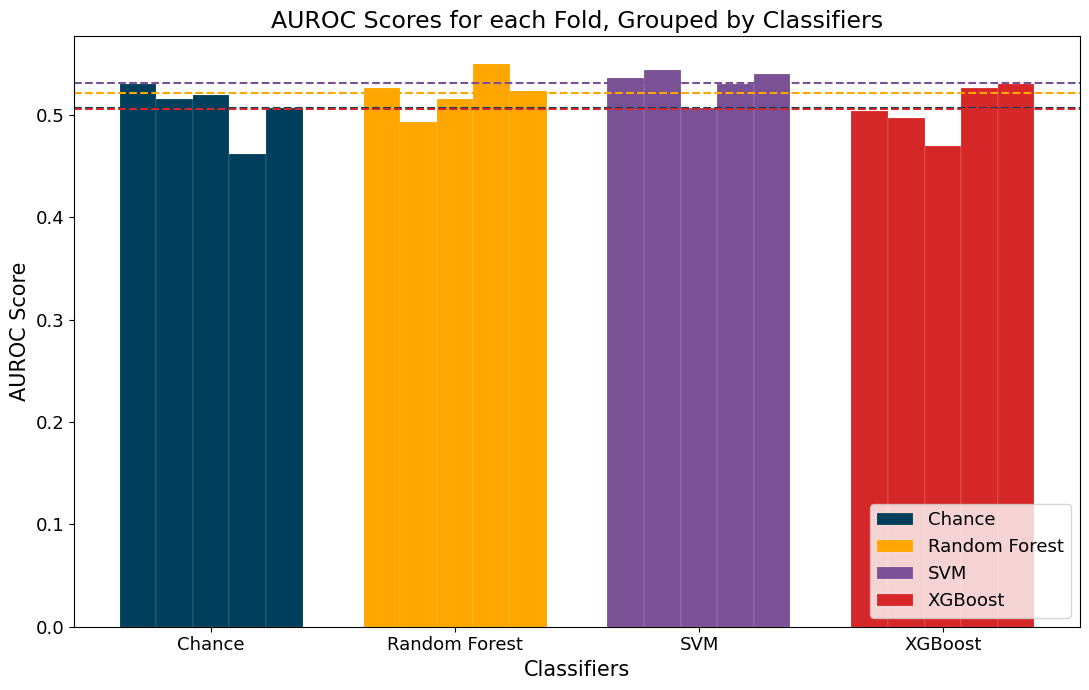

In [10]:
df = df_all_clean
features = ["PP_Gazes", "PP_AOI_Gazes", "PP_OffscreenPix", "PP_OffscreenProp", "PP_2_Gazes", "PP_2_AOI_Gazes", 
            "PP_2_OffscreenPix", "PP_2_OffscreenProp", "PP_3_Gazes", "PP_3_AOI_Gazes", "PP_3_OffscreenPix", 
            "PP_3_OffscreenProp", "PP_cluster_num_clusters", "PP_cluster_avg_duration", "PP_cluster_sd_duration", 
            "PP_cluster_skew_duration", "PP_dispersion", "PP_2_cluster_num_clusters", "PP_2_cluster_avg_duration", 
            "PP_2_cluster_sd_duration", "PP_2_cluster_skew_duration", "PP_2_dispersion", "PP_3_cluster_num_clusters", 
            "PP_3_cluster_avg_duration", "PP_3_cluster_sd_duration", "PP_3_cluster_skew_duration", "PP_3_dispersion", 
            "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", "wordCount_without_stopwords", 
            "syllableCount_without_stopwords", "sentiment", "PP_CD", "PP_NN", "PP_JJ", "PP_VBN", "PP_VBP", "PP_NNS", "PP_VBD", 
            "PP_VBG", "PP_DT", "PP_IN", "PP_JJS", "PP_MD", "PP_VB", "PP_RB", "PP_VBZ", "PP_RBS", "PP_JJR", "PP_WRB", "PP_RBR", 
            "PP_2_CD", "PP_2_NN", "PP_2_JJ", "PP_2_VBN", "PP_2_VBP", "PP_2_NNS", "PP_2_VBD", "PP_2_VBG", "PP_2_DT", "PP_2_IN", 
            "PP_2_JJS", "PP_2_MD", "PP_2_VB", "PP_2_RB", "PP_2_VBZ", "PP_2_RBS", "PP_2_JJR", "PP_2_WRB", "PP_2_RBR", "PP_3_CD", 
            "PP_3_NN", "PP_3_JJ", "PP_3_VBN", "PP_3_VBP", "PP_3_NNS", "PP_3_VBD", "PP_3_VBG", "PP_3_DT", "PP_3_IN", "PP_3_JJS", 
            "PP_3_MD", "PP_3_VB", "PP_3_RB", "PP_3_VBZ", "PP_3_RBS", "PP_3_JJR", "PP_3_WRB", "PP_3_RBR"
]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

## MODELING NEUROTYPICAL PARTICIPANTS

### NLP FEATURES

Chance Results:
Avg Accuracy: 0.55
Avg Weighted F1 Score: 0.55
Avg Precision_1: 0.31
Avg Recall_1: 0.32
Avg Kappa: -0.02
Avg AUROC: 0.50
Avg Confusion Matrix:
[[175.8  91.2]
 [ 87.2  41.4]]
Avg Prediction Rate: 0.34

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.52
Avg Weighted F1 Score: 0.54
Avg Precision_1: 0.35
Avg Recall_1: 0.53
Avg Kappa: 0.05
Avg AUROC: 0.55
Avg Confusion Matrix:
[[138.6 128.4]
 [ 60.2  68.4]]
Avg Prediction Rate: 0.50

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 

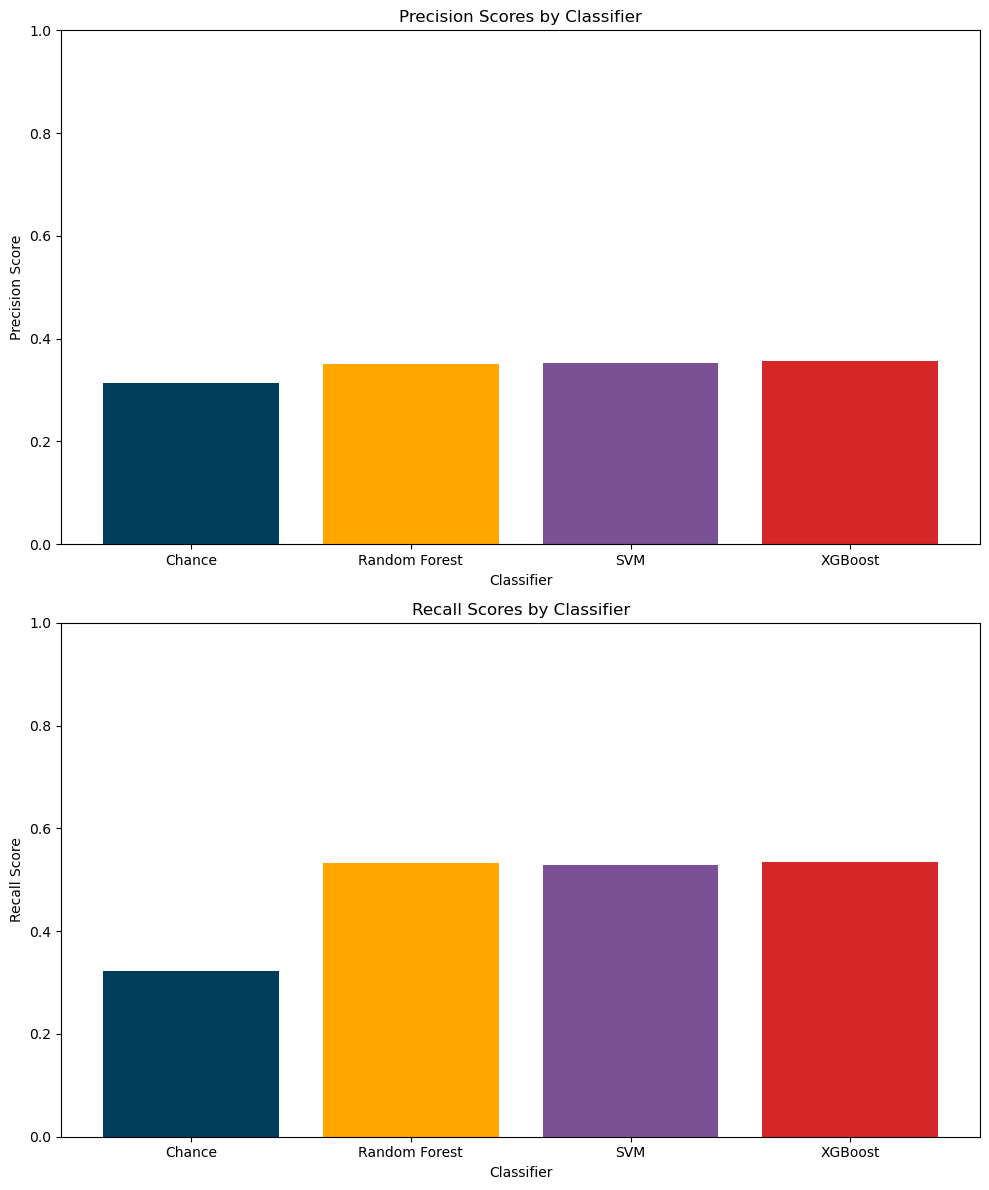

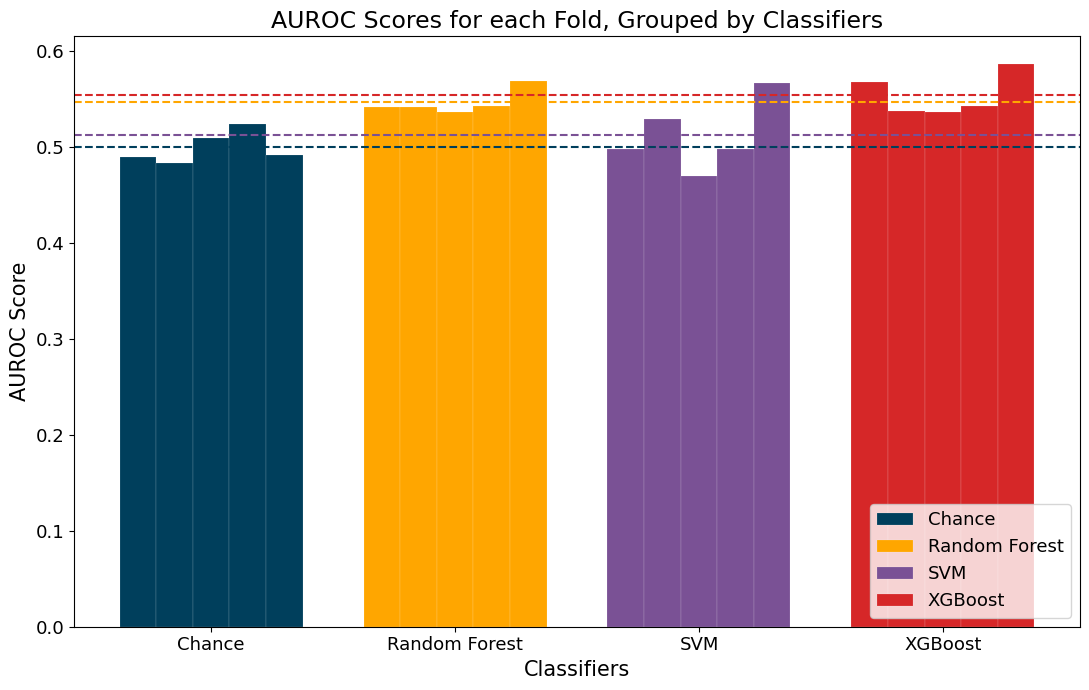

In [12]:
df = df_typical_clean
features = ["wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", "wordCount_without_stopwords", 
            "syllableCount_without_stopwords", "sentiment", "PP_CD", "PP_NN", "PP_JJ", "PP_VBN", "PP_VBP", "PP_NNS", "PP_VBD", 
            "PP_VBG", "PP_DT", "PP_IN", "PP_JJS", "PP_MD", "PP_VB", "PP_RB", "PP_VBZ", "PP_RBS", "PP_JJR", "PP_WRB", "PP_RBR", 
            "PP_2_CD", "PP_2_NN", "PP_2_JJ", "PP_2_VBN", "PP_2_VBP", "PP_2_NNS", "PP_2_VBD", "PP_2_VBG", "PP_2_DT", "PP_2_IN", 
            "PP_2_JJS", "PP_2_MD", "PP_2_VB", "PP_2_RB", "PP_2_VBZ", "PP_2_RBS", "PP_2_JJR", "PP_2_WRB", "PP_2_RBR", "PP_3_CD", 
            "PP_3_NN", "PP_3_JJ", "PP_3_VBN", "PP_3_VBP", "PP_3_NNS", "PP_3_VBD", "PP_3_VBG", "PP_3_DT", "PP_3_IN", "PP_3_JJS", 
            "PP_3_MD", "PP_3_VB", "PP_3_RB", "PP_3_VBZ", "PP_3_RBS", "PP_3_JJR", "PP_3_WRB", "PP_3_RBR"]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION FEATURES

Chance Results:
Avg Accuracy: 0.55
Avg Weighted F1 Score: 0.55
Avg Precision_1: 0.31
Avg Recall_1: 0.32
Avg Kappa: -0.02
Avg AUROC: 0.49
Avg Confusion Matrix:
[[176.   91. ]
 [ 87.4  41.2]]
Avg Prediction Rate: 0.33

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.60
Avg Weighted F1 Score: 0.58
Avg Precision_1: 0.33
Avg Recall_1: 0.24
Avg Kappa: 0.01
Avg AUROC: 0.51
Avg Confusion Matrix:
[[204.2  62.8]
 [ 97.2  31.4]]
Avg Prediction Rate: 0.24

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 

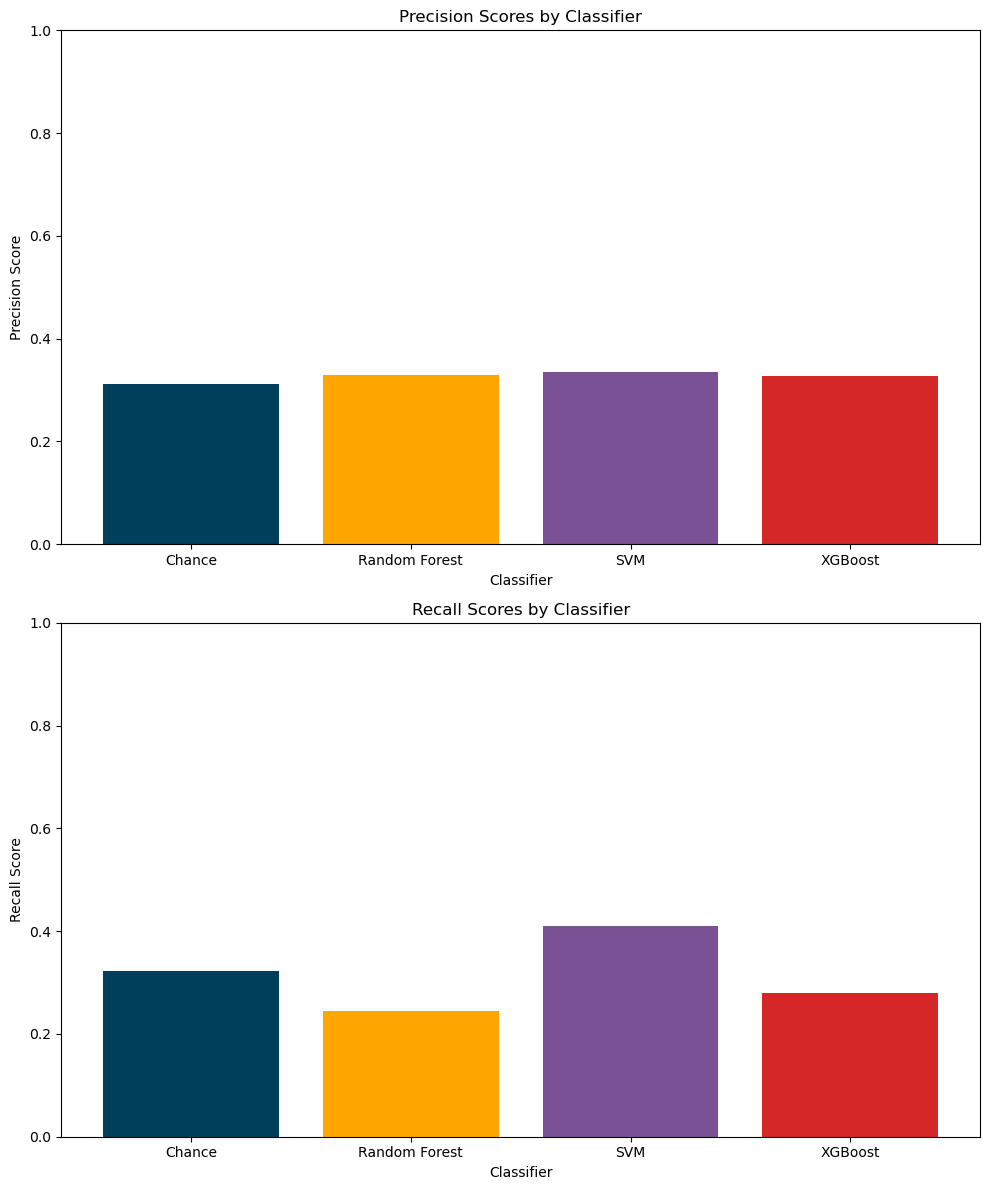

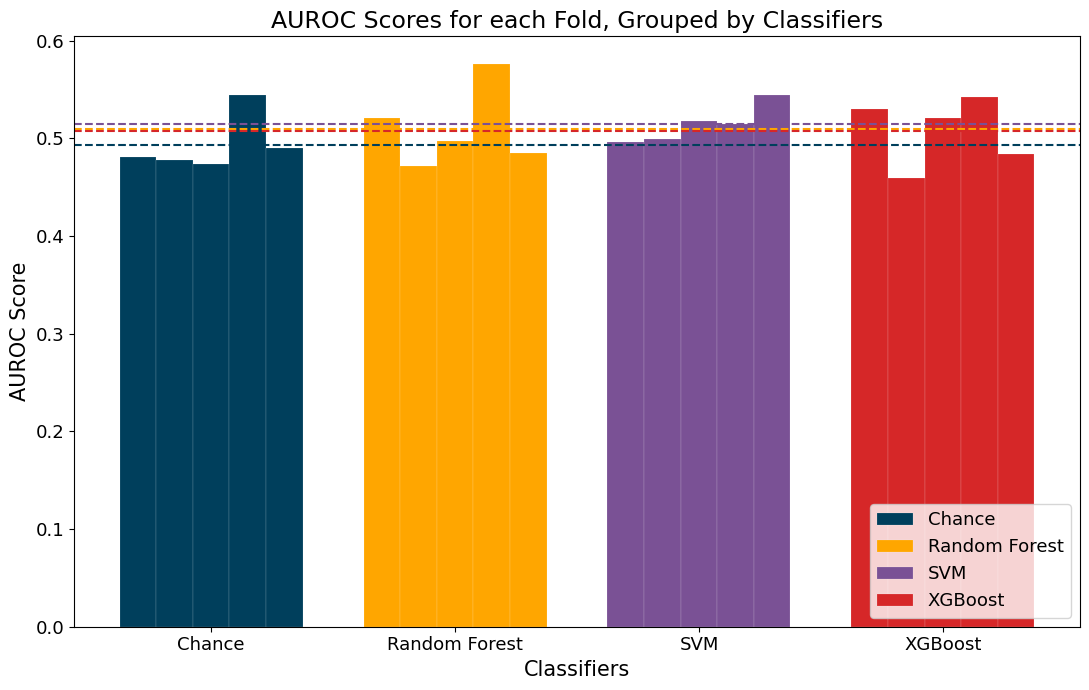

In [13]:
df = df_typical_clean
features = ["PP_Gazes", "PP_AOI_Gazes", "PP_OffscreenPix", "PP_OffscreenProp", "PP_2_Gazes", "PP_2_AOI_Gazes", 
            "PP_2_OffscreenPix", "PP_2_OffscreenProp", "PP_3_Gazes", "PP_3_AOI_Gazes", "PP_3_OffscreenPix", 
            "PP_3_OffscreenProp", "PP_cluster_num_clusters", "PP_cluster_avg_duration", "PP_cluster_sd_duration", 
            "PP_cluster_skew_duration", "PP_dispersion", "PP_2_cluster_num_clusters", "PP_2_cluster_avg_duration", 
            "PP_2_cluster_sd_duration", "PP_2_cluster_skew_duration", "PP_2_dispersion", "PP_3_cluster_num_clusters", 
            "PP_3_cluster_avg_duration", "PP_3_cluster_sd_duration", "PP_3_cluster_skew_duration", "PP_3_dispersion"
]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + NLP

Chance Results:
Avg Accuracy: 0.56
Avg Weighted F1 Score: 0.56
Avg Precision_1: 0.33
Avg Recall_1: 0.33
Avg Kappa: 0.00
Avg AUROC: 0.50
Avg Confusion Matrix:
[[181.2  85.8]
 [ 87.   41.6]]
Avg Prediction Rate: 0.32

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.57
Avg Weighted F1 Score: 0.56
Avg Precision_1: 0.31
Avg Recall_1: 0.27
Avg Kappa: -0.01
Avg AUROC: 0.50
Avg Confusion Matrix:
[[190.4  76.6]
 [ 93.6  35. ]]
Avg Prediction Rate: 0.28

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 

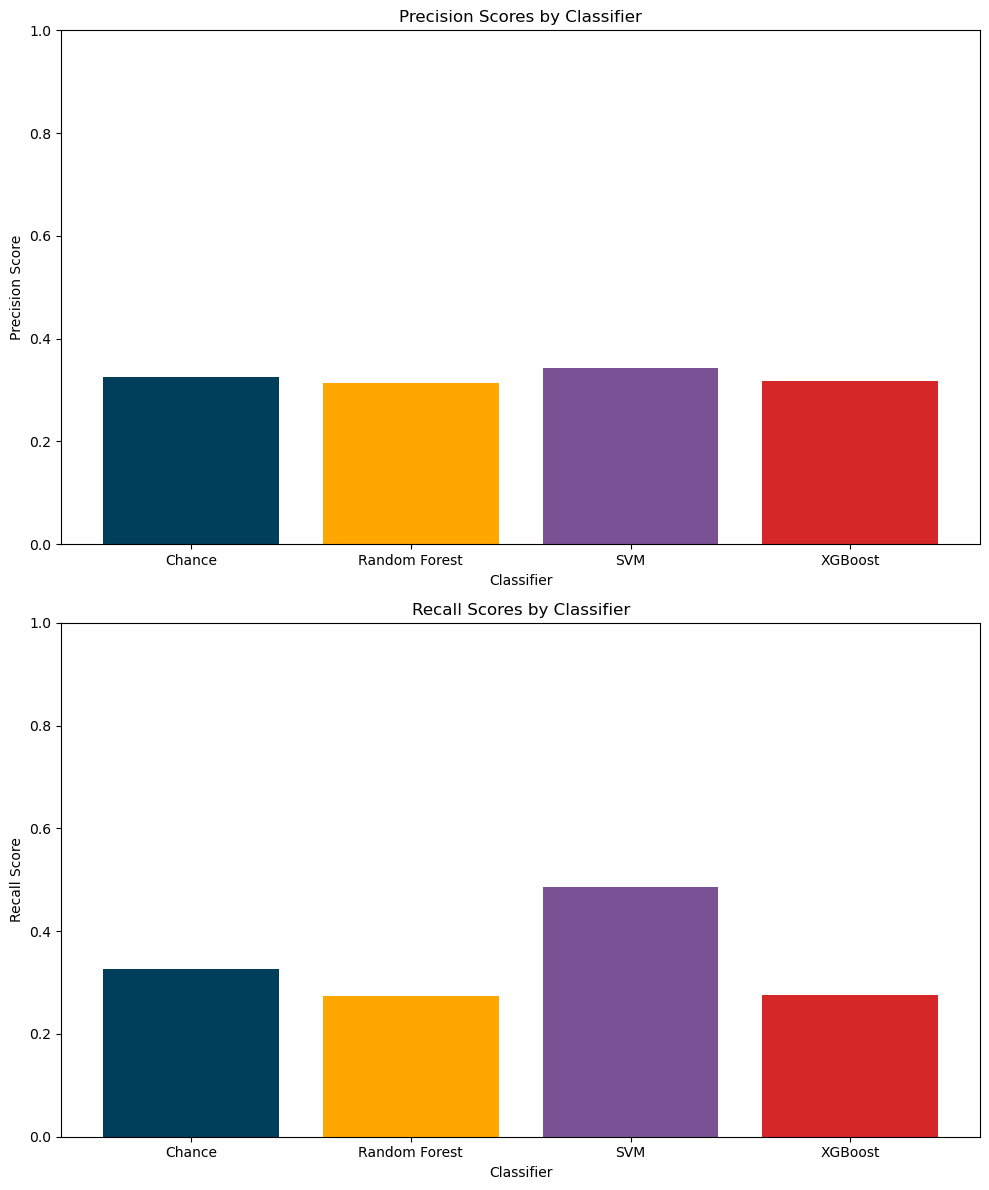

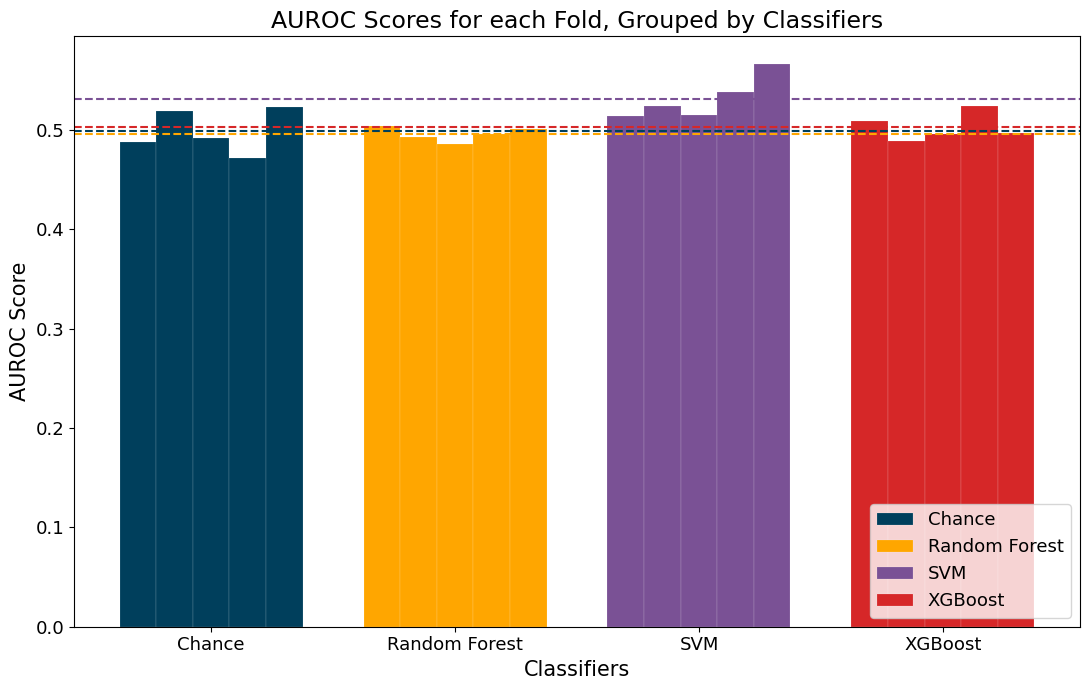

In [14]:
df = df_typical_clean
features = ["PP_Gazes", "PP_AOI_Gazes", "PP_OffscreenPix", "PP_OffscreenProp", "PP_2_Gazes", "PP_2_AOI_Gazes", 
            "PP_2_OffscreenPix", "PP_2_OffscreenProp", "PP_3_Gazes", "PP_3_AOI_Gazes", "PP_3_OffscreenPix", 
            "PP_3_OffscreenProp", "PP_cluster_num_clusters", "PP_cluster_avg_duration", "PP_cluster_sd_duration", 
            "PP_cluster_skew_duration", "PP_dispersion", "PP_2_cluster_num_clusters", "PP_2_cluster_avg_duration", 
            "PP_2_cluster_sd_duration", "PP_2_cluster_skew_duration", "PP_2_dispersion", "PP_3_cluster_num_clusters", 
            "PP_3_cluster_avg_duration", "PP_3_cluster_sd_duration", "PP_3_cluster_skew_duration", "PP_3_dispersion", 
            "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", "wordCount_without_stopwords", 
            "syllableCount_without_stopwords", "sentiment", "PP_CD", "PP_NN", "PP_JJ", "PP_VBN", "PP_VBP", "PP_NNS", "PP_VBD", 
            "PP_VBG", "PP_DT", "PP_IN", "PP_JJS", "PP_MD", "PP_VB", "PP_RB", "PP_VBZ", "PP_RBS", "PP_JJR", "PP_WRB", "PP_RBR", 
            "PP_2_CD", "PP_2_NN", "PP_2_JJ", "PP_2_VBN", "PP_2_VBP", "PP_2_NNS", "PP_2_VBD", "PP_2_VBG", "PP_2_DT", "PP_2_IN", 
            "PP_2_JJS", "PP_2_MD", "PP_2_VB", "PP_2_RB", "PP_2_VBZ", "PP_2_RBS", "PP_2_JJR", "PP_2_WRB", "PP_2_RBR", "PP_3_CD", 
            "PP_3_NN", "PP_3_JJ", "PP_3_VBN", "PP_3_VBP", "PP_3_NNS", "PP_3_VBD", "PP_3_VBG", "PP_3_DT", "PP_3_IN", "PP_3_JJS", 
            "PP_3_MD", "PP_3_VB", "PP_3_RB", "PP_3_VBZ", "PP_3_RBS", "PP_3_JJR", "PP_3_WRB", "PP_3_RBR"
]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

## MODELING NEURODIVERGENT PARTICIPANTS

### NLP FEATURES

Chance Results:
Avg Accuracy: 0.55
Avg Weighted F1 Score: 0.55
Avg Precision_1: 0.32
Avg Recall_1: 0.34
Avg Kappa: -0.01
Avg AUROC: 0.49
Avg Confusion Matrix:
[[174.2  92.8]
 [ 84.8  43.8]]
Avg Prediction Rate: 0.35

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.52
Avg Weighted F1 Score: 0.53
Avg Precision_1: 0.34
Avg Recall_1: 0.52
Avg Kappa: 0.03
Avg AUROC: 0.55
Avg Confusion Matrix:
[[138.6 128.4]
 [ 62.   66.6]]
Avg Prediction Rate: 0.49

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 

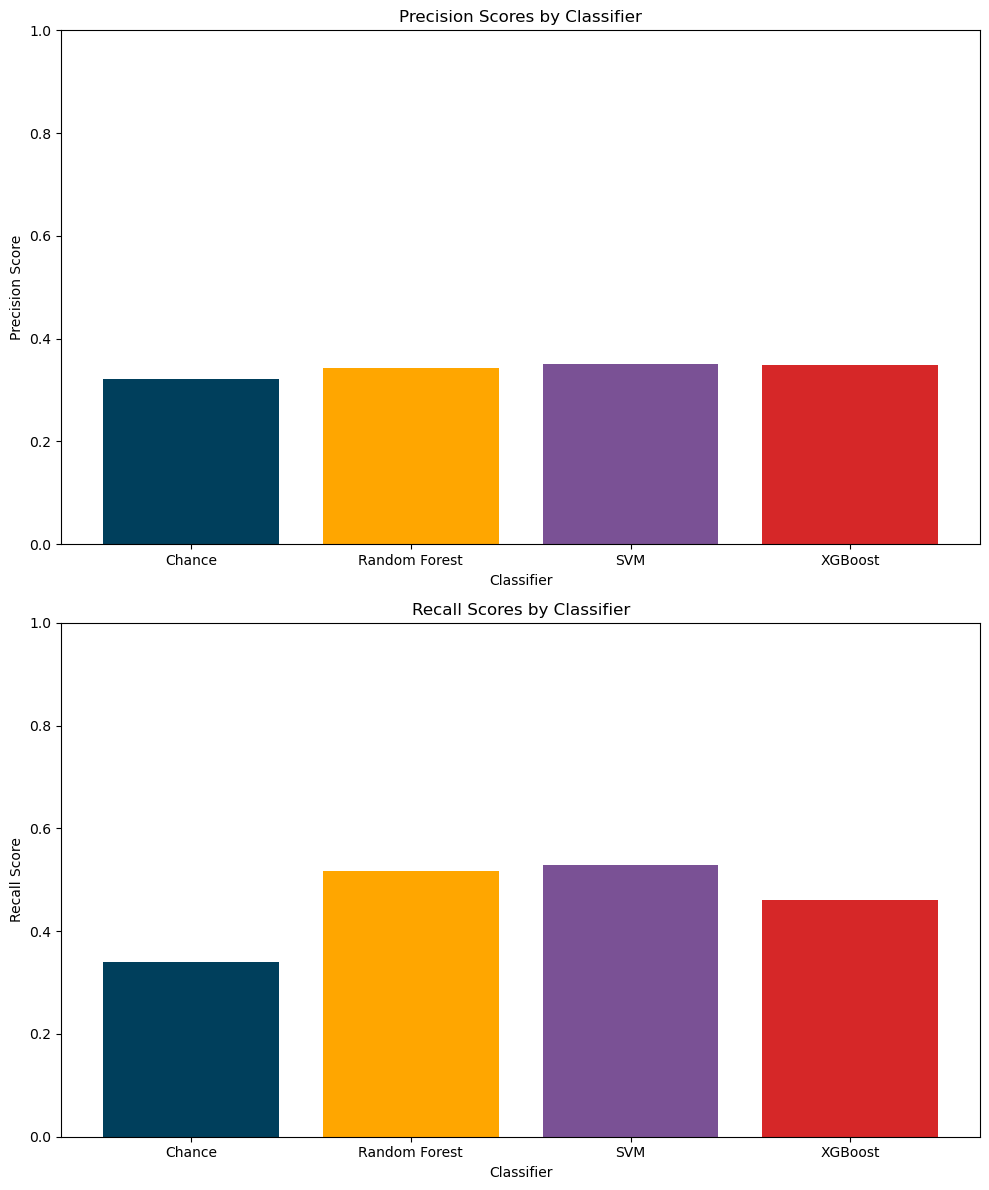

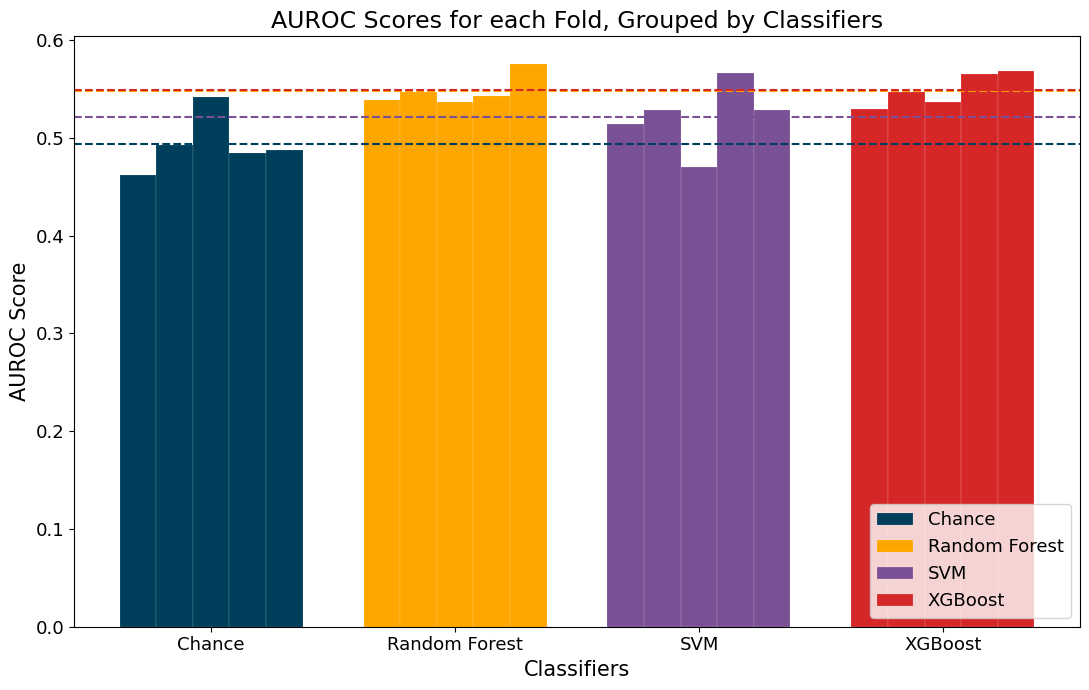

In [15]:
df = df_divergent_clean
features = ["wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", "wordCount_without_stopwords", 
            "syllableCount_without_stopwords", "sentiment", "PP_CD", "PP_NN", "PP_JJ", "PP_VBN", "PP_VBP", "PP_NNS", "PP_VBD", 
            "PP_VBG", "PP_DT", "PP_IN", "PP_JJS", "PP_MD", "PP_VB", "PP_RB", "PP_VBZ", "PP_RBS", "PP_JJR", "PP_WRB", "PP_RBR", 
            "PP_2_CD", "PP_2_NN", "PP_2_JJ", "PP_2_VBN", "PP_2_VBP", "PP_2_NNS", "PP_2_VBD", "PP_2_VBG", "PP_2_DT", "PP_2_IN", 
            "PP_2_JJS", "PP_2_MD", "PP_2_VB", "PP_2_RB", "PP_2_VBZ", "PP_2_RBS", "PP_2_JJR", "PP_2_WRB", "PP_2_RBR", "PP_3_CD", 
            "PP_3_NN", "PP_3_JJ", "PP_3_VBN", "PP_3_VBP", "PP_3_NNS", "PP_3_VBD", "PP_3_VBG", "PP_3_DT", "PP_3_IN", "PP_3_JJS", 
            "PP_3_MD", "PP_3_VB", "PP_3_RB", "PP_3_VBZ", "PP_3_RBS", "PP_3_JJR", "PP_3_WRB", "PP_3_RBR"]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION FEATURES

Chance Results:
Avg Accuracy: 0.56
Avg Weighted F1 Score: 0.56
Avg Precision_1: 0.33
Avg Recall_1: 0.33
Avg Kappa: 0.00
Avg AUROC: 0.49
Avg Confusion Matrix:
[[179.4  87.6]
 [ 86.2  42.4]]
Avg Prediction Rate: 0.33

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.60
Avg Weighted F1 Score: 0.58
Avg Precision_1: 0.33
Avg Recall_1: 0.23
Avg Kappa: 0.00
Avg AUROC: 0.52
Avg Confusion Matrix:
[[206.4  60.6]
 [ 98.8  29.8]]
Avg Prediction Rate: 0.23

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 f

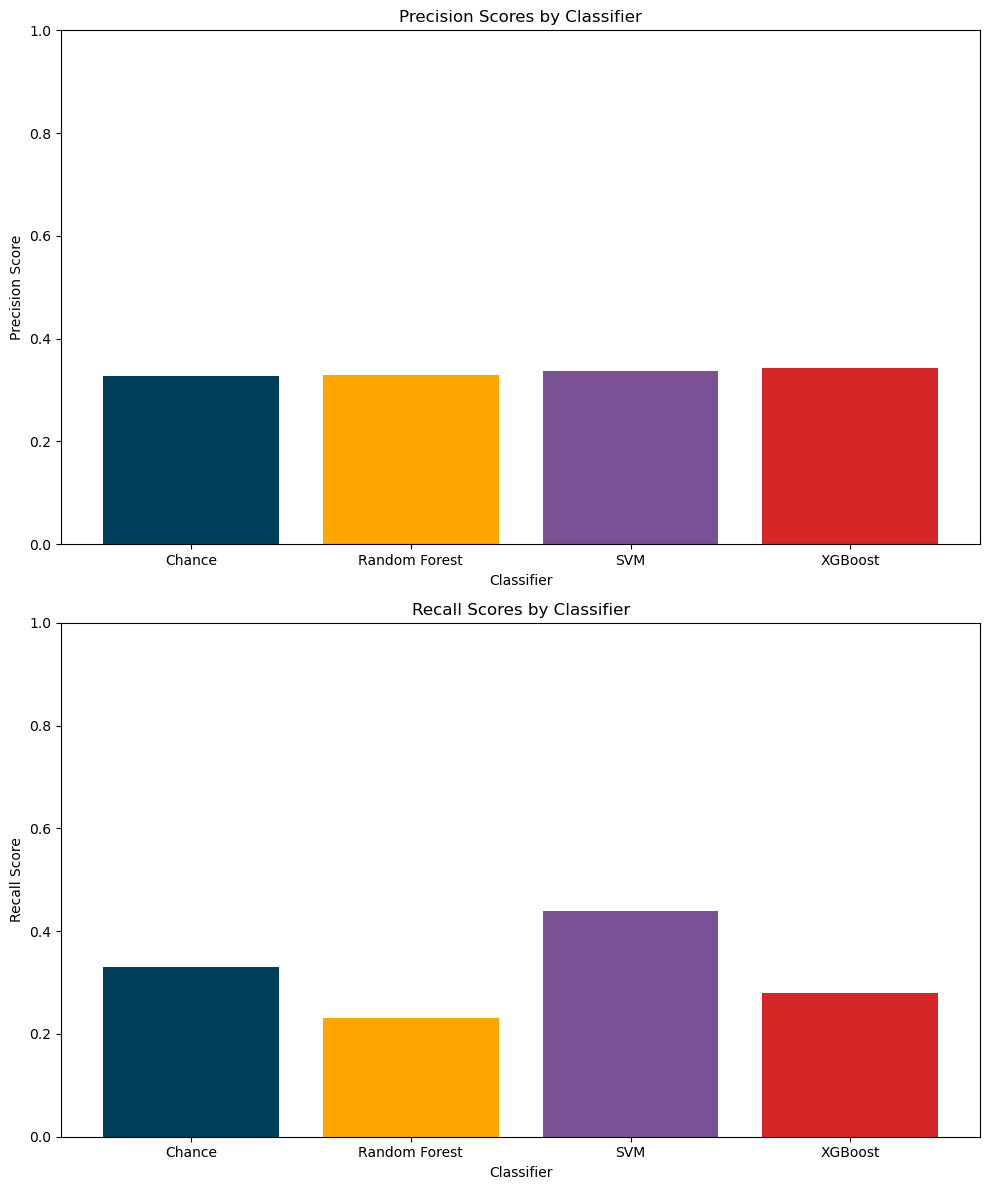

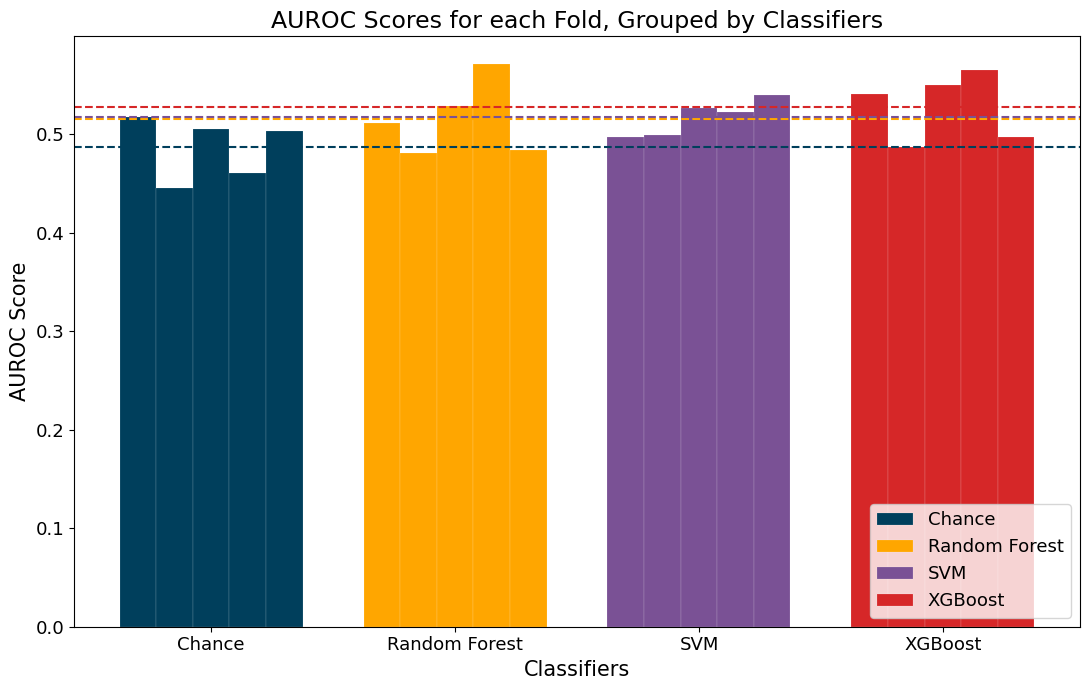

In [16]:
df = df_divergent_clean
features = ["PP_Gazes", "PP_AOI_Gazes", "PP_OffscreenPix", "PP_OffscreenProp", "PP_2_Gazes", "PP_2_AOI_Gazes", 
            "PP_2_OffscreenPix", "PP_2_OffscreenProp", "PP_3_Gazes", "PP_3_AOI_Gazes", "PP_3_OffscreenPix", 
            "PP_3_OffscreenProp", "PP_cluster_num_clusters", "PP_cluster_avg_duration", "PP_cluster_sd_duration", 
            "PP_cluster_skew_duration", "PP_dispersion", "PP_2_cluster_num_clusters", "PP_2_cluster_avg_duration", 
            "PP_2_cluster_sd_duration", "PP_2_cluster_skew_duration", "PP_2_dispersion", "PP_3_cluster_num_clusters", 
            "PP_3_cluster_avg_duration", "PP_3_cluster_sd_duration", "PP_3_cluster_skew_duration", "PP_3_dispersion"
]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + NLP

Chance Results:
Avg Accuracy: 0.58
Avg Weighted F1 Score: 0.58
Avg Precision_1: 0.35
Avg Recall_1: 0.34
Avg Kappa: 0.04
Avg AUROC: 0.51
Avg Confusion Matrix:
[[184.4  82.6]
 [ 84.6  44. ]]
Avg Prediction Rate: 0.32

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.58
Avg Weighted F1 Score: 0.57
Avg Precision_1: 0.33
Avg Recall_1: 0.28
Avg Kappa: 0.00
Avg AUROC: 0.52
Avg Confusion Matrix:
[[191.8  75.2]
 [ 92.2  36.4]]
Avg Prediction Rate: 0.28

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 f

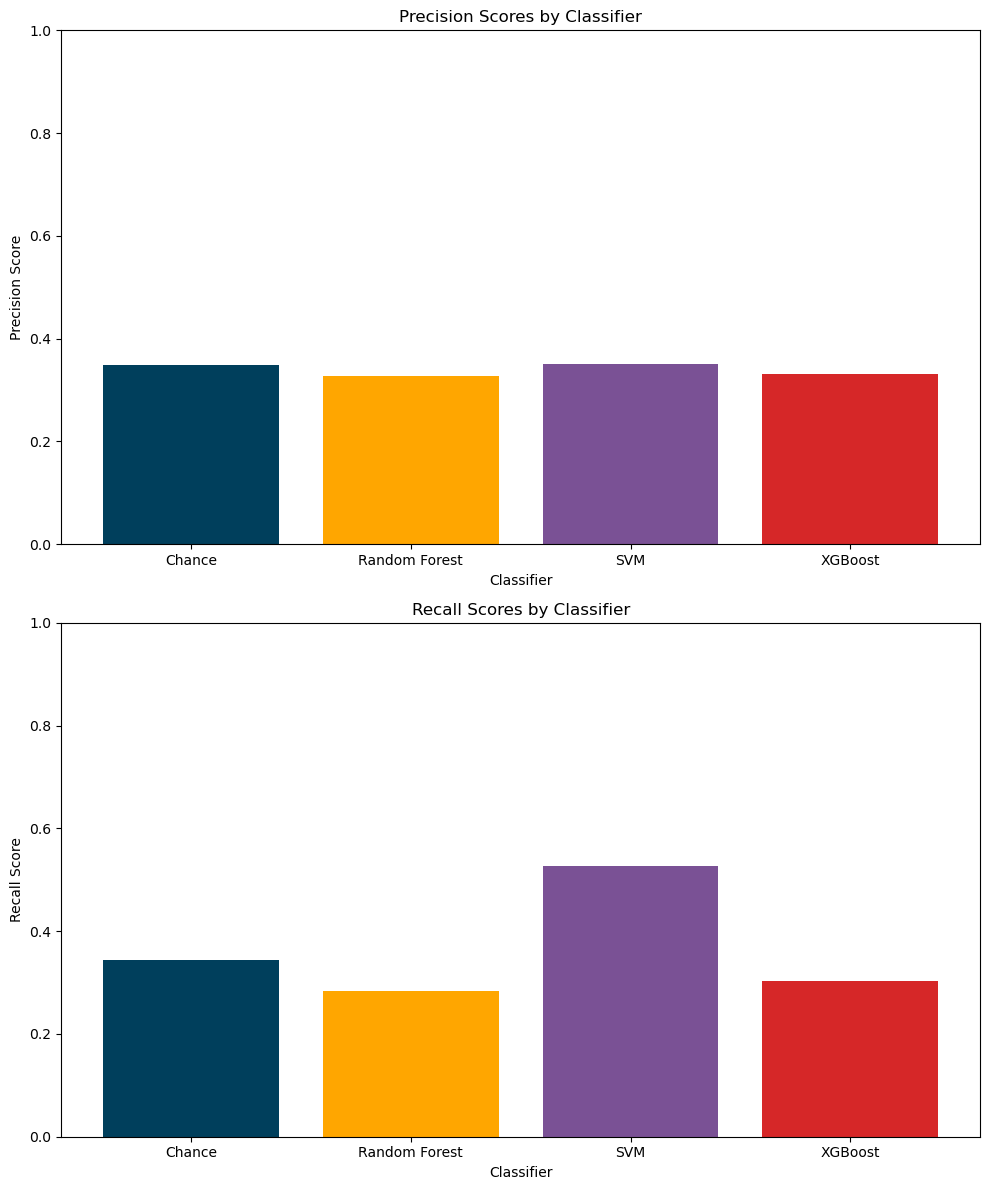

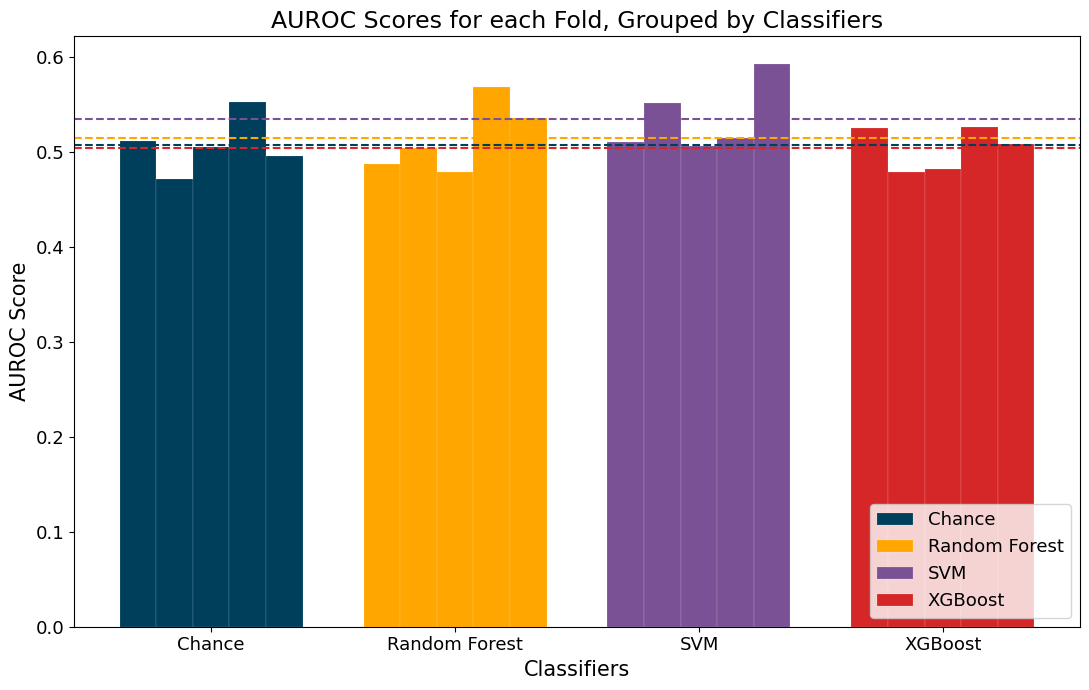

In [17]:
df = df_divergent_clean
features = ["PP_Gazes", "PP_AOI_Gazes", "PP_OffscreenPix", "PP_OffscreenProp", "PP_2_Gazes", "PP_2_AOI_Gazes", 
            "PP_2_OffscreenPix", "PP_2_OffscreenProp", "PP_3_Gazes", "PP_3_AOI_Gazes", "PP_3_OffscreenPix", 
            "PP_3_OffscreenProp", "PP_cluster_num_clusters", "PP_cluster_avg_duration", "PP_cluster_sd_duration", 
            "PP_cluster_skew_duration", "PP_dispersion", "PP_2_cluster_num_clusters", "PP_2_cluster_avg_duration", 
            "PP_2_cluster_sd_duration", "PP_2_cluster_skew_duration", "PP_2_dispersion", "PP_3_cluster_num_clusters", 
            "PP_3_cluster_avg_duration", "PP_3_cluster_sd_duration", "PP_3_cluster_skew_duration", "PP_3_dispersion", 
            "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", "wordCount_without_stopwords", 
            "syllableCount_without_stopwords", "sentiment", "PP_CD", "PP_NN", "PP_JJ", "PP_VBN", "PP_VBP", "PP_NNS", "PP_VBD", 
            "PP_VBG", "PP_DT", "PP_IN", "PP_JJS", "PP_MD", "PP_VB", "PP_RB", "PP_VBZ", "PP_RBS", "PP_JJR", "PP_WRB", "PP_RBR", 
            "PP_2_CD", "PP_2_NN", "PP_2_JJ", "PP_2_VBN", "PP_2_VBP", "PP_2_NNS", "PP_2_VBD", "PP_2_VBG", "PP_2_DT", "PP_2_IN", 
            "PP_2_JJS", "PP_2_MD", "PP_2_VB", "PP_2_RB", "PP_2_VBZ", "PP_2_RBS", "PP_2_JJR", "PP_2_WRB", "PP_2_RBR", "PP_3_CD", 
            "PP_3_NN", "PP_3_JJ", "PP_3_VBN", "PP_3_VBP", "PP_3_NNS", "PP_3_VBD", "PP_3_VBG", "PP_3_DT", "PP_3_IN", "PP_3_JJS", 
            "PP_3_MD", "PP_3_VB", "PP_3_RB", "PP_3_VBZ", "PP_3_RBS", "PP_3_JJR", "PP_3_WRB", "PP_3_RBR"
]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

## MODELING ADD or ADHD

### NLP FEATURES

Chance Results:
Avg Accuracy: 0.53
Avg Weighted F1 Score: 0.54
Avg Precision_1: 0.53
Avg Recall_1: 0.51
Avg AUROC: 0.52
Avg Confusion Matrix:
[[23.2 19.6]
 [20.4 22.4]]
Avg Prediction Rate: 0.49

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.58
Avg Weighted F1 Score: 0.59
Avg Precision_1: 0.60
Avg Recall_1: 0.53
Avg AUROC: 0.59
Avg Confusion Matrix:
[[27.8 15. ]
 [20.6 22.2]]
Avg Prediction Rate: 0.43

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

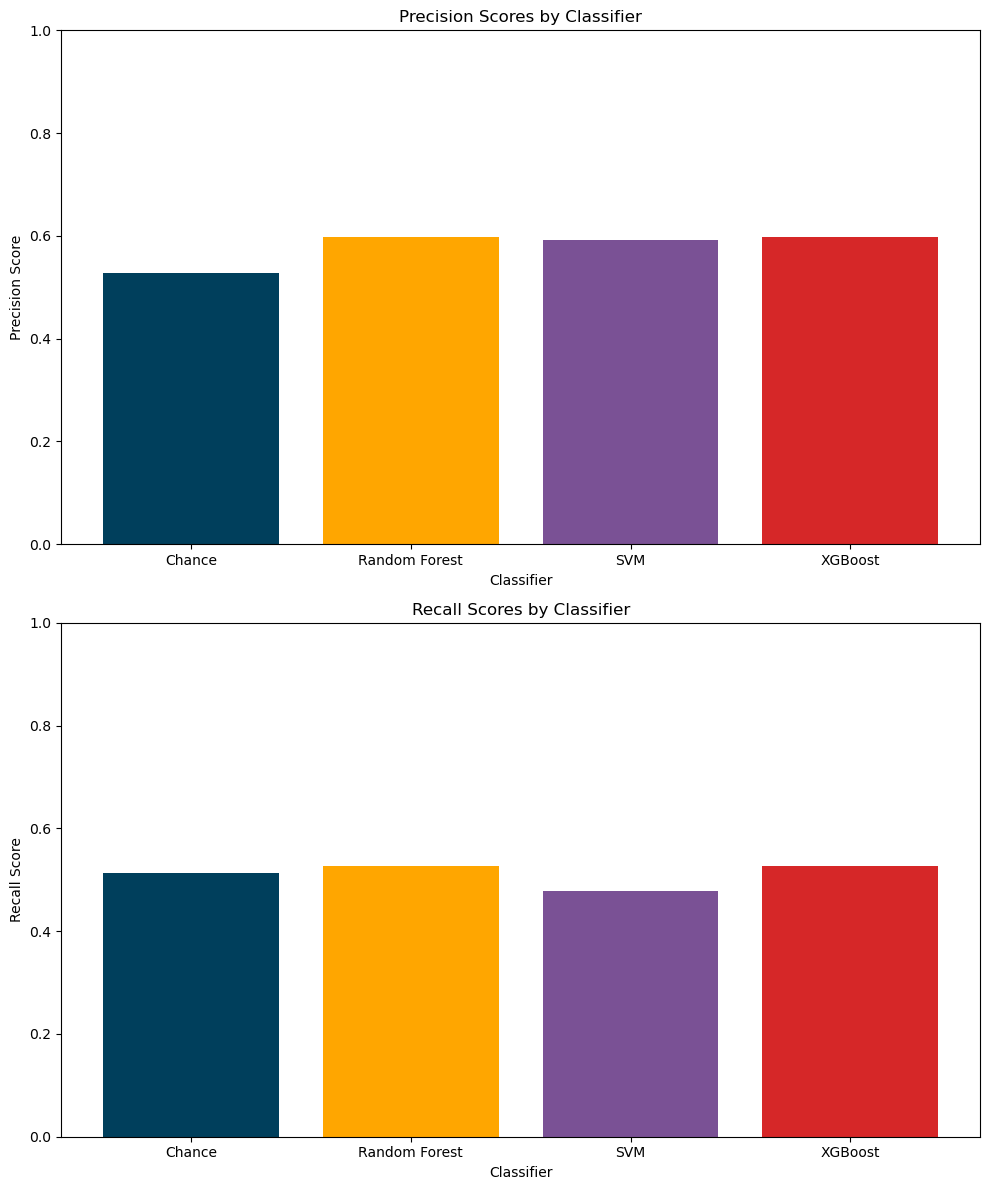

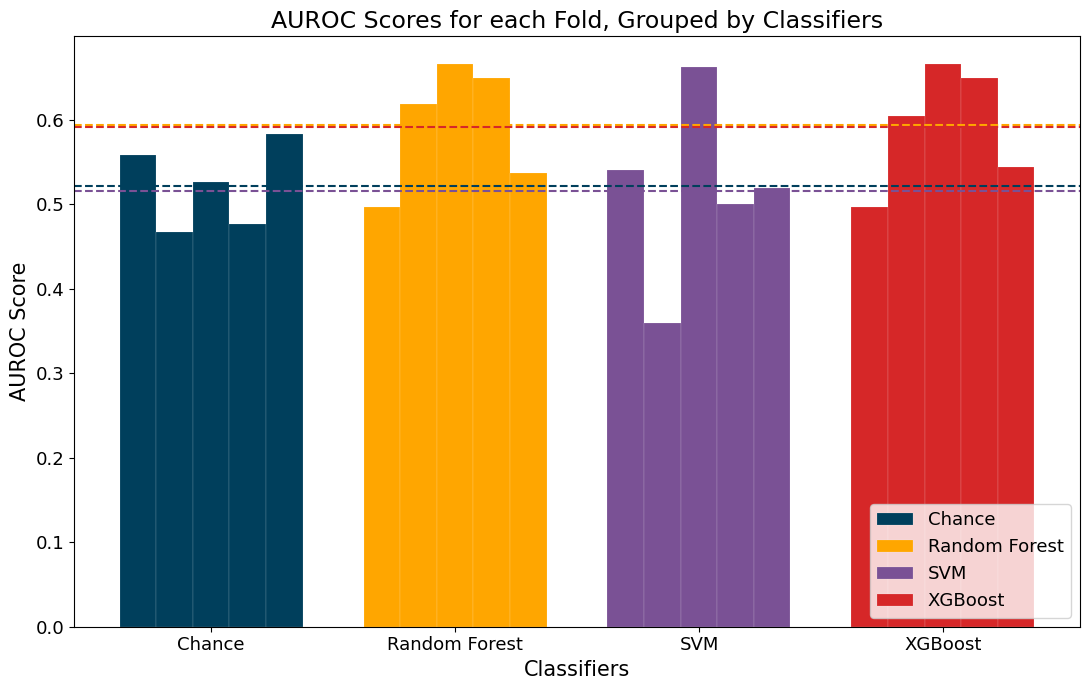

In [34]:
df = df_d1_clean
features = ["wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", "wordCount_without_stopwords", 
            "syllableCount_without_stopwords", "sentiment", "PP_CD", "PP_NN", "PP_JJ", "PP_VBN", "PP_VBP", "PP_NNS", "PP_VBD", 
            "PP_VBG", "PP_DT", "PP_IN", "PP_JJS", "PP_MD", "PP_VB", "PP_RB", "PP_VBZ", "PP_RBS", "PP_JJR", "PP_WRB", "PP_RBR", 
            "PP_2_CD", "PP_2_NN", "PP_2_JJ", "PP_2_VBN", "PP_2_VBP", "PP_2_NNS", "PP_2_VBD", "PP_2_VBG", "PP_2_DT", "PP_2_IN", 
            "PP_2_JJS", "PP_2_MD", "PP_2_VB", "PP_2_RB", "PP_2_VBZ", "PP_2_RBS", "PP_2_JJR", "PP_2_WRB", "PP_2_RBR", "PP_3_CD", 
            "PP_3_NN", "PP_3_JJ", "PP_3_VBN", "PP_3_VBP", "PP_3_NNS", "PP_3_VBD", "PP_3_VBG", "PP_3_DT", "PP_3_IN", "PP_3_JJS", 
            "PP_3_MD", "PP_3_VB", "PP_3_RB", "PP_3_VBZ", "PP_3_RBS", "PP_3_JJR", "PP_3_WRB", "PP_3_RBR"]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION FEATURES

Chance Results:
Avg Accuracy: 0.51
Avg Weighted F1 Score: 0.52
Avg Precision_1: 0.51
Avg Recall_1: 0.48
Avg AUROC: 0.50
Avg Confusion Matrix:
[[23.  19.8]
 [22.  20.8]]
Avg Prediction Rate: 0.47

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.50
Avg Weighted F1 Score: 0.50
Avg Precision_1: 0.50
Avg Recall_1: 0.48
Avg AUROC: 0.51
Avg Confusion Matrix:
[[22.4 20.4]
 [22.4 20.4]]
Avg Prediction Rate: 0.48

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

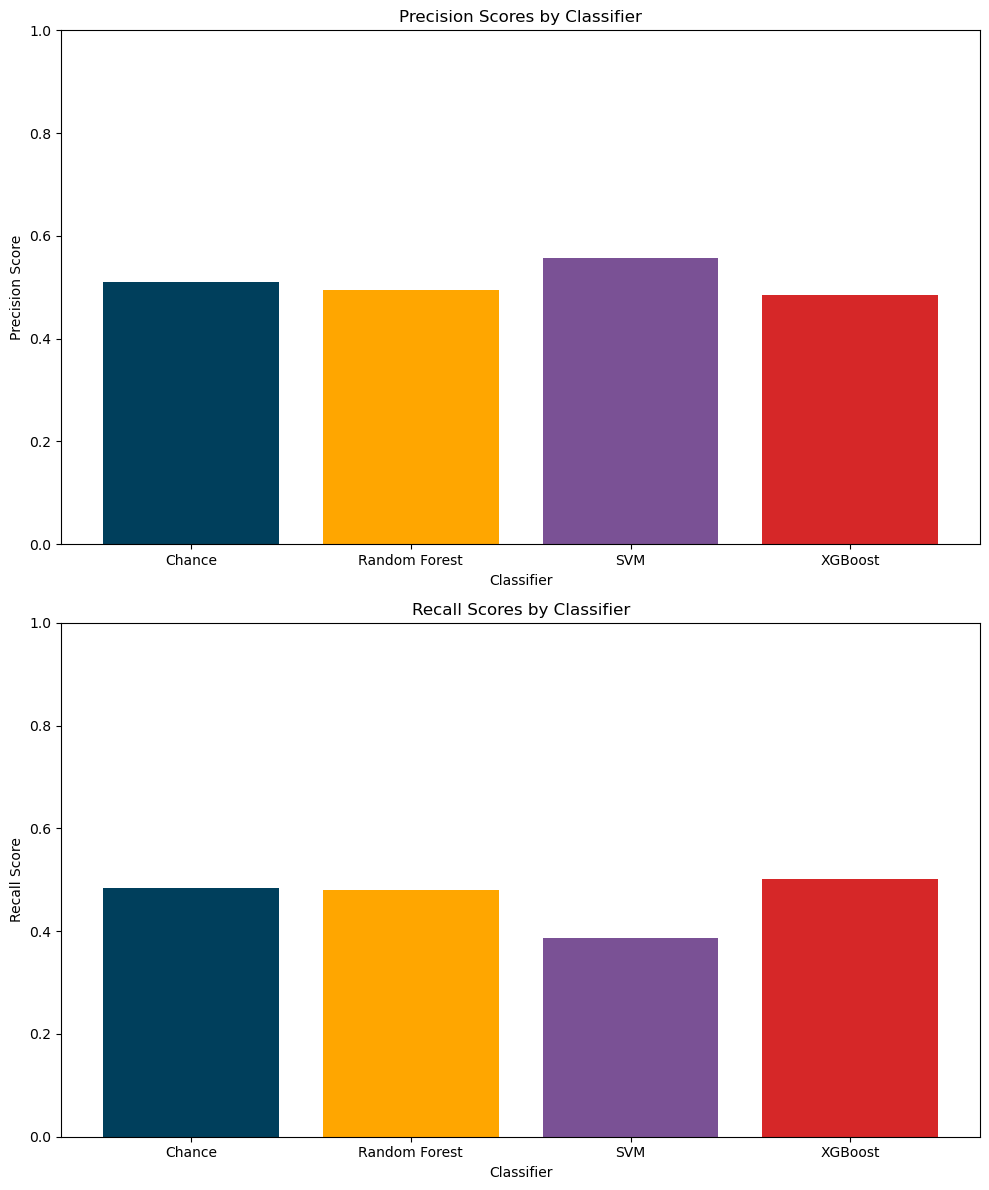

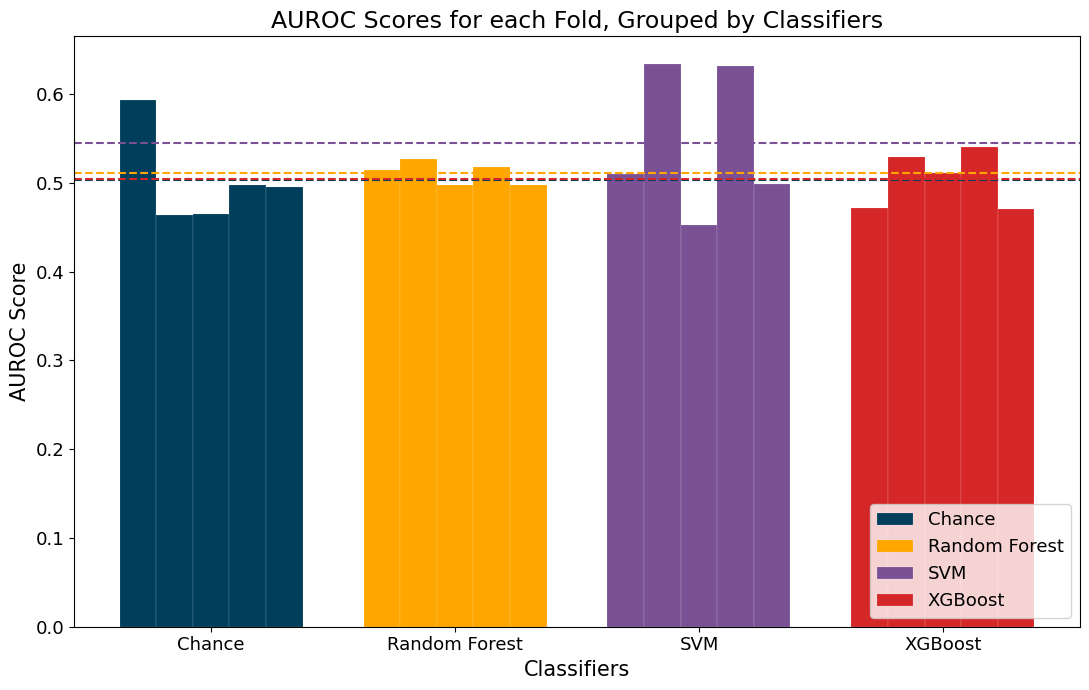

In [35]:
df = df_d1_clean
features = ["PP_Gazes", "PP_AOI_Gazes", "PP_OffscreenPix", "PP_OffscreenProp", "PP_2_Gazes", "PP_2_AOI_Gazes", 
            "PP_2_OffscreenPix", "PP_2_OffscreenProp", "PP_3_Gazes", "PP_3_AOI_Gazes", "PP_3_OffscreenPix", 
            "PP_3_OffscreenProp", "PP_cluster_num_clusters", "PP_cluster_avg_duration", "PP_cluster_sd_duration", 
            "PP_cluster_skew_duration", "PP_dispersion", "PP_2_cluster_num_clusters", "PP_2_cluster_avg_duration", 
            "PP_2_cluster_sd_duration", "PP_2_cluster_skew_duration", "PP_2_dispersion", "PP_3_cluster_num_clusters", 
            "PP_3_cluster_avg_duration", "PP_3_cluster_sd_duration", "PP_3_cluster_skew_duration", "PP_3_dispersion"
]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + NLP

Chance Results:
Avg Accuracy: 0.45
Avg Weighted F1 Score: 0.45
Avg Precision_1: 0.46
Avg Recall_1: 0.44
Avg AUROC: 0.53
Avg Confusion Matrix:
[[19.6 23.2]
 [24.  18.8]]
Avg Prediction Rate: 0.49

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.56
Avg Weighted F1 Score: 0.56
Avg Precision_1: 0.56
Avg Recall_1: 0.55
Avg AUROC: 0.59
Avg Confusion Matrix:
[[24.4 18.4]
 [19.2 23.6]]
Avg Prediction Rate: 0.49

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

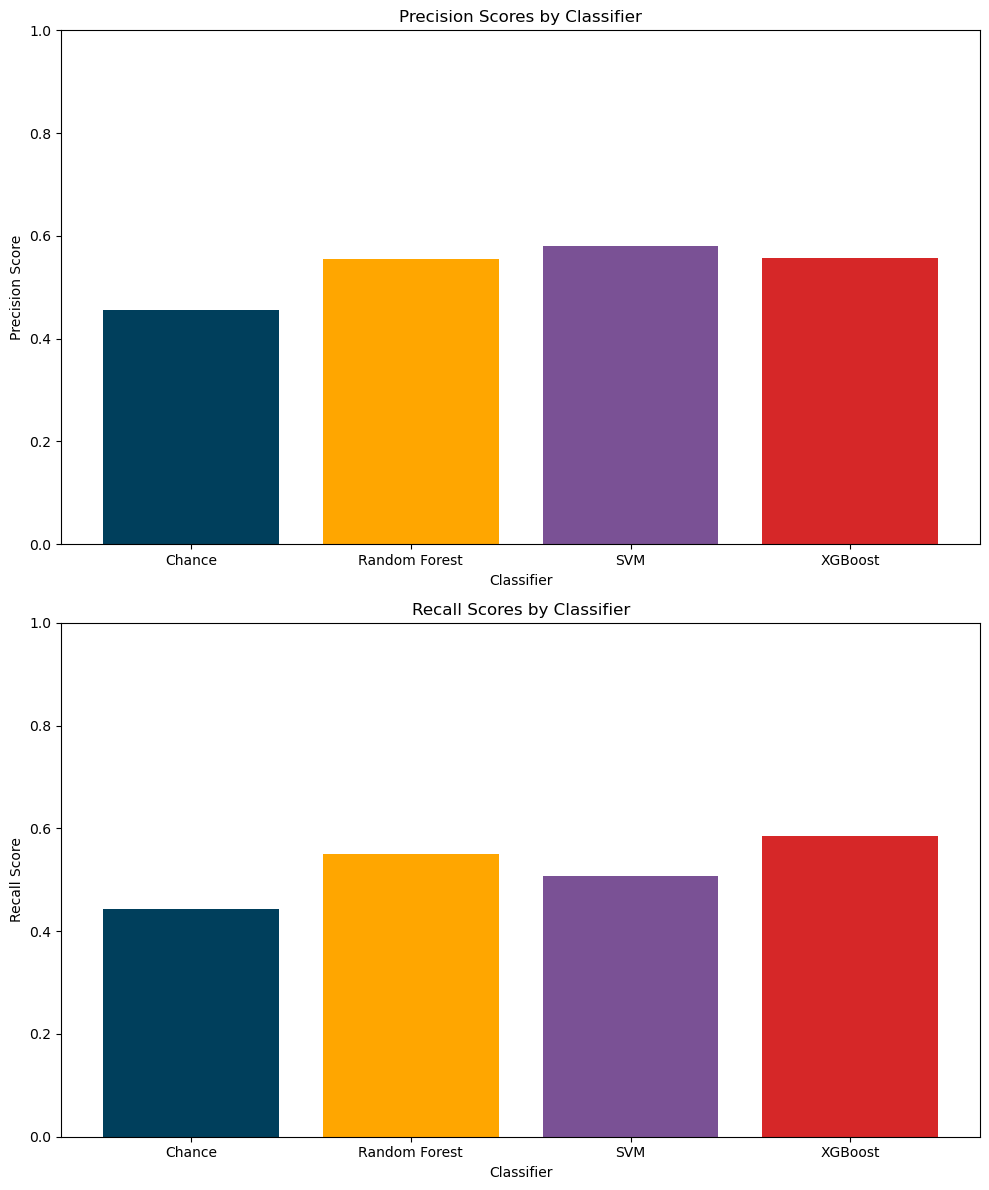

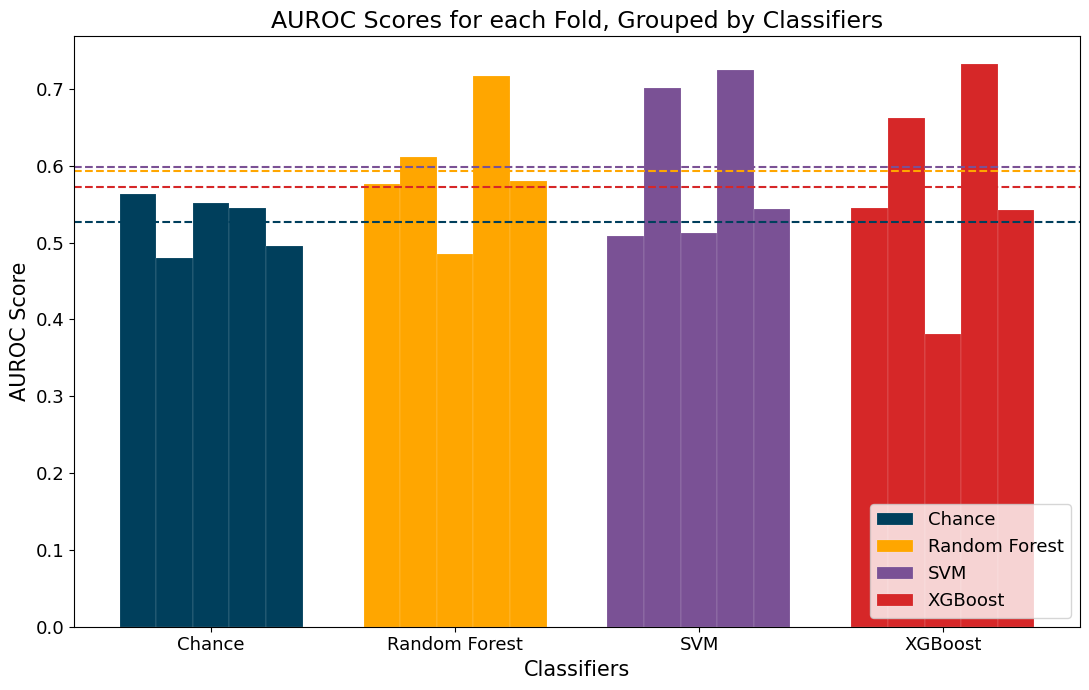

In [36]:
df = df_d1_clean
features = ["PP_Gazes", "PP_AOI_Gazes", "PP_OffscreenPix", "PP_OffscreenProp", "PP_2_Gazes", "PP_2_AOI_Gazes", 
            "PP_2_OffscreenPix", "PP_2_OffscreenProp", "PP_3_Gazes", "PP_3_AOI_Gazes", "PP_3_OffscreenPix", 
            "PP_3_OffscreenProp", "PP_cluster_num_clusters", "PP_cluster_avg_duration", "PP_cluster_sd_duration", 
            "PP_cluster_skew_duration", "PP_dispersion", "PP_2_cluster_num_clusters", "PP_2_cluster_avg_duration", 
            "PP_2_cluster_sd_duration", "PP_2_cluster_skew_duration", "PP_2_dispersion", "PP_3_cluster_num_clusters", 
            "PP_3_cluster_avg_duration", "PP_3_cluster_sd_duration", "PP_3_cluster_skew_duration", "PP_3_dispersion", 
            "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", "wordCount_without_stopwords", 
            "syllableCount_without_stopwords", "sentiment", "PP_CD", "PP_NN", "PP_JJ", "PP_VBN", "PP_VBP", "PP_NNS", "PP_VBD", 
            "PP_VBG", "PP_DT", "PP_IN", "PP_JJS", "PP_MD", "PP_VB", "PP_RB", "PP_VBZ", "PP_RBS", "PP_JJR", "PP_WRB", "PP_RBR", 
            "PP_2_CD", "PP_2_NN", "PP_2_JJ", "PP_2_VBN", "PP_2_VBP", "PP_2_NNS", "PP_2_VBD", "PP_2_VBG", "PP_2_DT", "PP_2_IN", 
            "PP_2_JJS", "PP_2_MD", "PP_2_VB", "PP_2_RB", "PP_2_VBZ", "PP_2_RBS", "PP_2_JJR", "PP_2_WRB", "PP_2_RBR", "PP_3_CD", 
            "PP_3_NN", "PP_3_JJ", "PP_3_VBN", "PP_3_VBP", "PP_3_NNS", "PP_3_VBD", "PP_3_VBG", "PP_3_DT", "PP_3_IN", "PP_3_JJS", 
            "PP_3_MD", "PP_3_VB", "PP_3_RB", "PP_3_VBZ", "PP_3_RBS", "PP_3_JJR", "PP_3_WRB", "PP_3_RBR"
]


precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

## MODELING Autism, Asperger’s, or ASD

### NLP FEATURES

Chance Results:
Avg Accuracy: 0.50
Avg Weighted F1 Score: 0.50
Avg Precision_1: 0.45
Avg Recall_1: 0.44
Avg AUROC: 0.49
Avg Confusion Matrix:
[[24.2 18.6]
 [20.  15. ]]
Avg Prediction Rate: 0.43

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.52
Avg Weighted F1 Score: 0.51
Avg Precision_1: 0.48
Avg Recall_1: 0.65
Avg AUROC: 0.56
Avg Confusion Matrix:
[[17.8 25. ]
 [12.4 22.6]]
Avg Prediction Rate: 0.61

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

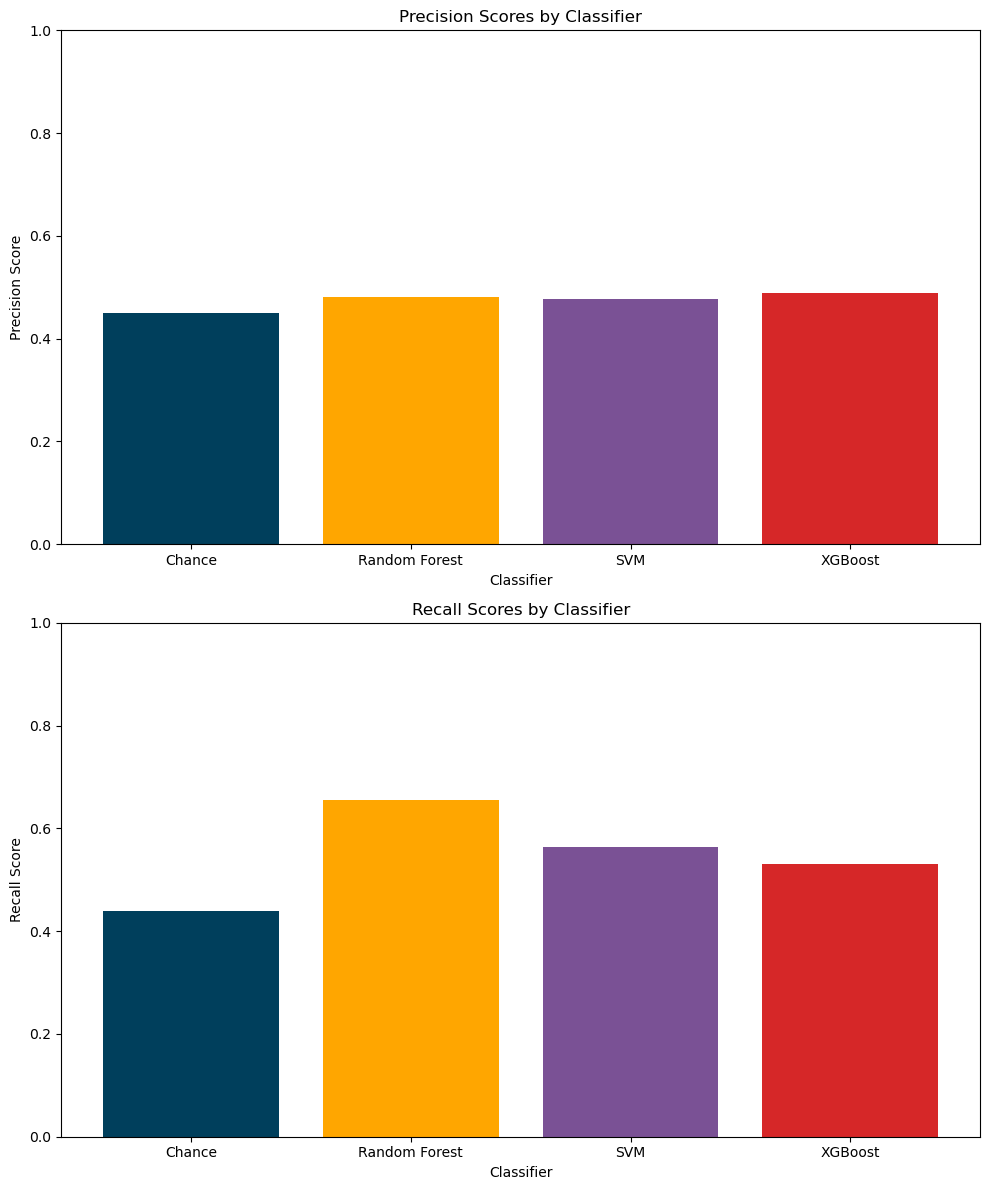

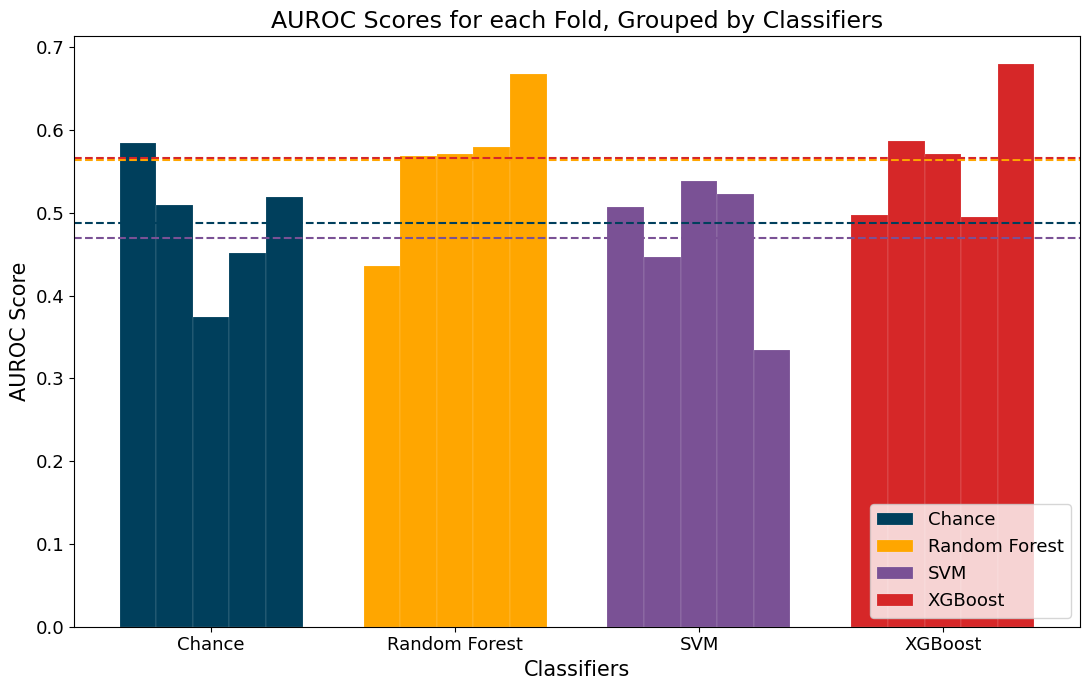

In [37]:
df = df_d2_clean
features = ["wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", "wordCount_without_stopwords", 
            "syllableCount_without_stopwords", "sentiment", "PP_CD", "PP_NN", "PP_JJ", "PP_VBN", "PP_VBP", "PP_NNS", "PP_VBD", 
            "PP_VBG", "PP_DT", "PP_IN", "PP_JJS", "PP_MD", "PP_VB", "PP_RB", "PP_VBZ", "PP_RBS", "PP_JJR", "PP_WRB", "PP_RBR", 
            "PP_2_CD", "PP_2_NN", "PP_2_JJ", "PP_2_VBN", "PP_2_VBP", "PP_2_NNS", "PP_2_VBD", "PP_2_VBG", "PP_2_DT", "PP_2_IN", 
            "PP_2_JJS", "PP_2_MD", "PP_2_VB", "PP_2_RB", "PP_2_VBZ", "PP_2_RBS", "PP_2_JJR", "PP_2_WRB", "PP_2_RBR", "PP_3_CD", 
            "PP_3_NN", "PP_3_JJ", "PP_3_VBN", "PP_3_VBP", "PP_3_NNS", "PP_3_VBD", "PP_3_VBG", "PP_3_DT", "PP_3_IN", "PP_3_JJS", 
            "PP_3_MD", "PP_3_VB", "PP_3_RB", "PP_3_VBZ", "PP_3_RBS", "PP_3_JJR", "PP_3_WRB", "PP_3_RBR"]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION FEATURES

Chance Results:
Avg Accuracy: 0.49
Avg Weighted F1 Score: 0.49
Avg Precision_1: 0.43
Avg Recall_1: 0.41
Avg AUROC: 0.48
Avg Confusion Matrix:
[[23.8 19. ]
 [20.8 14.2]]
Avg Prediction Rate: 0.43

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.53
Avg Weighted F1 Score: 0.53
Avg Precision_1: 0.47
Avg Recall_1: 0.46
Avg AUROC: 0.53
Avg Confusion Matrix:
[[24.6 18.2]
 [18.6 16.4]]
Avg Prediction Rate: 0.45

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

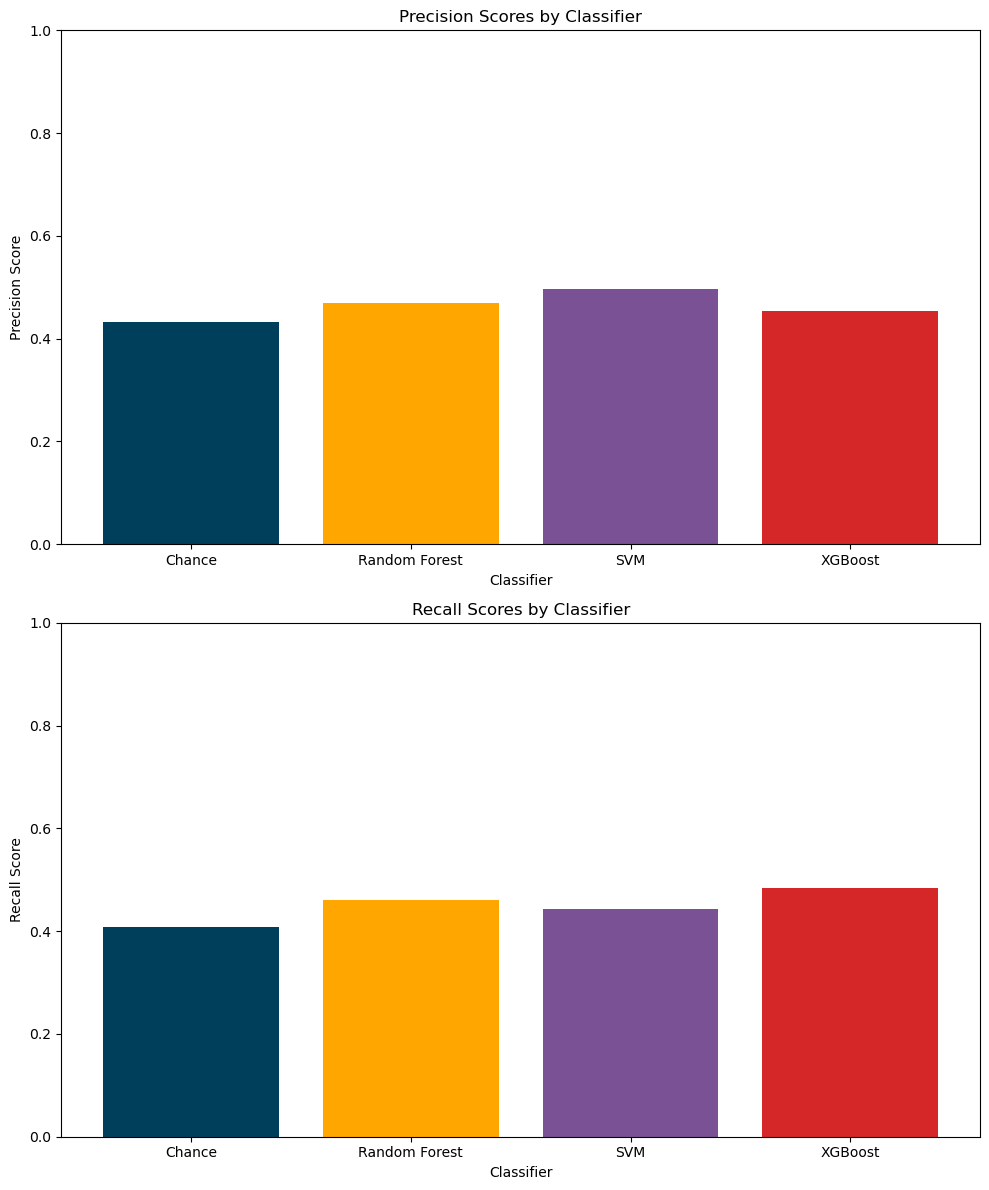

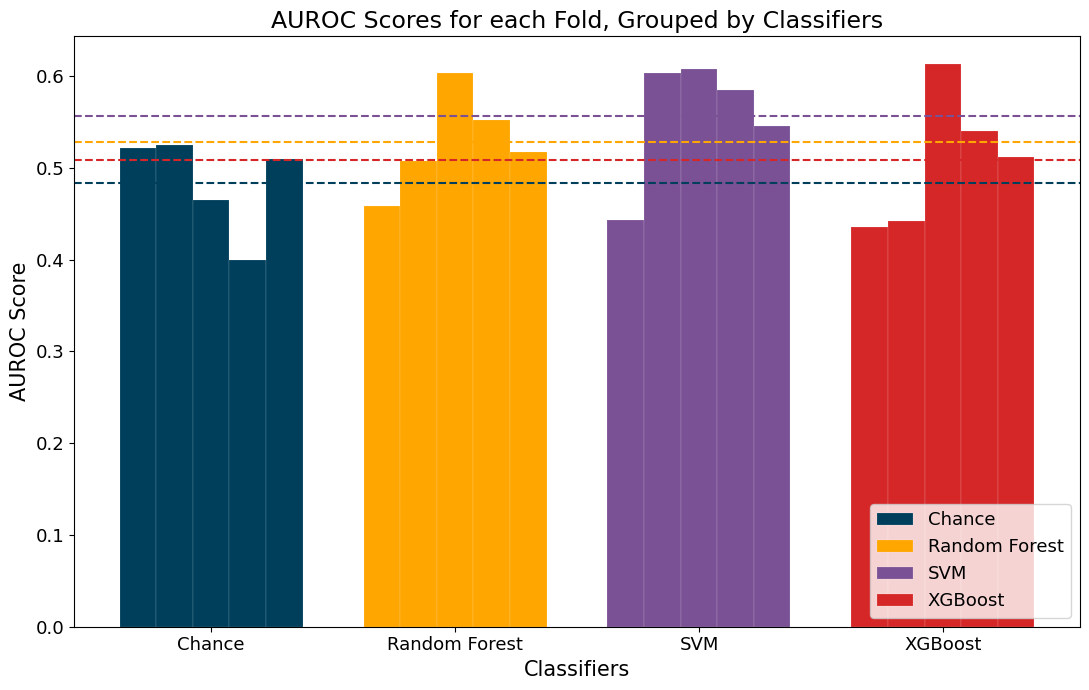

In [38]:
df = df_d2_clean
features = ["PP_Gazes", "PP_AOI_Gazes", "PP_OffscreenPix", "PP_OffscreenProp", "PP_2_Gazes", "PP_2_AOI_Gazes", 
            "PP_2_OffscreenPix", "PP_2_OffscreenProp", "PP_3_Gazes", "PP_3_AOI_Gazes", "PP_3_OffscreenPix", 
            "PP_3_OffscreenProp", "PP_cluster_num_clusters", "PP_cluster_avg_duration", "PP_cluster_sd_duration", 
            "PP_cluster_skew_duration", "PP_dispersion", "PP_2_cluster_num_clusters", "PP_2_cluster_avg_duration", 
            "PP_2_cluster_sd_duration", "PP_2_cluster_skew_duration", "PP_2_dispersion", "PP_3_cluster_num_clusters", 
            "PP_3_cluster_avg_duration", "PP_3_cluster_sd_duration", "PP_3_cluster_skew_duration", "PP_3_dispersion"
]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + NLP

Chance Results:
Avg Accuracy: 0.53
Avg Weighted F1 Score: 0.52
Avg Precision_1: 0.48
Avg Recall_1: 0.41
Avg AUROC: 0.50
Avg Confusion Matrix:
[[26.8 16. ]
 [20.8 14.2]]
Avg Prediction Rate: 0.39

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.55
Avg Weighted F1 Score: 0.55
Avg Precision_1: 0.50
Avg Recall_1: 0.50
Avg AUROC: 0.54
Avg Confusion Matrix:
[[25.2 17.6]
 [17.4 17.6]]
Avg Prediction Rate: 0.45

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

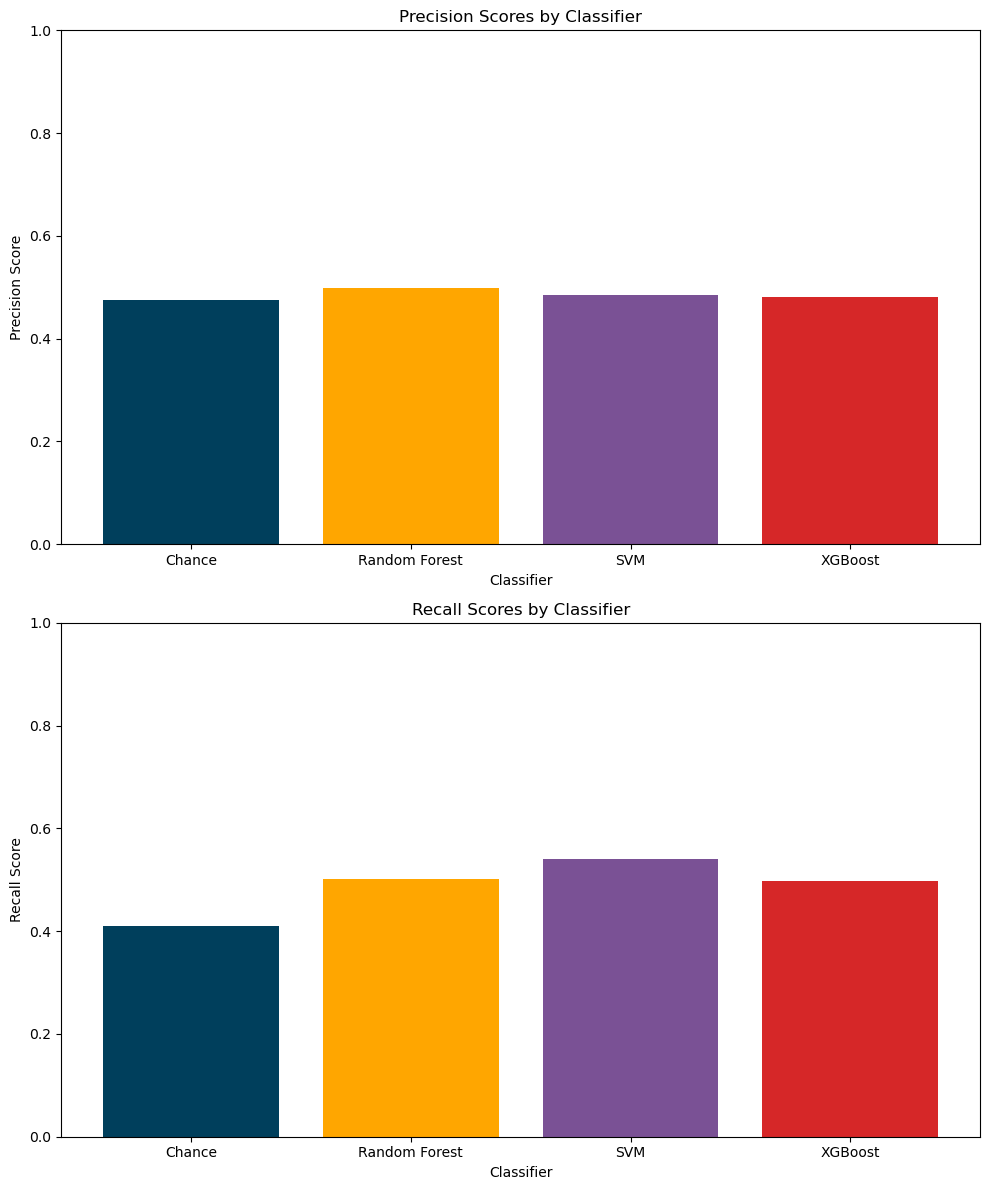

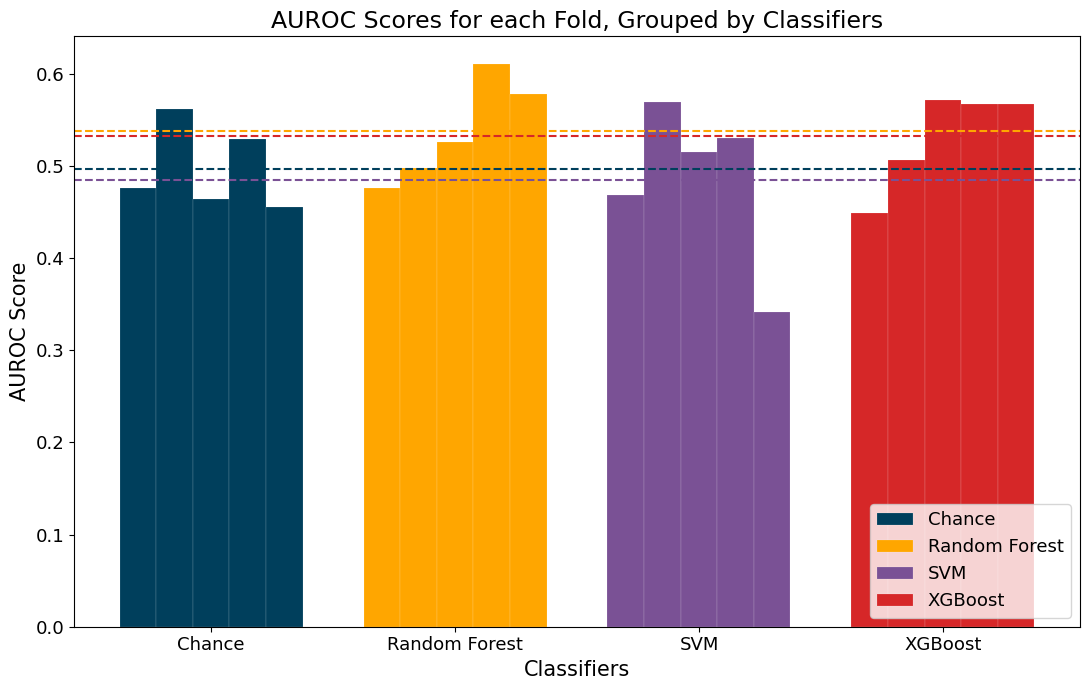

In [39]:
df = df_d2_clean
features = ["PP_Gazes", "PP_AOI_Gazes", "PP_OffscreenPix", "PP_OffscreenProp", "PP_2_Gazes", "PP_2_AOI_Gazes", 
            "PP_2_OffscreenPix", "PP_2_OffscreenProp", "PP_3_Gazes", "PP_3_AOI_Gazes", "PP_3_OffscreenPix", 
            "PP_3_OffscreenProp", "PP_cluster_num_clusters", "PP_cluster_avg_duration", "PP_cluster_sd_duration", 
            "PP_cluster_skew_duration", "PP_dispersion", "PP_2_cluster_num_clusters", "PP_2_cluster_avg_duration", 
            "PP_2_cluster_sd_duration", "PP_2_cluster_skew_duration", "PP_2_dispersion", "PP_3_cluster_num_clusters", 
            "PP_3_cluster_avg_duration", "PP_3_cluster_sd_duration", "PP_3_cluster_skew_duration", "PP_3_dispersion", 
            "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", "wordCount_without_stopwords", 
            "syllableCount_without_stopwords", "sentiment", "PP_CD", "PP_NN", "PP_JJ", "PP_VBN", "PP_VBP", "PP_NNS", "PP_VBD", 
            "PP_VBG", "PP_DT", "PP_IN", "PP_JJS", "PP_MD", "PP_VB", "PP_RB", "PP_VBZ", "PP_RBS", "PP_JJR", "PP_WRB", "PP_RBR", 
            "PP_2_CD", "PP_2_NN", "PP_2_JJ", "PP_2_VBN", "PP_2_VBP", "PP_2_NNS", "PP_2_VBD", "PP_2_VBG", "PP_2_DT", "PP_2_IN", 
            "PP_2_JJS", "PP_2_MD", "PP_2_VB", "PP_2_RB", "PP_2_VBZ", "PP_2_RBS", "PP_2_JJR", "PP_2_WRB", "PP_2_RBR", "PP_3_CD", 
            "PP_3_NN", "PP_3_JJ", "PP_3_VBN", "PP_3_VBP", "PP_3_NNS", "PP_3_VBD", "PP_3_VBG", "PP_3_DT", "PP_3_IN", "PP_3_JJS", 
            "PP_3_MD", "PP_3_VB", "PP_3_RB", "PP_3_VBZ", "PP_3_RBS", "PP_3_JJR", "PP_3_WRB", "PP_3_RBR"
]


precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

## MODELING Dyslexia, Dyspraxia, Dyscalculia, Dysgraphia

### NLP FEATURES

Chance Results:
Avg Accuracy: 0.48
Avg Weighted F1 Score: 0.49
Avg Precision_1: 0.51
Avg Recall_1: 0.59
Avg AUROC: 0.47
Avg Confusion Matrix:
[[2.4 4.4]
 [3.8 4.8]]
Avg Prediction Rate: 0.60

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.44
Avg Weighted F1 Score: 0.45
Avg Precision_1: 0.51
Avg Recall_1: 0.47
Avg AUROC: 0.47
Avg Confusion Matrix:
[[2.6 4.2]
 [4.4 4.2]]
Avg Prediction Rate: 0.54

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits

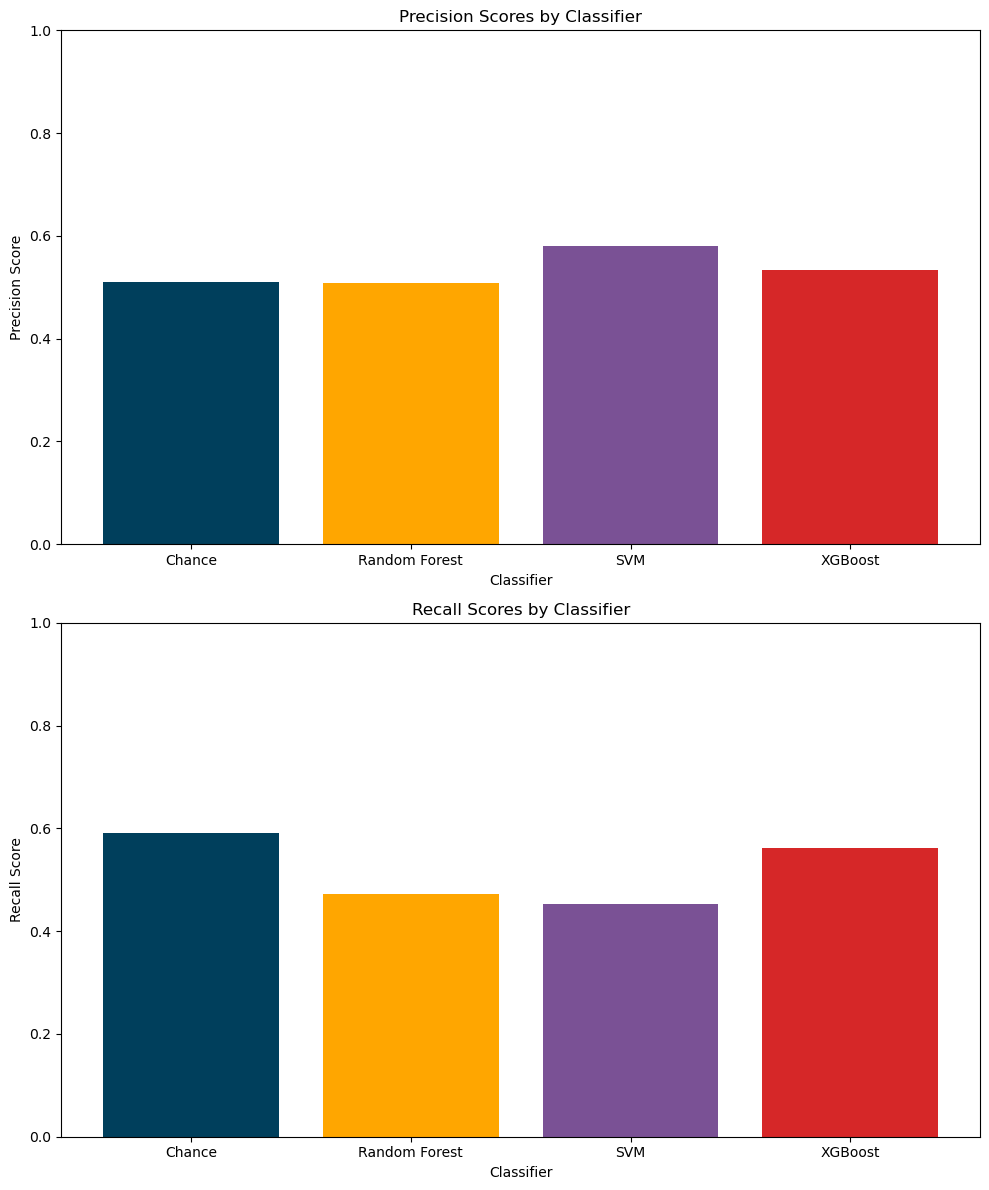

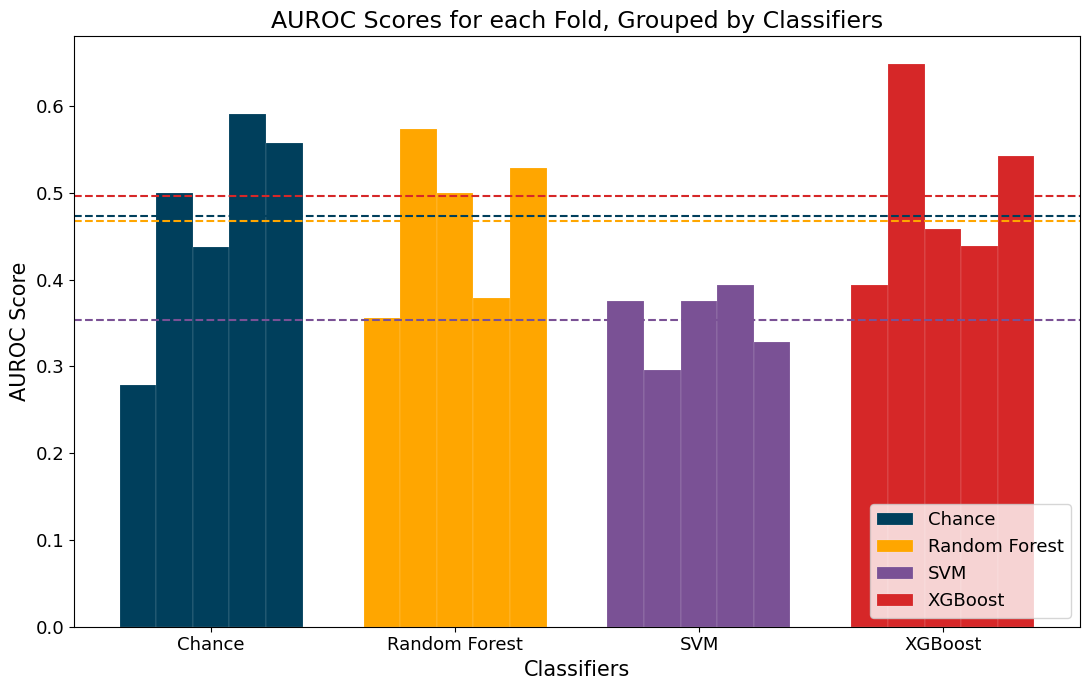

In [40]:
df = df_d3_clean
features = ["wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", "wordCount_without_stopwords", 
            "syllableCount_without_stopwords", "sentiment", "PP_CD", "PP_NN", "PP_JJ", "PP_VBN", "PP_VBP", "PP_NNS", "PP_VBD", 
            "PP_VBG", "PP_DT", "PP_IN", "PP_JJS", "PP_MD", "PP_VB", "PP_RB", "PP_VBZ", "PP_RBS", "PP_JJR", "PP_WRB", "PP_RBR", 
            "PP_2_CD", "PP_2_NN", "PP_2_JJ", "PP_2_VBN", "PP_2_VBP", "PP_2_NNS", "PP_2_VBD", "PP_2_VBG", "PP_2_DT", "PP_2_IN", 
            "PP_2_JJS", "PP_2_MD", "PP_2_VB", "PP_2_RB", "PP_2_VBZ", "PP_2_RBS", "PP_2_JJR", "PP_2_WRB", "PP_2_RBR", "PP_3_CD", 
            "PP_3_NN", "PP_3_JJ", "PP_3_VBN", "PP_3_VBP", "PP_3_NNS", "PP_3_VBD", "PP_3_VBG", "PP_3_DT", "PP_3_IN", "PP_3_JJS", 
            "PP_3_MD", "PP_3_VB", "PP_3_RB", "PP_3_VBZ", "PP_3_RBS", "PP_3_JJR", "PP_3_WRB", "PP_3_RBR"]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION FEATURES

Chance Results:
Avg Accuracy: 0.51
Avg Weighted F1 Score: 0.52
Avg Precision_1: 0.57
Avg Recall_1: 0.61
Avg AUROC: 0.51
Avg Confusion Matrix:
[[3.2 3.6]
 [4.  4.6]]
Avg Prediction Rate: 0.54

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.63
Avg Weighted F1 Score: 0.62
Avg Precision_1: 0.65
Avg Recall_1: 0.66
Avg AUROC: 0.65
Avg Confusion Matrix:
[[4.  2.8]
 [3.  5.6]]
Avg Prediction Rate: 0.54

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits

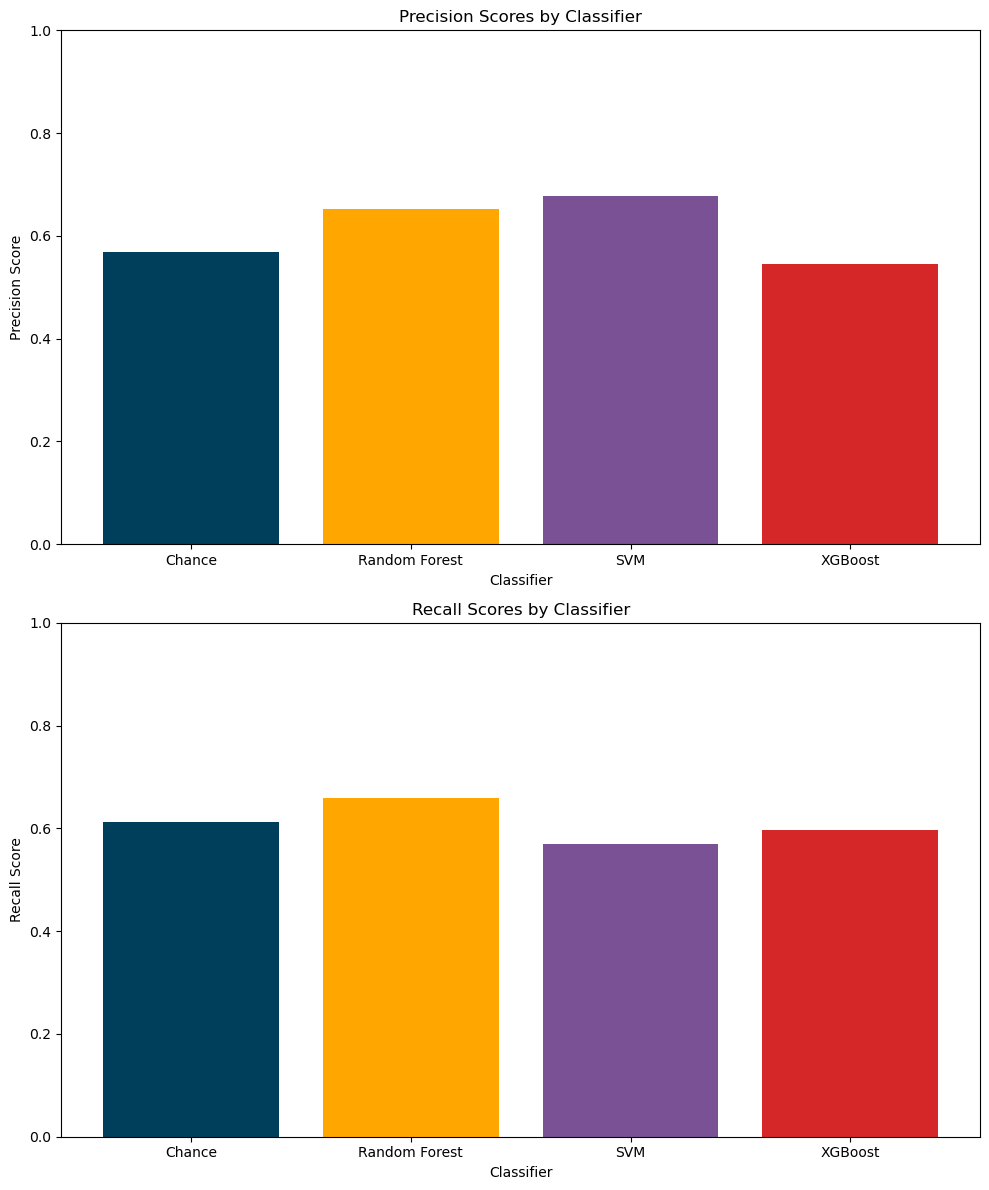

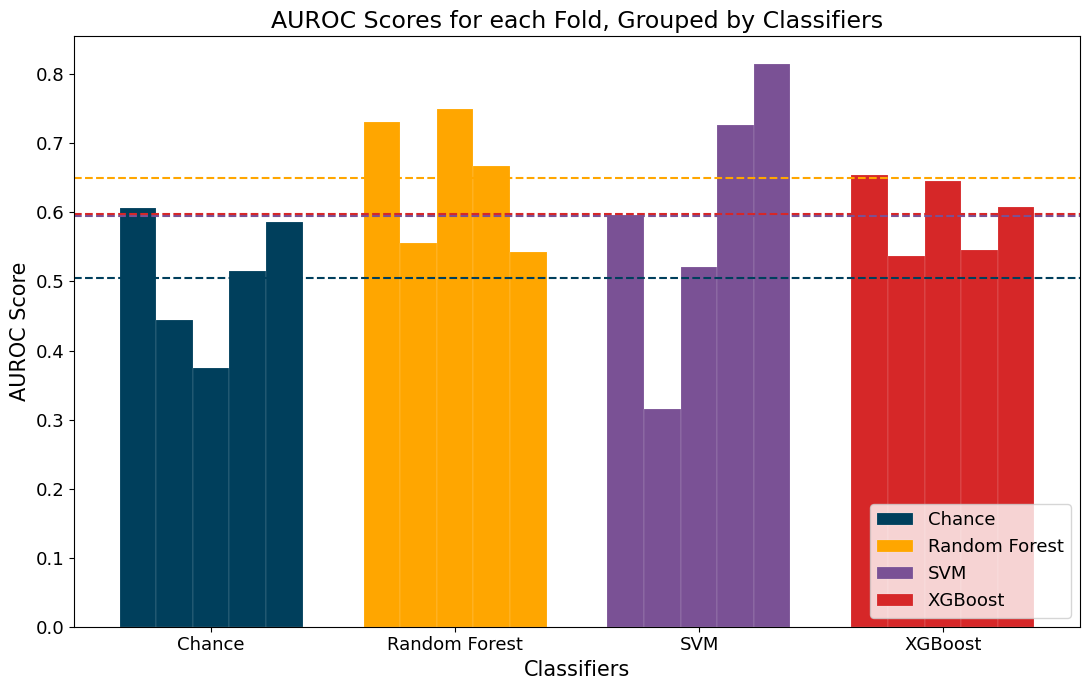

In [41]:
df = df_d3_clean
features = ["PP_Gazes", "PP_AOI_Gazes", "PP_OffscreenPix", "PP_OffscreenProp", "PP_2_Gazes", "PP_2_AOI_Gazes", 
            "PP_2_OffscreenPix", "PP_2_OffscreenProp", "PP_3_Gazes", "PP_3_AOI_Gazes", "PP_3_OffscreenPix", 
            "PP_3_OffscreenProp", "PP_cluster_num_clusters", "PP_cluster_avg_duration", "PP_cluster_sd_duration", 
            "PP_cluster_skew_duration", "PP_dispersion", "PP_2_cluster_num_clusters", "PP_2_cluster_avg_duration", 
            "PP_2_cluster_sd_duration", "PP_2_cluster_skew_duration", "PP_2_dispersion", "PP_3_cluster_num_clusters", 
            "PP_3_cluster_avg_duration", "PP_3_cluster_sd_duration", "PP_3_cluster_skew_duration", "PP_3_dispersion"
]


precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + NLP

Chance Results:
Avg Accuracy: 0.52
Avg Weighted F1 Score: 0.53
Avg Precision_1: 0.55
Avg Recall_1: 0.63
Avg AUROC: 0.58
Avg Confusion Matrix:
[[2.8 4. ]
 [3.4 5.2]]
Avg Prediction Rate: 0.60

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.59
Avg Weighted F1 Score: 0.57
Avg Precision_1: 0.60
Avg Recall_1: 0.58
Avg AUROC: 0.55
Avg Confusion Matrix:
[[3.8 3. ]
 [3.4 5.2]]
Avg Prediction Rate: 0.53

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits

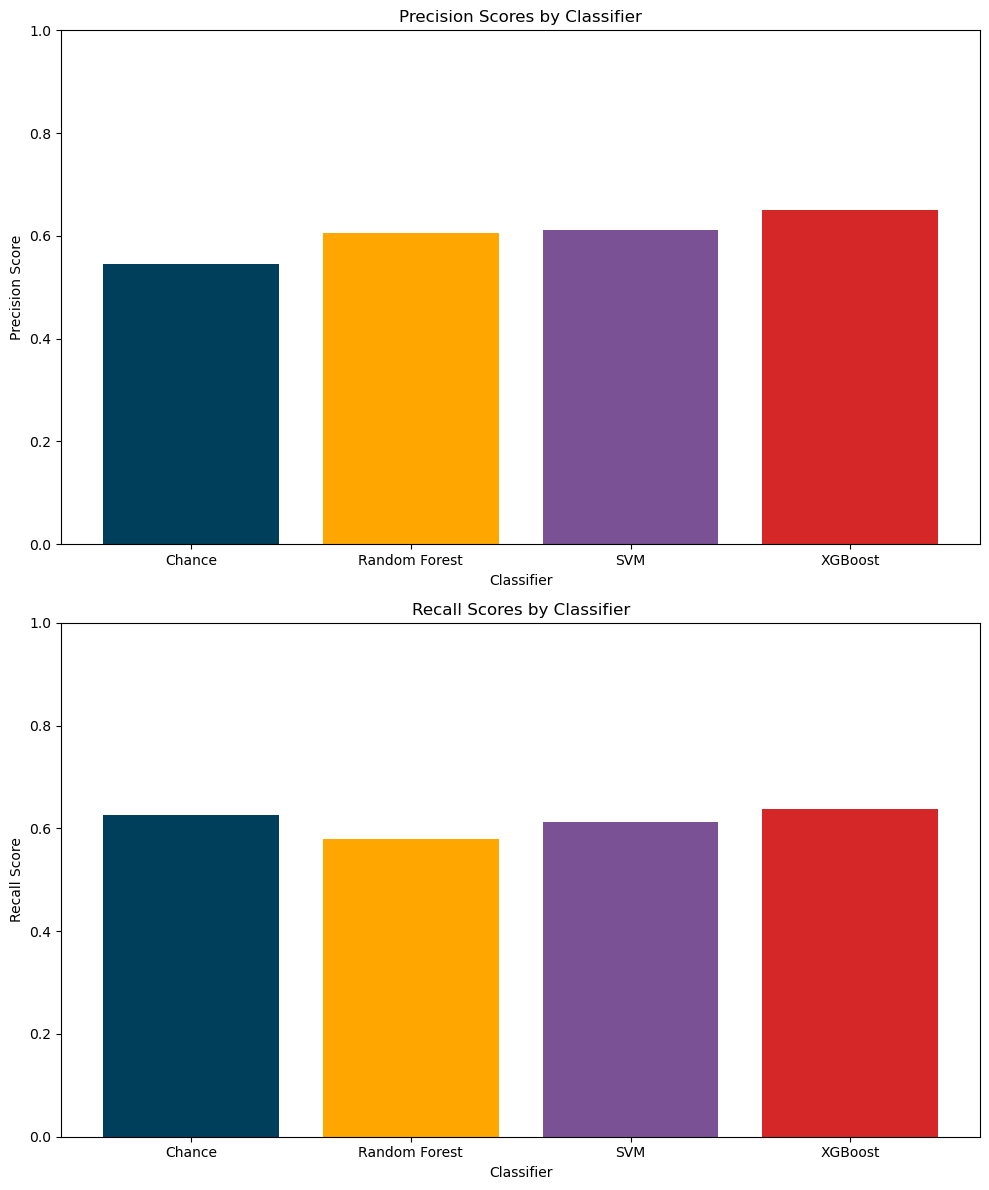

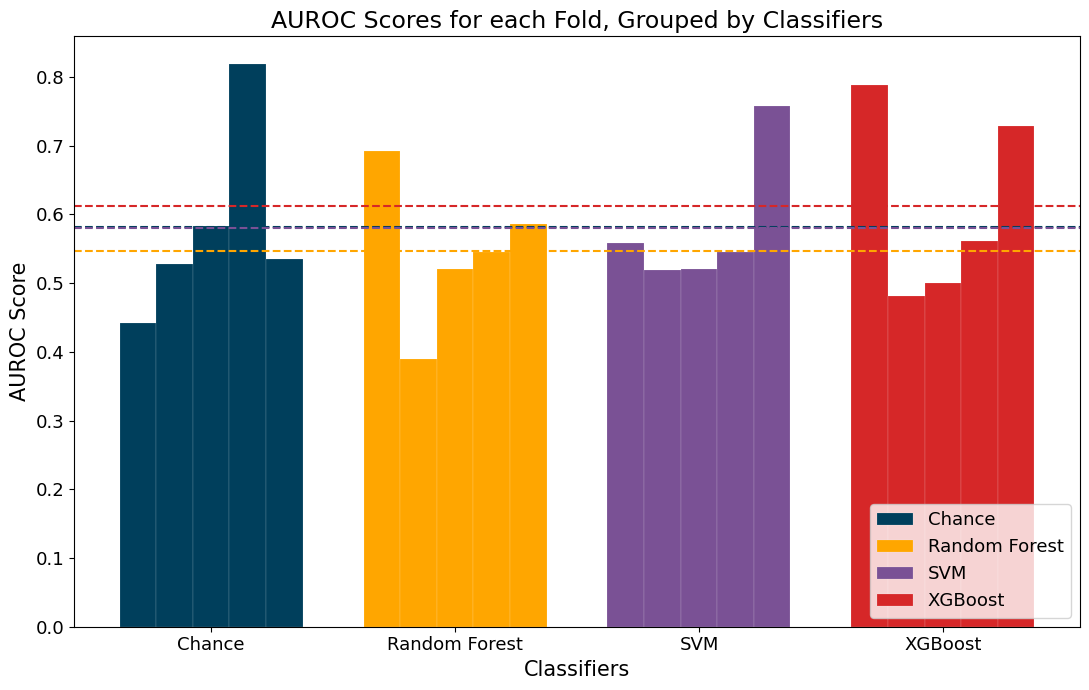

In [42]:
df = df_d3_clean
features = ["PP_Gazes", "PP_AOI_Gazes", "PP_OffscreenPix", "PP_OffscreenProp", "PP_2_Gazes", "PP_2_AOI_Gazes", 
            "PP_2_OffscreenPix", "PP_2_OffscreenProp", "PP_3_Gazes", "PP_3_AOI_Gazes", "PP_3_OffscreenPix", 
            "PP_3_OffscreenProp", "PP_cluster_num_clusters", "PP_cluster_avg_duration", "PP_cluster_sd_duration", 
            "PP_cluster_skew_duration", "PP_dispersion", "PP_2_cluster_num_clusters", "PP_2_cluster_avg_duration", 
            "PP_2_cluster_sd_duration", "PP_2_cluster_skew_duration", "PP_2_dispersion", "PP_3_cluster_num_clusters", 
            "PP_3_cluster_avg_duration", "PP_3_cluster_sd_duration", "PP_3_cluster_skew_duration", "PP_3_dispersion", 
            "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", "wordCount_without_stopwords", 
            "syllableCount_without_stopwords", "sentiment", "PP_CD", "PP_NN", "PP_JJ", "PP_VBN", "PP_VBP", "PP_NNS", "PP_VBD", 
            "PP_VBG", "PP_DT", "PP_IN", "PP_JJS", "PP_MD", "PP_VB", "PP_RB", "PP_VBZ", "PP_RBS", "PP_JJR", "PP_WRB", "PP_RBR", 
            "PP_2_CD", "PP_2_NN", "PP_2_JJ", "PP_2_VBN", "PP_2_VBP", "PP_2_NNS", "PP_2_VBD", "PP_2_VBG", "PP_2_DT", "PP_2_IN", 
            "PP_2_JJS", "PP_2_MD", "PP_2_VB", "PP_2_RB", "PP_2_VBZ", "PP_2_RBS", "PP_2_JJR", "PP_2_WRB", "PP_2_RBR", "PP_3_CD", 
            "PP_3_NN", "PP_3_JJ", "PP_3_VBN", "PP_3_VBP", "PP_3_NNS", "PP_3_VBD", "PP_3_VBG", "PP_3_DT", "PP_3_IN", "PP_3_JJS", 
            "PP_3_MD", "PP_3_VB", "PP_3_RB", "PP_3_VBZ", "PP_3_RBS", "PP_3_JJR", "PP_3_WRB", "PP_3_RBR"
]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

## MODELING Any other language, reading, math, and nonverbal learning disorder

### NLP FEATURES

Chance Results:
Avg Accuracy: 0.51
Avg Weighted F1 Score: 0.51
Avg Precision_1: 0.43
Avg Recall_1: 0.47
Avg AUROC: 0.48
Avg Confusion Matrix:
[[4.8 3.8]
 [3.8 2.8]]
Avg Prediction Rate: 0.44

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.62
Avg Weighted F1 Score: 0.61
Avg Precision_1: 0.57
Avg Recall_1: 0.46
Avg AUROC: 0.64
Avg Confusion Matrix:
[[6.2 2.4]
 [3.4 3.2]]
Avg Prediction Rate: 0.36

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits

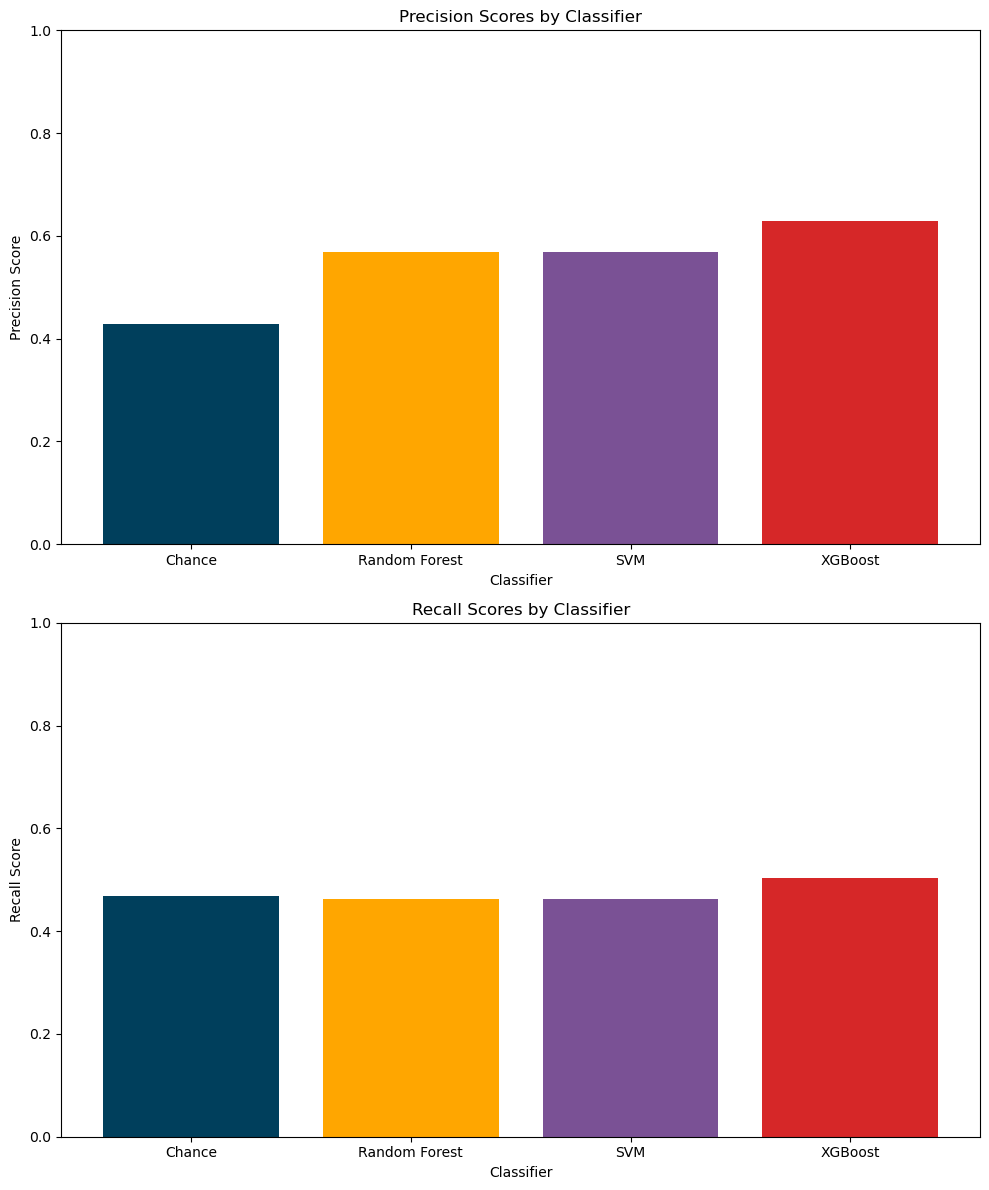

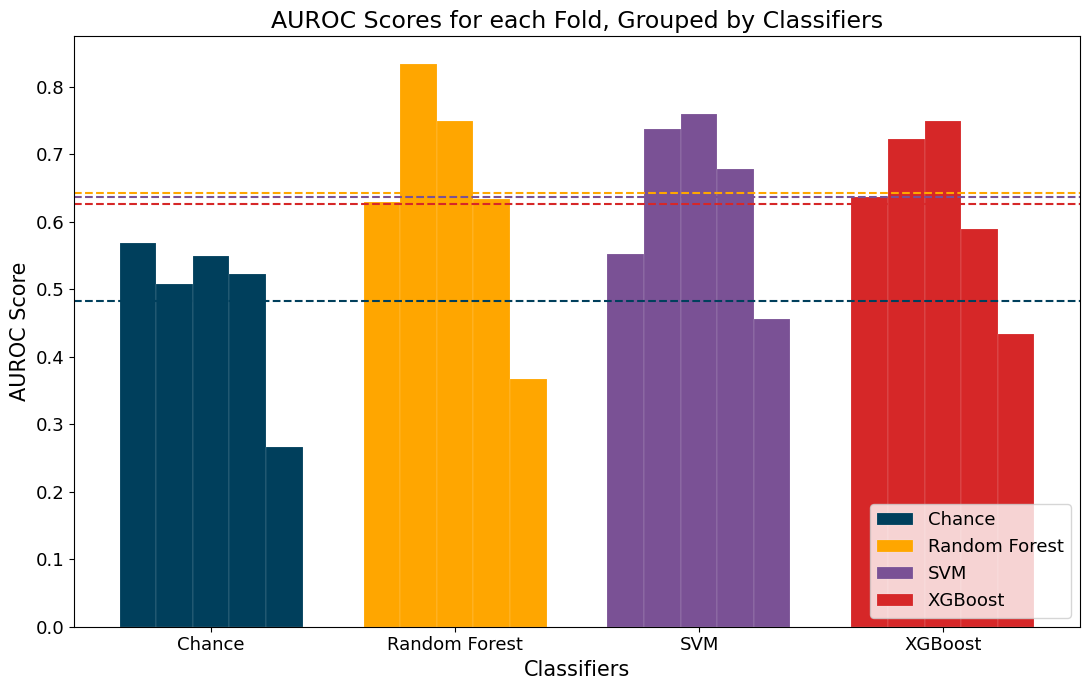

In [43]:
df = df_d4_clean
features = ["wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", "wordCount_without_stopwords", 
            "syllableCount_without_stopwords", "sentiment", "PP_CD", "PP_NN", "PP_JJ", "PP_VBN", "PP_VBP", "PP_NNS", "PP_VBD", 
            "PP_VBG", "PP_DT", "PP_IN", "PP_JJS", "PP_MD", "PP_VB", "PP_RB", "PP_VBZ", "PP_RBS", "PP_JJR", "PP_WRB", "PP_RBR", 
            "PP_2_CD", "PP_2_NN", "PP_2_JJ", "PP_2_VBN", "PP_2_VBP", "PP_2_NNS", "PP_2_VBD", "PP_2_VBG", "PP_2_DT", "PP_2_IN", 
            "PP_2_JJS", "PP_2_MD", "PP_2_VB", "PP_2_RB", "PP_2_VBZ", "PP_2_RBS", "PP_2_JJR", "PP_2_WRB", "PP_2_RBR", "PP_3_CD", 
            "PP_3_NN", "PP_3_JJ", "PP_3_VBN", "PP_3_VBP", "PP_3_NNS", "PP_3_VBD", "PP_3_VBG", "PP_3_DT", "PP_3_IN", "PP_3_JJS", 
            "PP_3_MD", "PP_3_VB", "PP_3_RB", "PP_3_VBZ", "PP_3_RBS", "PP_3_JJR", "PP_3_WRB", "PP_3_RBR"]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION FEATURES

Chance Results:
Avg Accuracy: 0.54
Avg Weighted F1 Score: 0.54
Avg Precision_1: 0.46
Avg Recall_1: 0.43
Avg AUROC: 0.50
Avg Confusion Matrix:
[[5.2 3.4]
 [3.6 3. ]]
Avg Prediction Rate: 0.41

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.43
Avg Weighted F1 Score: 0.41
Avg Precision_1: 0.32
Avg Recall_1: 0.28
Avg AUROC: 0.43
Avg Confusion Matrix:
[[4.8 3.8]
 [4.8 1.8]]
Avg Prediction Rate: 0.36

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits

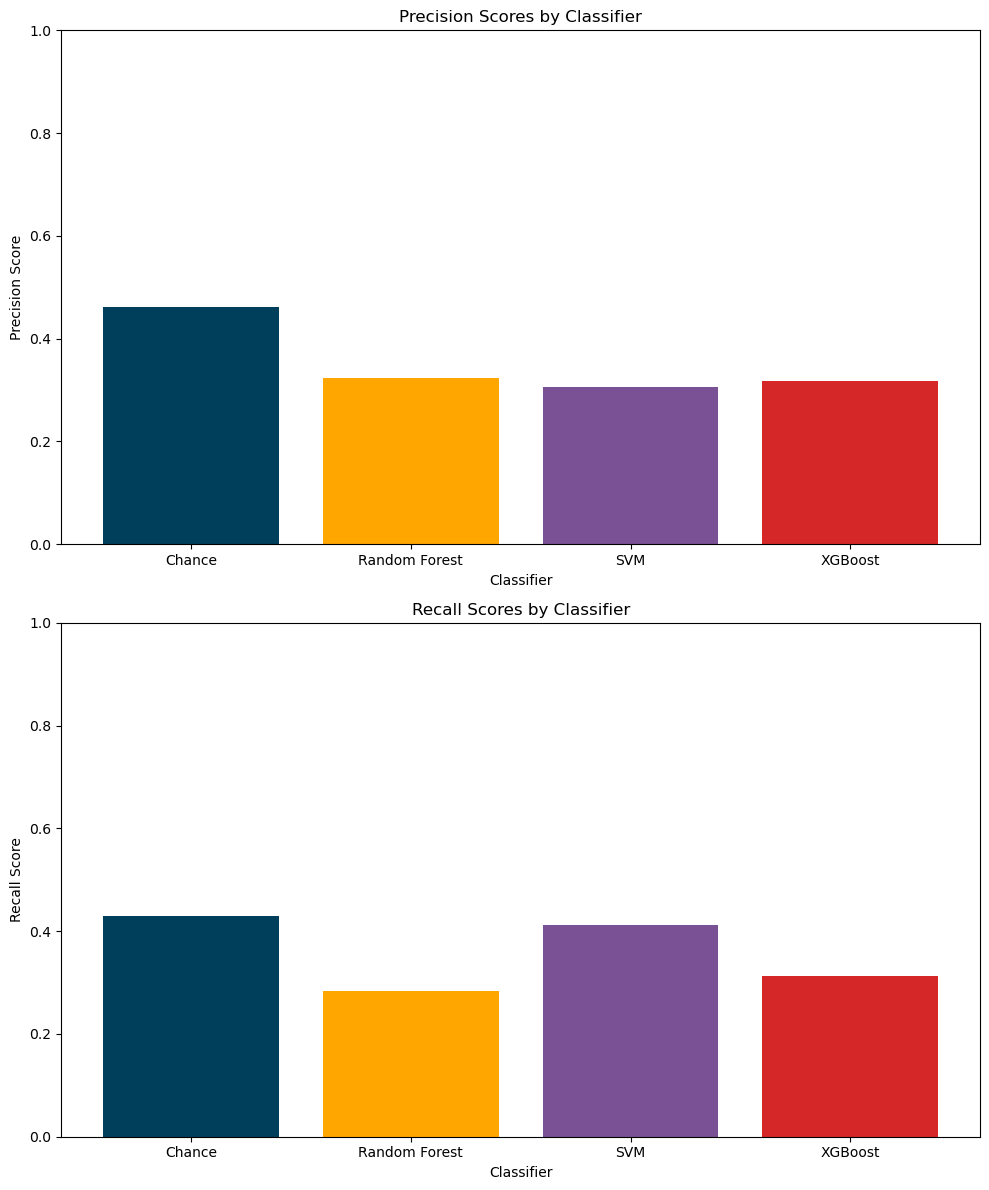

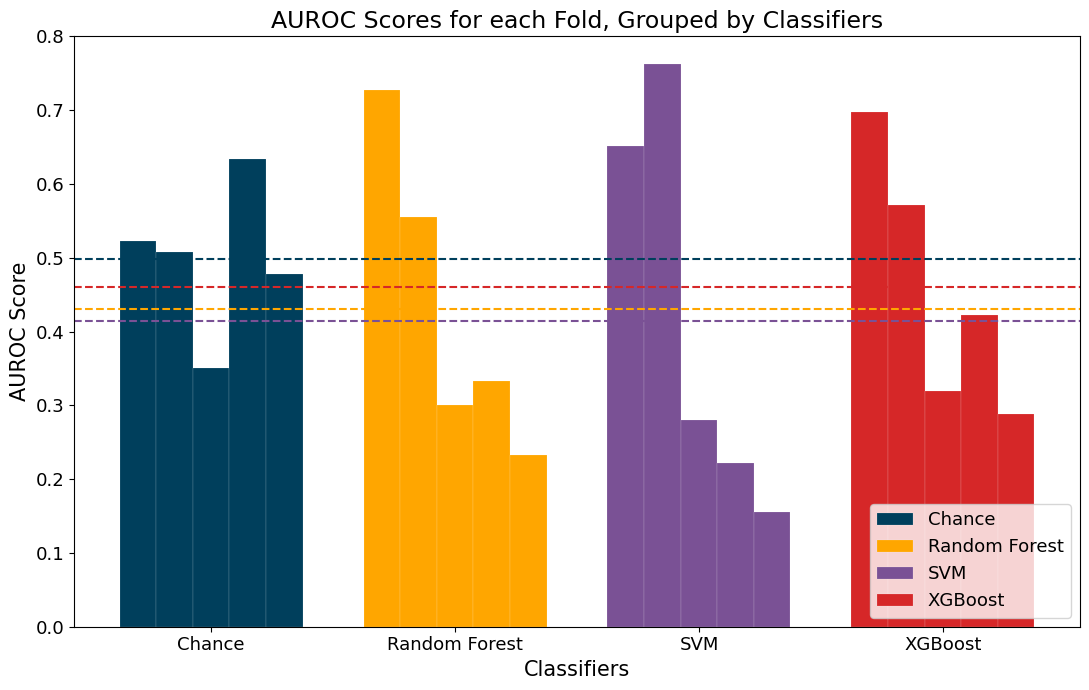

In [44]:
df = df_d4_clean
features = ["PP_Gazes", "PP_AOI_Gazes", "PP_OffscreenPix", "PP_OffscreenProp", "PP_2_Gazes", "PP_2_AOI_Gazes", 
            "PP_2_OffscreenPix", "PP_2_OffscreenProp", "PP_3_Gazes", "PP_3_AOI_Gazes", "PP_3_OffscreenPix", 
            "PP_3_OffscreenProp", "PP_cluster_num_clusters", "PP_cluster_avg_duration", "PP_cluster_sd_duration", 
            "PP_cluster_skew_duration", "PP_dispersion", "PP_2_cluster_num_clusters", "PP_2_cluster_avg_duration", 
            "PP_2_cluster_sd_duration", "PP_2_cluster_skew_duration", "PP_2_dispersion", "PP_3_cluster_num_clusters", 
            "PP_3_cluster_avg_duration", "PP_3_cluster_sd_duration", "PP_3_cluster_skew_duration", "PP_3_dispersion"
]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + NLP

Chance Results:
Avg Accuracy: 0.50
Avg Weighted F1 Score: 0.50
Avg Precision_1: 0.45
Avg Recall_1: 0.41
Avg AUROC: 0.52
Avg Confusion Matrix:
[[5.  3.6]
 [4.  2.6]]
Avg Prediction Rate: 0.41

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.54
Avg Weighted F1 Score: 0.52
Avg Precision_1: 0.46
Avg Recall_1: 0.42
Avg AUROC: 0.57
Avg Confusion Matrix:
[[5.2 3.4]
 [3.6 3. ]]
Avg Prediction Rate: 0.41

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits

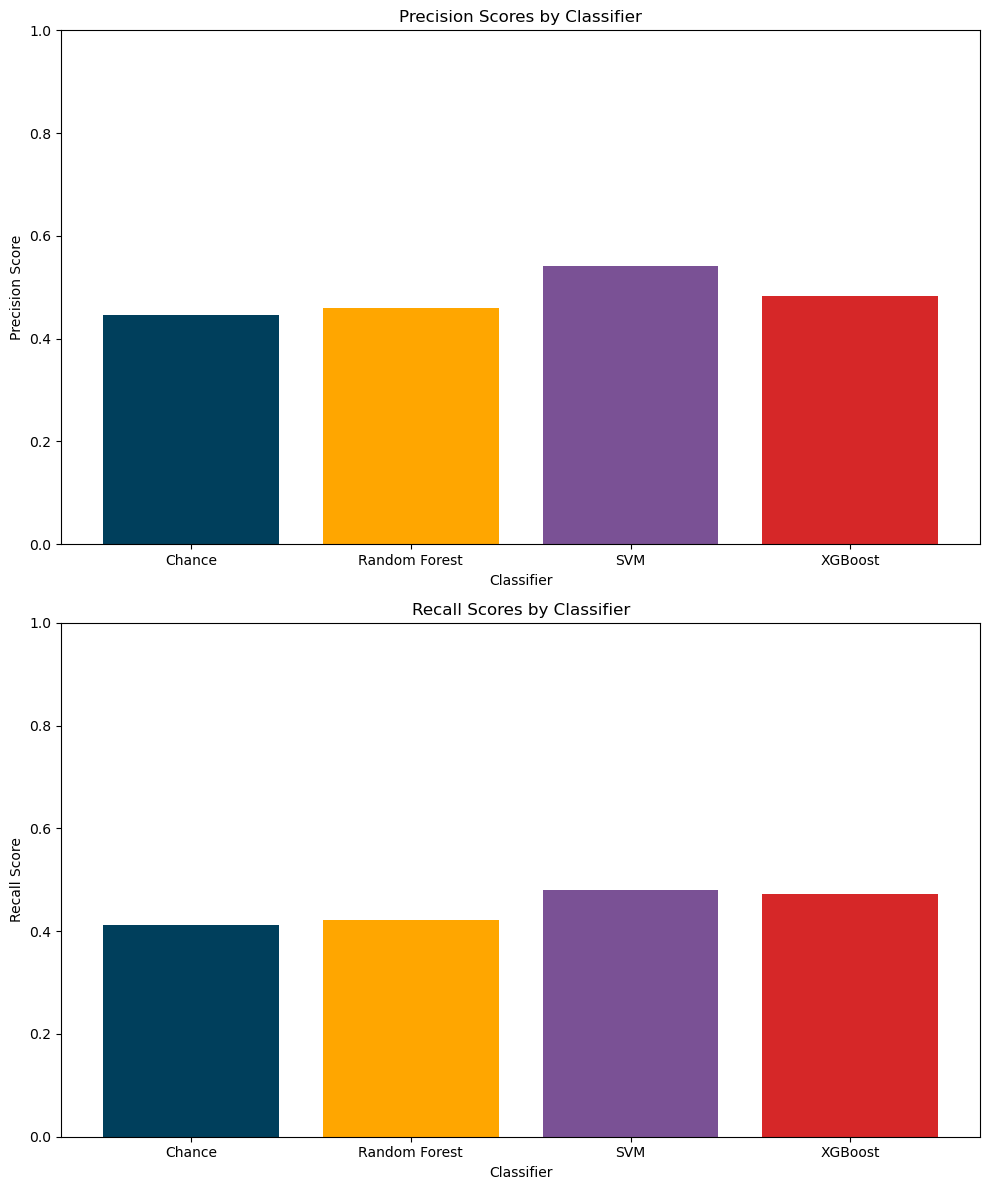

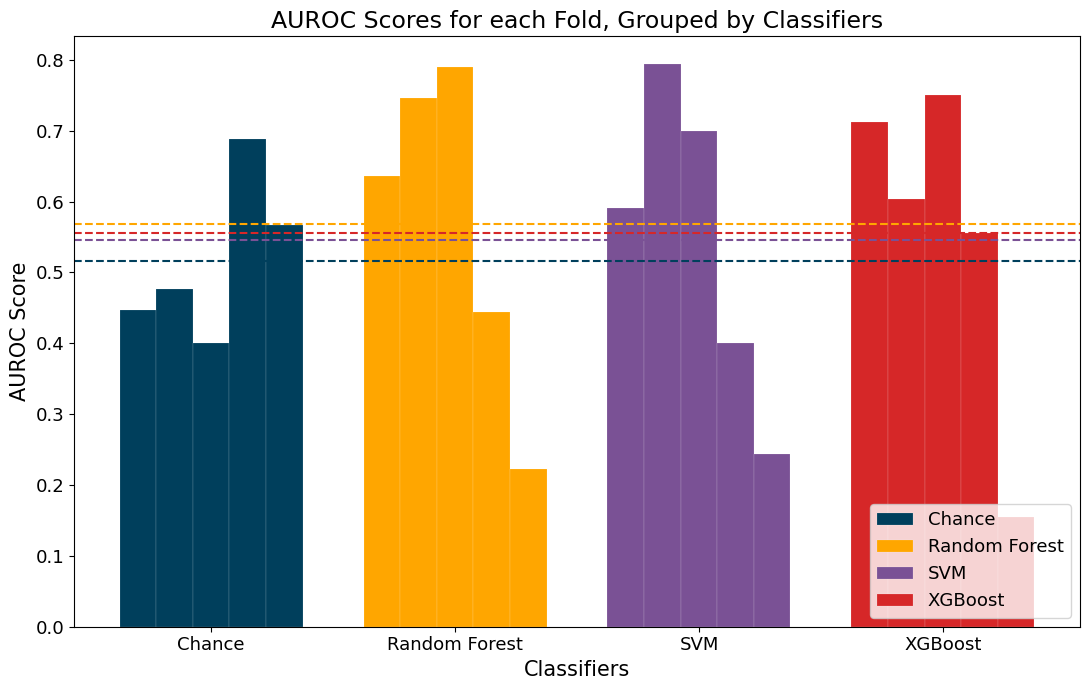

In [45]:
df = df_d4_clean
features = ["PP_Gazes", "PP_AOI_Gazes", "PP_OffscreenPix", "PP_OffscreenProp", "PP_2_Gazes", "PP_2_AOI_Gazes", 
            "PP_2_OffscreenPix", "PP_2_OffscreenProp", "PP_3_Gazes", "PP_3_AOI_Gazes", "PP_3_OffscreenPix", 
            "PP_3_OffscreenProp", "PP_cluster_num_clusters", "PP_cluster_avg_duration", "PP_cluster_sd_duration", 
            "PP_cluster_skew_duration", "PP_dispersion", "PP_2_cluster_num_clusters", "PP_2_cluster_avg_duration", 
            "PP_2_cluster_sd_duration", "PP_2_cluster_skew_duration", "PP_2_dispersion", "PP_3_cluster_num_clusters", 
            "PP_3_cluster_avg_duration", "PP_3_cluster_sd_duration", "PP_3_cluster_skew_duration", "PP_3_dispersion", 
            "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", "wordCount_without_stopwords", 
            "syllableCount_without_stopwords", "sentiment", "PP_CD", "PP_NN", "PP_JJ", "PP_VBN", "PP_VBP", "PP_NNS", "PP_VBD", 
            "PP_VBG", "PP_DT", "PP_IN", "PP_JJS", "PP_MD", "PP_VB", "PP_RB", "PP_VBZ", "PP_RBS", "PP_JJR", "PP_WRB", "PP_RBR", 
            "PP_2_CD", "PP_2_NN", "PP_2_JJ", "PP_2_VBN", "PP_2_VBP", "PP_2_NNS", "PP_2_VBD", "PP_2_VBG", "PP_2_DT", "PP_2_IN", 
            "PP_2_JJS", "PP_2_MD", "PP_2_VB", "PP_2_RB", "PP_2_VBZ", "PP_2_RBS", "PP_2_JJR", "PP_2_WRB", "PP_2_RBR", "PP_3_CD", 
            "PP_3_NN", "PP_3_JJ", "PP_3_VBN", "PP_3_VBP", "PP_3_NNS", "PP_3_VBD", "PP_3_VBG", "PP_3_DT", "PP_3_IN", "PP_3_JJS", 
            "PP_3_MD", "PP_3_VB", "PP_3_RB", "PP_3_VBZ", "PP_3_RBS", "PP_3_JJR", "PP_3_WRB", "PP_3_RBR"
]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

## MODELING Generalized anxiety disorder

### NLP FEATURES

Chance Results:
Avg Accuracy: 0.52
Avg Weighted F1 Score: 0.52
Avg Precision_1: 0.45
Avg Recall_1: 0.45
Avg AUROC: 0.48
Avg Confusion Matrix:
[[32.  23.6]
 [23.4 19.4]]
Avg Prediction Rate: 0.44

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.58
Avg Weighted F1 Score: 0.57
Avg Precision_1: 0.53
Avg Recall_1: 0.54
Avg AUROC: 0.61
Avg Confusion Matrix:
[[33.2 22.4]
 [19.4 23.4]]
Avg Prediction Rate: 0.47

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

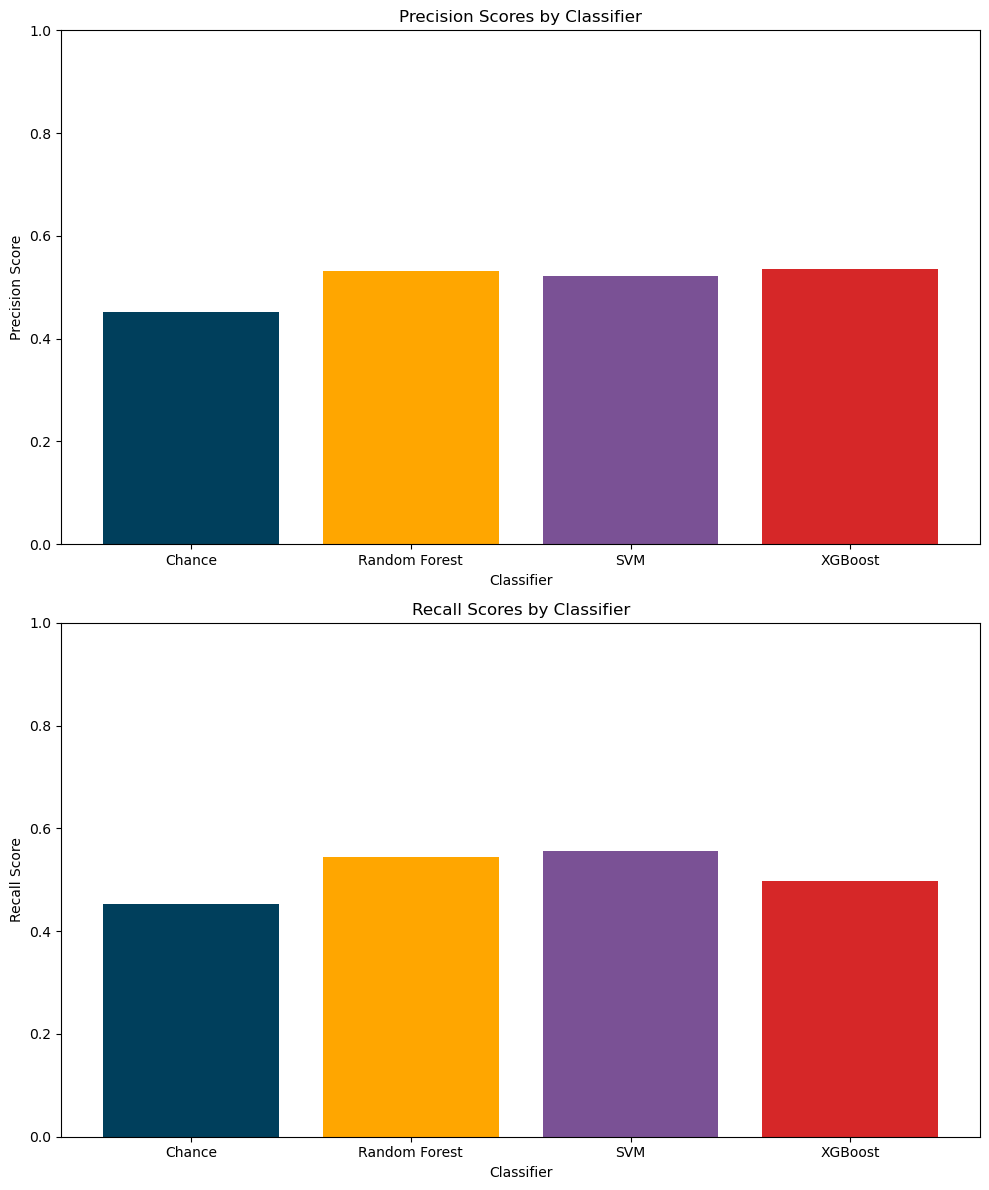

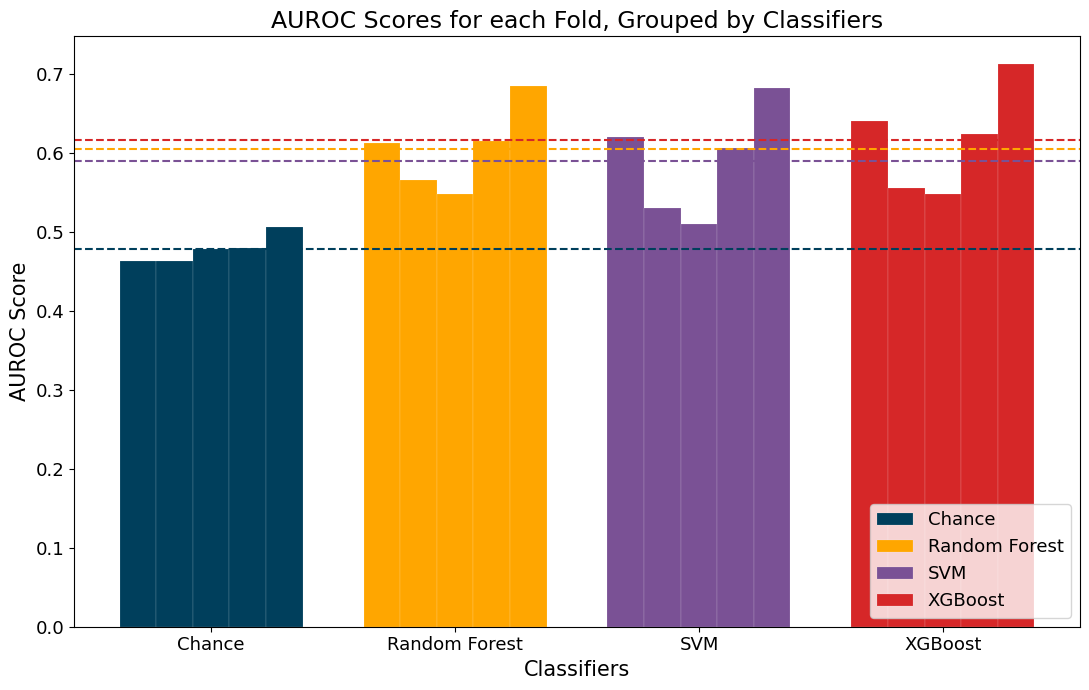

In [46]:
df = df_d5_clean
features = ["wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", "wordCount_without_stopwords", 
            "syllableCount_without_stopwords", "sentiment", "PP_CD", "PP_NN", "PP_JJ", "PP_VBN", "PP_VBP", "PP_NNS", "PP_VBD", 
            "PP_VBG", "PP_DT", "PP_IN", "PP_JJS", "PP_MD", "PP_VB", "PP_RB", "PP_VBZ", "PP_RBS", "PP_JJR", "PP_WRB", "PP_RBR", 
            "PP_2_CD", "PP_2_NN", "PP_2_JJ", "PP_2_VBN", "PP_2_VBP", "PP_2_NNS", "PP_2_VBD", "PP_2_VBG", "PP_2_DT", "PP_2_IN", 
            "PP_2_JJS", "PP_2_MD", "PP_2_VB", "PP_2_RB", "PP_2_VBZ", "PP_2_RBS", "PP_2_JJR", "PP_2_WRB", "PP_2_RBR", "PP_3_CD", 
            "PP_3_NN", "PP_3_JJ", "PP_3_VBN", "PP_3_VBP", "PP_3_NNS", "PP_3_VBD", "PP_3_VBG", "PP_3_DT", "PP_3_IN", "PP_3_JJS", 
            "PP_3_MD", "PP_3_VB", "PP_3_RB", "PP_3_VBZ", "PP_3_RBS", "PP_3_JJR", "PP_3_WRB", "PP_3_RBR"]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION FEATURES

Chance Results:
Avg Accuracy: 0.49
Avg Weighted F1 Score: 0.49
Avg Precision_1: 0.42
Avg Recall_1: 0.45
Avg AUROC: 0.50
Avg Confusion Matrix:
[[28.6 27. ]
 [23.4 19.4]]
Avg Prediction Rate: 0.47

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.55
Avg Weighted F1 Score: 0.54
Avg Precision_1: 0.47
Avg Recall_1: 0.46
Avg AUROC: 0.54
Avg Confusion Matrix:
[[34.  21.6]
 [23.  19.8]]
Avg Prediction Rate: 0.42

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

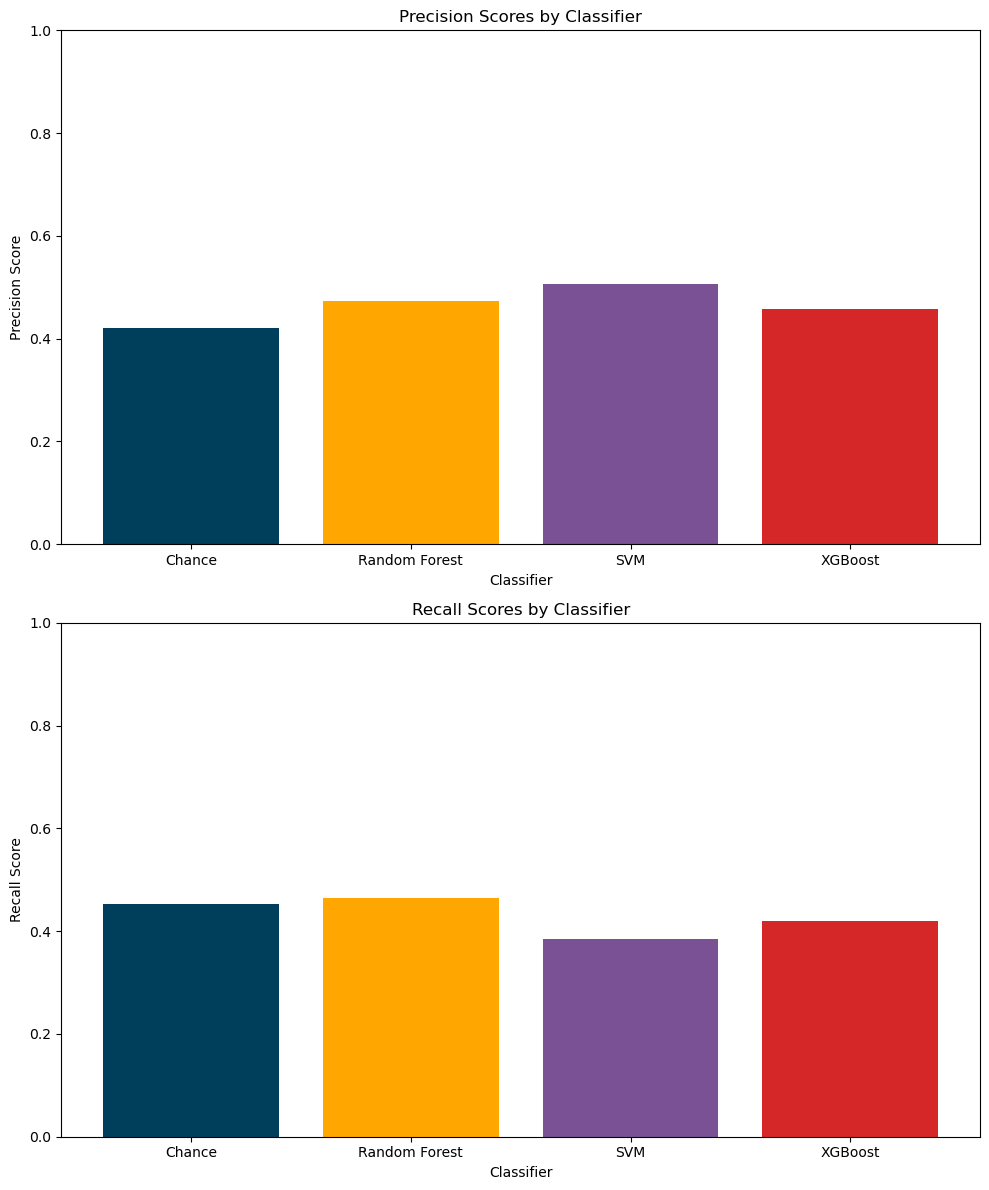

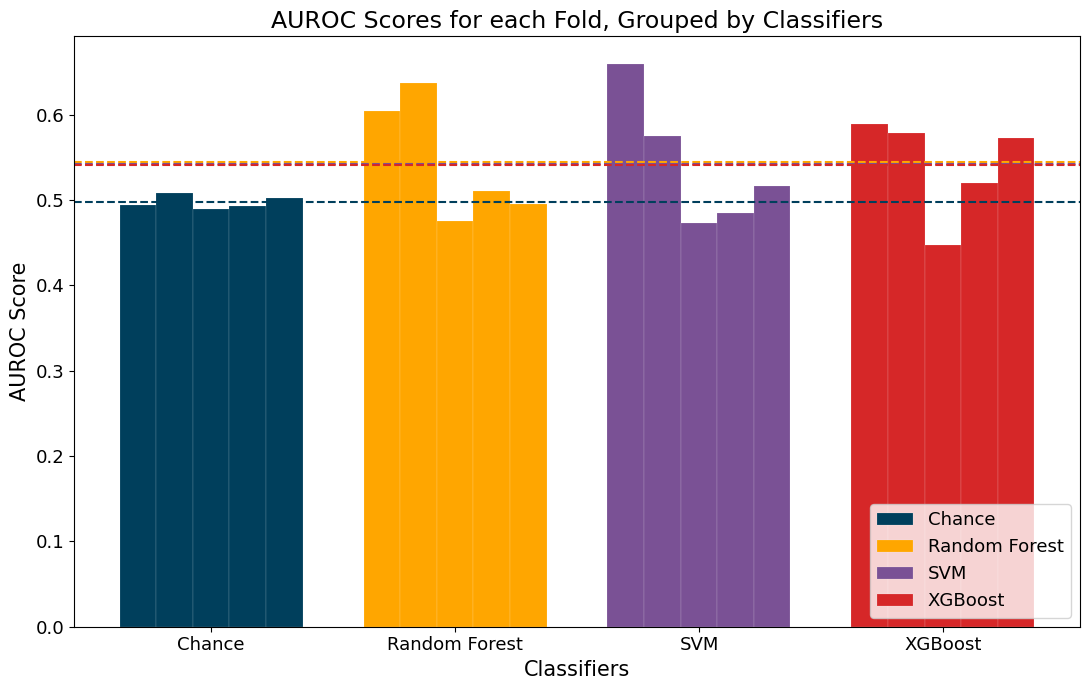

In [47]:
df = df_d5_clean
features = ["PP_Gazes", "PP_AOI_Gazes", "PP_OffscreenPix", "PP_OffscreenProp", "PP_2_Gazes", "PP_2_AOI_Gazes", 
            "PP_2_OffscreenPix", "PP_2_OffscreenProp", "PP_3_Gazes", "PP_3_AOI_Gazes", "PP_3_OffscreenPix", 
            "PP_3_OffscreenProp", "PP_cluster_num_clusters", "PP_cluster_avg_duration", "PP_cluster_sd_duration", 
            "PP_cluster_skew_duration", "PP_dispersion", "PP_2_cluster_num_clusters", "PP_2_cluster_avg_duration", 
            "PP_2_cluster_sd_duration", "PP_2_cluster_skew_duration", "PP_2_dispersion", "PP_3_cluster_num_clusters", 
            "PP_3_cluster_avg_duration", "PP_3_cluster_sd_duration", "PP_3_cluster_skew_duration", "PP_3_dispersion"
]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + NLP

Chance Results:
Avg Accuracy: 0.51
Avg Weighted F1 Score: 0.51
Avg Precision_1: 0.43
Avg Recall_1: 0.42
Avg AUROC: 0.52
Avg Confusion Matrix:
[[32.  23.6]
 [25.  17.8]]
Avg Prediction Rate: 0.42

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.54
Avg Weighted F1 Score: 0.54
Avg Precision_1: 0.47
Avg Recall_1: 0.48
Avg AUROC: 0.56
Avg Confusion Matrix:
[[32.2 23.4]
 [22.2 20.6]]
Avg Prediction Rate: 0.45

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

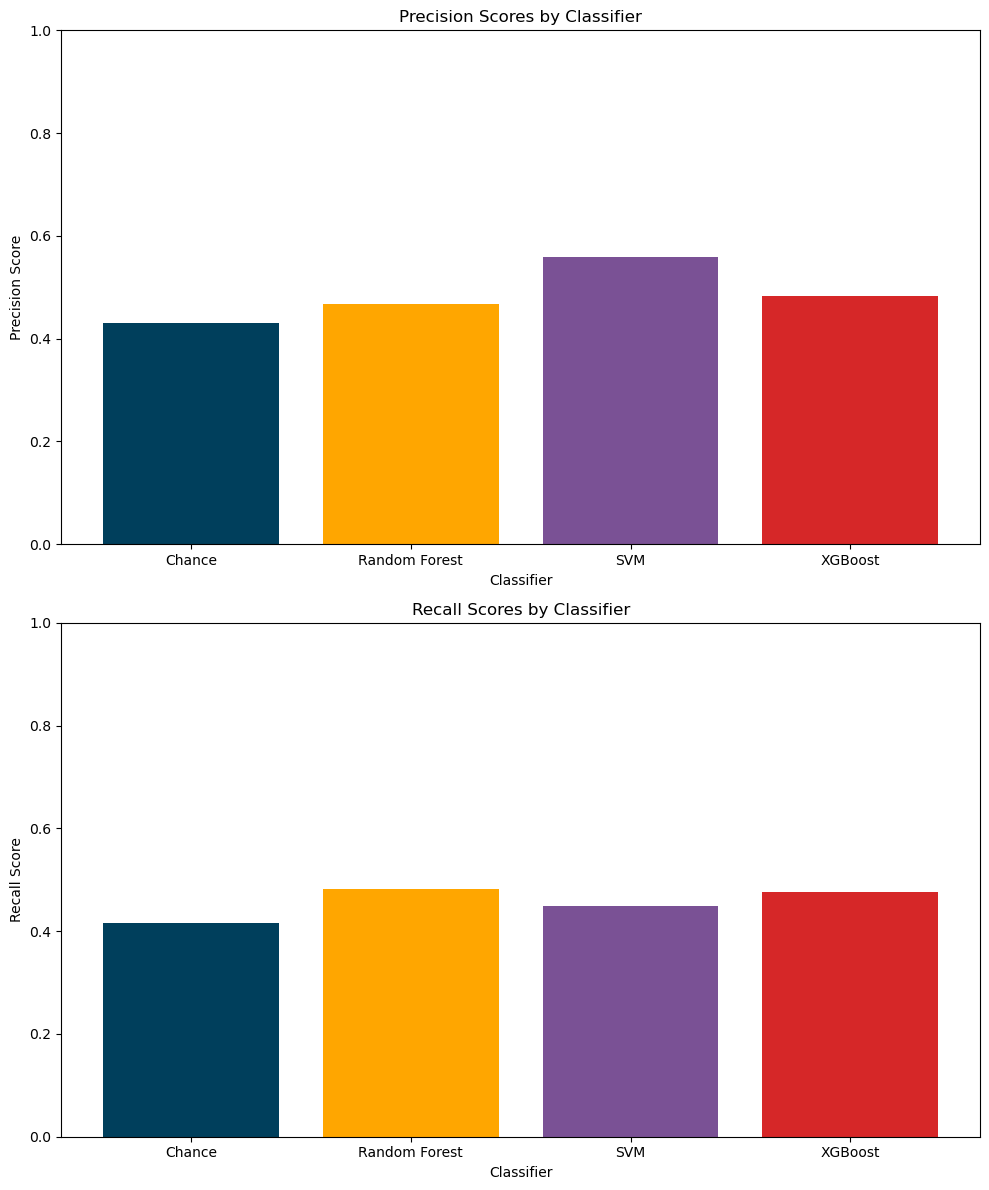

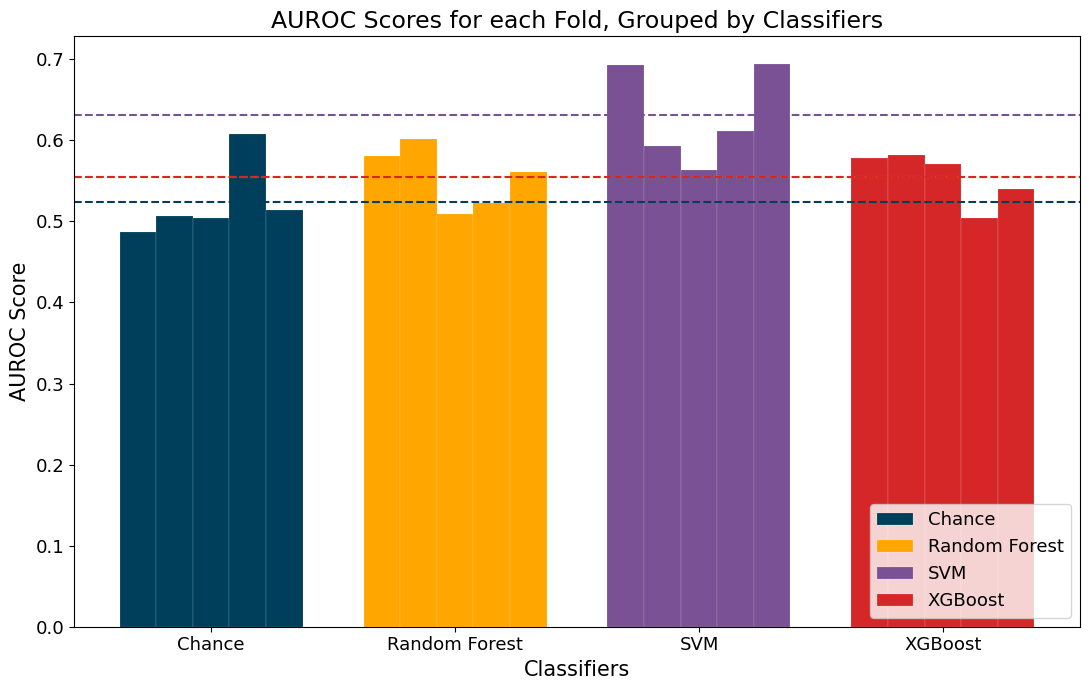

In [48]:
df = df_d5_clean
features = ["PP_Gazes", "PP_AOI_Gazes", "PP_OffscreenPix", "PP_OffscreenProp", "PP_2_Gazes", "PP_2_AOI_Gazes", 
            "PP_2_OffscreenPix", "PP_2_OffscreenProp", "PP_3_Gazes", "PP_3_AOI_Gazes", "PP_3_OffscreenPix", 
            "PP_3_OffscreenProp", "PP_cluster_num_clusters", "PP_cluster_avg_duration", "PP_cluster_sd_duration", 
            "PP_cluster_skew_duration", "PP_dispersion", "PP_2_cluster_num_clusters", "PP_2_cluster_avg_duration", 
            "PP_2_cluster_sd_duration", "PP_2_cluster_skew_duration", "PP_2_dispersion", "PP_3_cluster_num_clusters", 
            "PP_3_cluster_avg_duration", "PP_3_cluster_sd_duration", "PP_3_cluster_skew_duration", "PP_3_dispersion", 
            "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", "wordCount_without_stopwords", 
            "syllableCount_without_stopwords", "sentiment", "PP_CD", "PP_NN", "PP_JJ", "PP_VBN", "PP_VBP", "PP_NNS", "PP_VBD", 
            "PP_VBG", "PP_DT", "PP_IN", "PP_JJS", "PP_MD", "PP_VB", "PP_RB", "PP_VBZ", "PP_RBS", "PP_JJR", "PP_WRB", "PP_RBR", 
            "PP_2_CD", "PP_2_NN", "PP_2_JJ", "PP_2_VBN", "PP_2_VBP", "PP_2_NNS", "PP_2_VBD", "PP_2_VBG", "PP_2_DT", "PP_2_IN", 
            "PP_2_JJS", "PP_2_MD", "PP_2_VB", "PP_2_RB", "PP_2_VBZ", "PP_2_RBS", "PP_2_JJR", "PP_2_WRB", "PP_2_RBR", "PP_3_CD", 
            "PP_3_NN", "PP_3_JJ", "PP_3_VBN", "PP_3_VBP", "PP_3_NNS", "PP_3_VBD", "PP_3_VBG", "PP_3_DT", "PP_3_IN", "PP_3_JJS", 
            "PP_3_MD", "PP_3_VB", "PP_3_RB", "PP_3_VBZ", "PP_3_RBS", "PP_3_JJR", "PP_3_WRB", "PP_3_RBR"
]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

## Other

### NLP FEATURES

Chance Results:
Avg Accuracy: 0.60
Avg Weighted F1 Score: 0.60
Avg Precision_1: 0.53
Avg Recall_1: 0.56
Avg AUROC: 0.47
Avg Confusion Matrix:
[[14.6  8.4]
 [ 8.   9.6]]
Avg Prediction Rate: 0.44

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.57
Avg Weighted F1 Score: 0.56
Avg Precision_1: 0.50
Avg Recall_1: 0.69
Avg AUROC: 0.60
Avg Confusion Matrix:
[[11.  12. ]
 [ 5.6 12. ]]
Avg Prediction Rate: 0.59

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

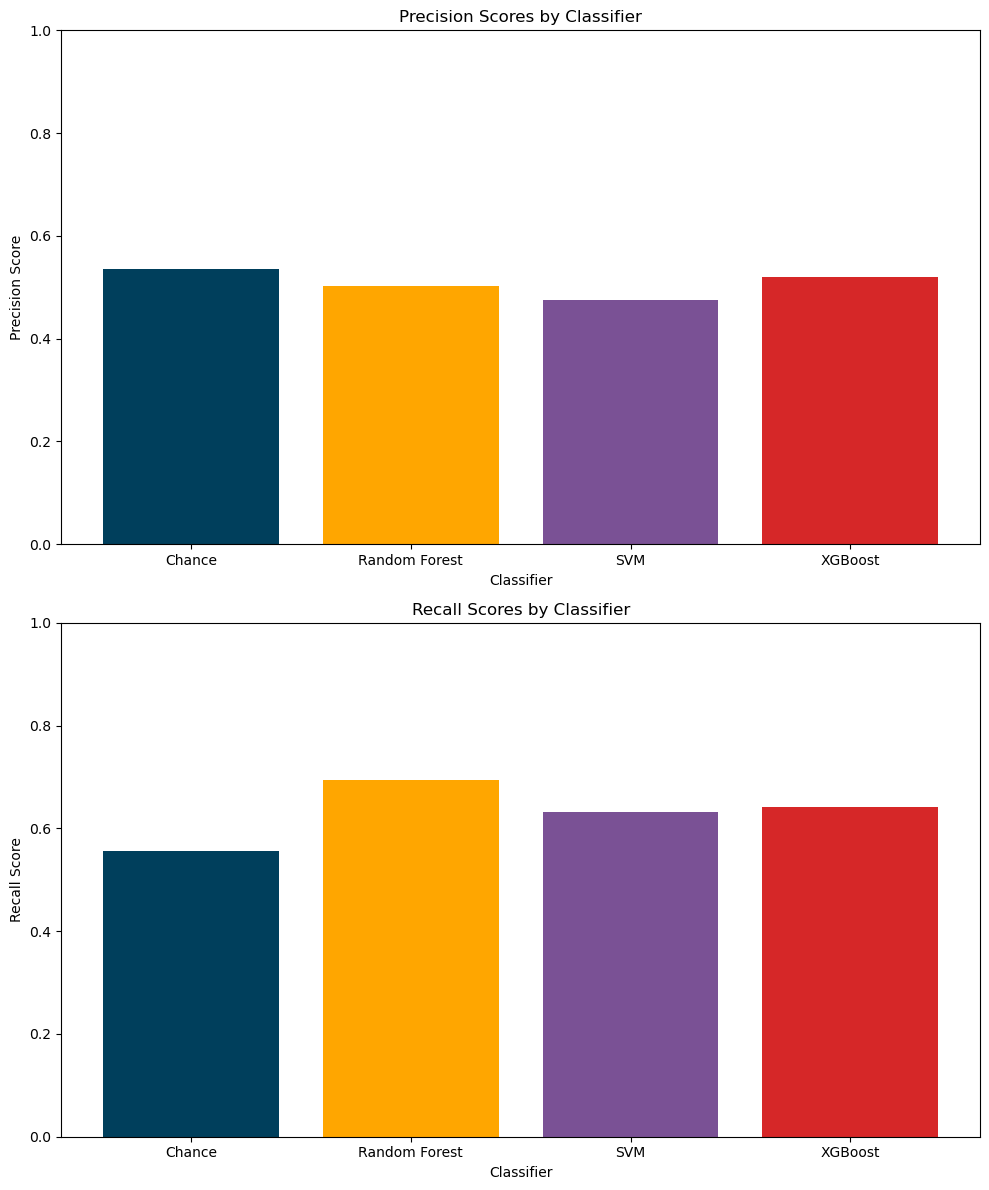

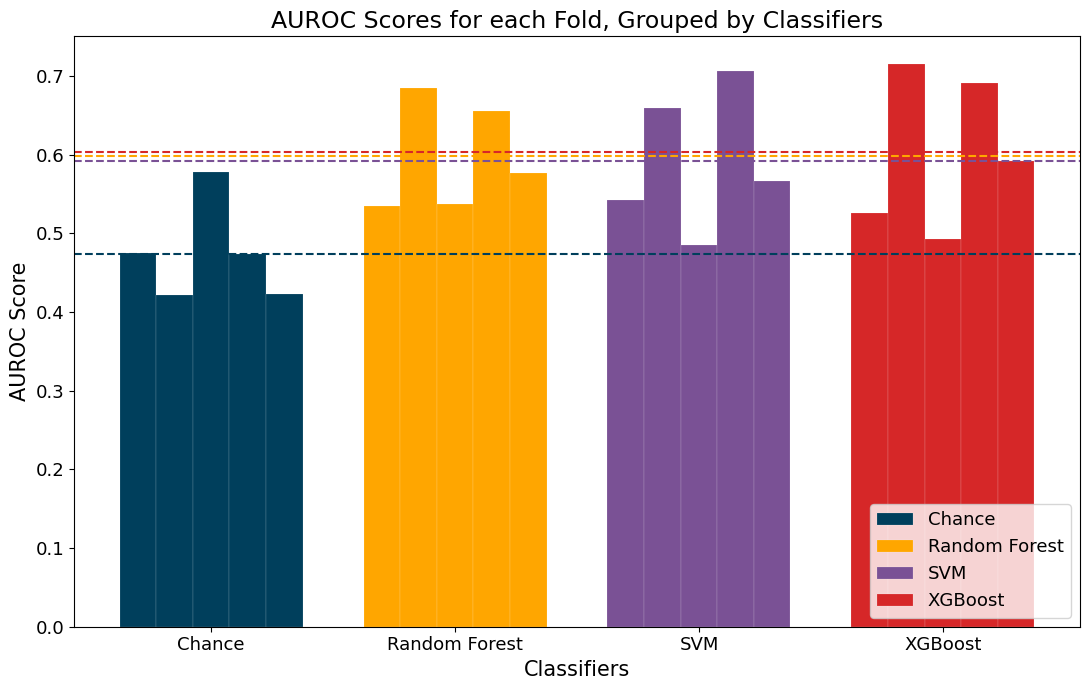

In [49]:
df = df_d6_clean
features = ["wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", "wordCount_without_stopwords", 
            "syllableCount_without_stopwords", "sentiment", "PP_CD", "PP_NN", "PP_JJ", "PP_VBN", "PP_VBP", "PP_NNS", "PP_VBD", 
            "PP_VBG", "PP_DT", "PP_IN", "PP_JJS", "PP_MD", "PP_VB", "PP_RB", "PP_VBZ", "PP_RBS", "PP_JJR", "PP_WRB", "PP_RBR", 
            "PP_2_CD", "PP_2_NN", "PP_2_JJ", "PP_2_VBN", "PP_2_VBP", "PP_2_NNS", "PP_2_VBD", "PP_2_VBG", "PP_2_DT", "PP_2_IN", 
            "PP_2_JJS", "PP_2_MD", "PP_2_VB", "PP_2_RB", "PP_2_VBZ", "PP_2_RBS", "PP_2_JJR", "PP_2_WRB", "PP_2_RBR", "PP_3_CD", 
            "PP_3_NN", "PP_3_JJ", "PP_3_VBN", "PP_3_VBP", "PP_3_NNS", "PP_3_VBD", "PP_3_VBG", "PP_3_DT", "PP_3_IN", "PP_3_JJS", 
            "PP_3_MD", "PP_3_VB", "PP_3_RB", "PP_3_VBZ", "PP_3_RBS", "PP_3_JJR", "PP_3_WRB", "PP_3_RBR"]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION FEATURES

Chance Results:
Avg Accuracy: 0.51
Avg Weighted F1 Score: 0.51
Avg Precision_1: 0.41
Avg Recall_1: 0.42
Avg AUROC: 0.51
Avg Confusion Matrix:
[[13.4  9.6]
 [10.2  7.4]]
Avg Prediction Rate: 0.42

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.55
Avg Weighted F1 Score: 0.54
Avg Precision_1: 0.45
Avg Recall_1: 0.43
Avg AUROC: 0.54
Avg Confusion Matrix:
[[14.4  8.6]
 [ 9.8  7.8]]
Avg Prediction Rate: 0.40

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

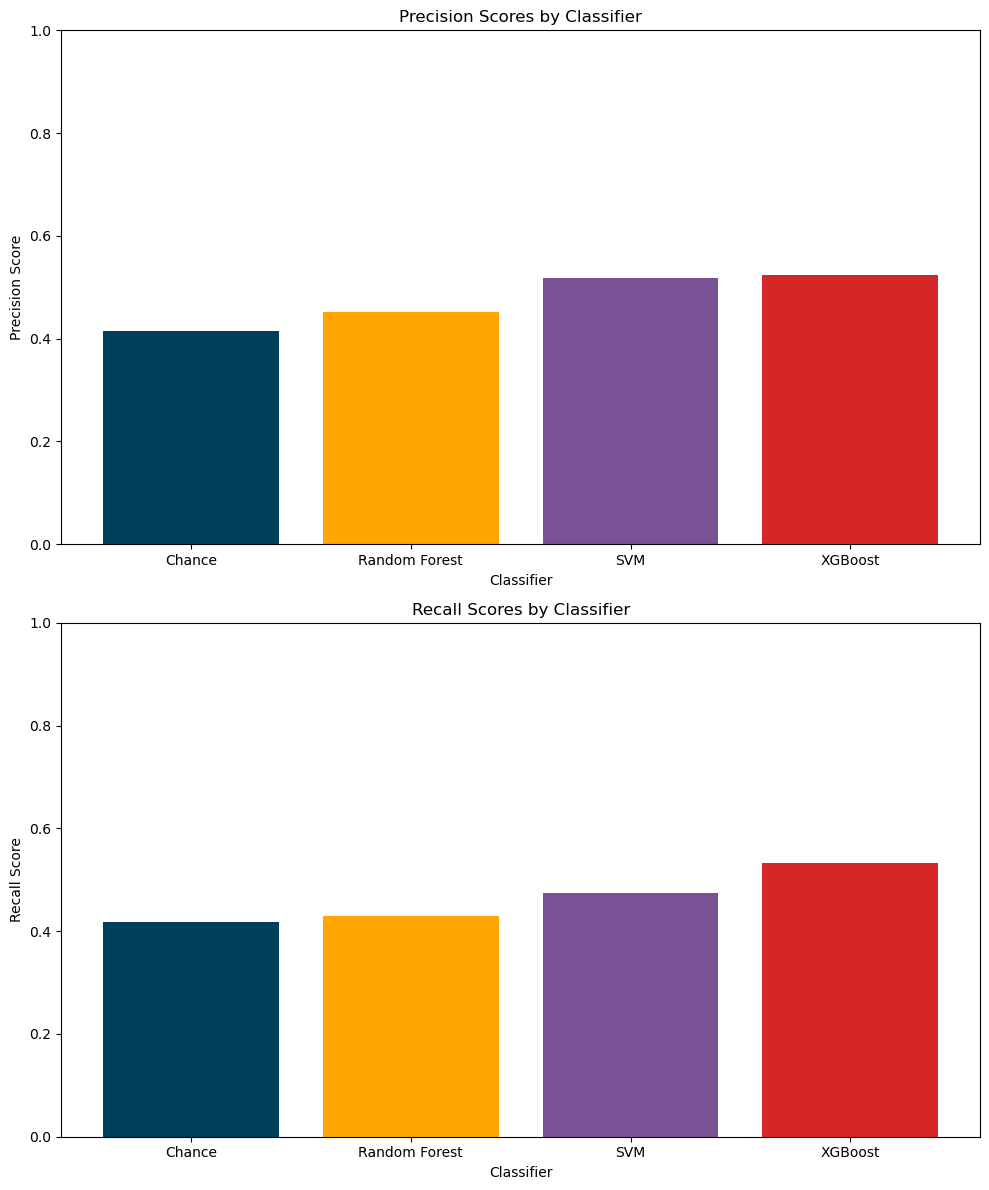

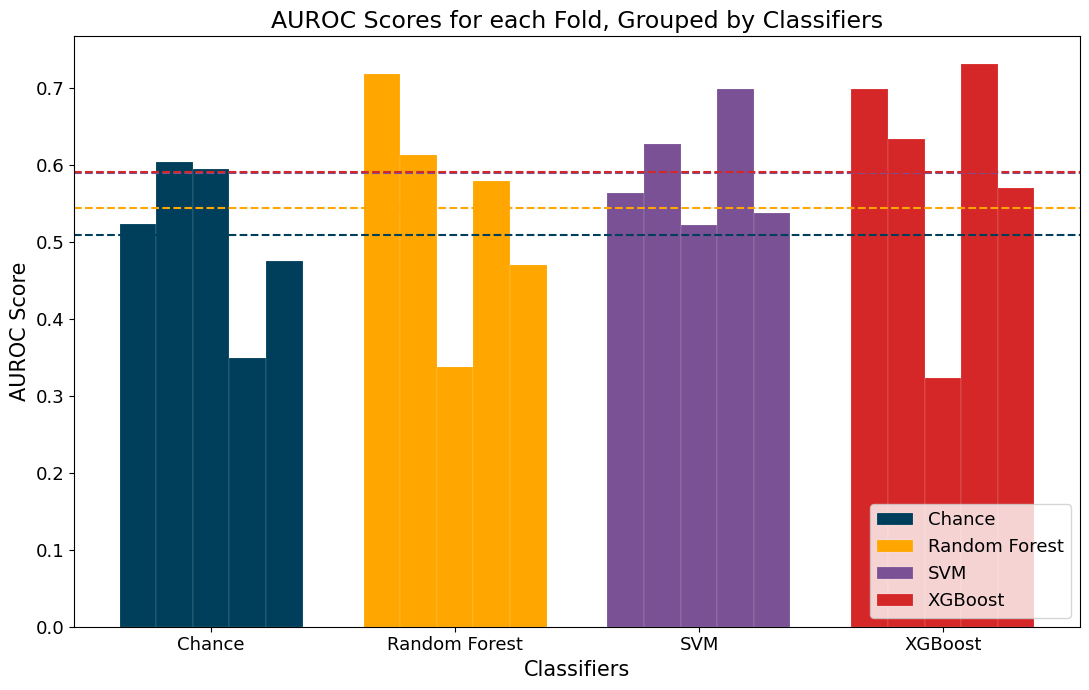

In [50]:
df = df_d6_clean
features = ["PP_Gazes", "PP_AOI_Gazes", "PP_OffscreenPix", "PP_OffscreenProp", "PP_2_Gazes", "PP_2_AOI_Gazes", 
            "PP_2_OffscreenPix", "PP_2_OffscreenProp", "PP_3_Gazes", "PP_3_AOI_Gazes", "PP_3_OffscreenPix", 
            "PP_3_OffscreenProp", "PP_cluster_num_clusters", "PP_cluster_avg_duration", "PP_cluster_sd_duration", 
            "PP_cluster_skew_duration", "PP_dispersion", "PP_2_cluster_num_clusters", "PP_2_cluster_avg_duration", 
            "PP_2_cluster_sd_duration", "PP_2_cluster_skew_duration", "PP_2_dispersion", "PP_3_cluster_num_clusters", 
            "PP_3_cluster_avg_duration", "PP_3_cluster_sd_duration", "PP_3_cluster_skew_duration", "PP_3_dispersion"
]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + NLP

In [ ]:
df = df_d6_clean
features = ["PP_Gazes", "PP_AOI_Gazes", "PP_OffscreenPix", "PP_OffscreenProp", "PP_2_Gazes", "PP_2_AOI_Gazes", 
            "PP_2_OffscreenPix", "PP_2_OffscreenProp", "PP_3_Gazes", "PP_3_AOI_Gazes", "PP_3_OffscreenPix", 
            "PP_3_OffscreenProp", "PP_cluster_num_clusters", "PP_cluster_avg_duration", "PP_cluster_sd_duration", 
            "PP_cluster_skew_duration", "PP_dispersion", "PP_2_cluster_num_clusters", "PP_2_cluster_avg_duration", 
            "PP_2_cluster_sd_duration", "PP_2_cluster_skew_duration", "PP_2_dispersion", "PP_3_cluster_num_clusters", 
            "PP_3_cluster_avg_duration", "PP_3_cluster_sd_duration", "PP_3_cluster_skew_duration", "PP_3_dispersion", 
            "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", "wordCount_without_stopwords", 
            "syllableCount_without_stopwords", "sentiment", "PP_CD", "PP_NN", "PP_JJ", "PP_VBN", "PP_VBP", "PP_NNS", "PP_VBD", 
            "PP_VBG", "PP_DT", "PP_IN", "PP_JJS", "PP_MD", "PP_VB", "PP_RB", "PP_VBZ", "PP_RBS", "PP_JJR", "PP_WRB", "PP_RBR", 
            "PP_2_CD", "PP_2_NN", "PP_2_JJ", "PP_2_VBN", "PP_2_VBP", "PP_2_NNS", "PP_2_VBD", "PP_2_VBG", "PP_2_DT", "PP_2_IN", 
            "PP_2_JJS", "PP_2_MD", "PP_2_VB", "PP_2_RB", "PP_2_VBZ", "PP_2_RBS", "PP_2_JJR", "PP_2_WRB", "PP_2_RBR", "PP_3_CD", 
            "PP_3_NN", "PP_3_JJ", "PP_3_VBN", "PP_3_VBP", "PP_3_NNS", "PP_3_VBD", "PP_3_VBG", "PP_3_DT", "PP_3_IN", "PP_3_JJS", 
            "PP_3_MD", "PP_3_VB", "PP_3_RB", "PP_3_VBZ", "PP_3_RBS", "PP_3_JJR", "PP_3_WRB", "PP_3_RBR"
]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

Chance Results:
Avg Accuracy: 0.49
Avg Weighted F1 Score: 0.49
Avg Precision_1: 0.43
Avg Recall_1: 0.46
Avg AUROC: 0.44
Avg Confusion Matrix:
[[12.  11. ]
 [ 9.6  8. ]]
Avg Prediction Rate: 0.47

Fitting 5 folds for each of 72 candidates, totalling 360 fits


## MODELING "Prefer not to respond" and "I have never been diagnosed with any listed diagnosis"

### NLP FEATURES

In [ ]:
df = df_d7_d8_clean
features = ["wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", "wordCount_without_stopwords", 
            "syllableCount_without_stopwords", "sentiment", "PP_CD", "PP_NN", "PP_JJ", "PP_VBN", "PP_VBP", "PP_NNS", "PP_VBD", 
            "PP_VBG", "PP_DT", "PP_IN", "PP_JJS", "PP_MD", "PP_VB", "PP_RB", "PP_VBZ", "PP_RBS", "PP_JJR", "PP_WRB", "PP_RBR", 
            "PP_2_CD", "PP_2_NN", "PP_2_JJ", "PP_2_VBN", "PP_2_VBP", "PP_2_NNS", "PP_2_VBD", "PP_2_VBG", "PP_2_DT", "PP_2_IN", 
            "PP_2_JJS", "PP_2_MD", "PP_2_VB", "PP_2_RB", "PP_2_VBZ", "PP_2_RBS", "PP_2_JJR", "PP_2_WRB", "PP_2_RBR", "PP_3_CD", 
            "PP_3_NN", "PP_3_JJ", "PP_3_VBN", "PP_3_VBP", "PP_3_NNS", "PP_3_VBD", "PP_3_VBG", "PP_3_DT", "PP_3_IN", "PP_3_JJS", 
            "PP_3_MD", "PP_3_VB", "PP_3_RB", "PP_3_VBZ", "PP_3_RBS", "PP_3_JJR", "PP_3_WRB", "PP_3_RBR"]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION FEATURES

In [ ]:
df = df_d7_d8_clean
features = ["PP_Gazes", "PP_AOI_Gazes", "PP_OffscreenPix", "PP_OffscreenProp", "PP_2_Gazes", "PP_2_AOI_Gazes", 
            "PP_2_OffscreenPix", "PP_2_OffscreenProp", "PP_3_Gazes", "PP_3_AOI_Gazes", "PP_3_OffscreenPix", 
            "PP_3_OffscreenProp", "PP_cluster_num_clusters", "PP_cluster_avg_duration", "PP_cluster_sd_duration", 
            "PP_cluster_skew_duration", "PP_dispersion", "PP_2_cluster_num_clusters", "PP_2_cluster_avg_duration", 
            "PP_2_cluster_sd_duration", "PP_2_cluster_skew_duration", "PP_2_dispersion", "PP_3_cluster_num_clusters", 
            "PP_3_cluster_avg_duration", "PP_3_cluster_sd_duration", "PP_3_cluster_skew_duration", "PP_3_dispersion"
]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + NLP

In [ ]:
df = df_d7_d8_clean
features = ["PP_Gazes", "PP_AOI_Gazes", "PP_OffscreenPix", "PP_OffscreenProp", "PP_2_Gazes", "PP_2_AOI_Gazes", 
            "PP_2_OffscreenPix", "PP_2_OffscreenProp", "PP_3_Gazes", "PP_3_AOI_Gazes", "PP_3_OffscreenPix", 
            "PP_3_OffscreenProp", "PP_cluster_num_clusters", "PP_cluster_avg_duration", "PP_cluster_sd_duration", 
            "PP_cluster_skew_duration", "PP_dispersion", "PP_2_cluster_num_clusters", "PP_2_cluster_avg_duration", 
            "PP_2_cluster_sd_duration", "PP_2_cluster_skew_duration", "PP_2_dispersion", "PP_3_cluster_num_clusters", 
            "PP_3_cluster_avg_duration", "PP_3_cluster_sd_duration", "PP_3_cluster_skew_duration", "PP_3_dispersion", 
            "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", "wordCount_without_stopwords", 
            "syllableCount_without_stopwords", "sentiment", "PP_CD", "PP_NN", "PP_JJ", "PP_VBN", "PP_VBP", "PP_NNS", "PP_VBD", 
            "PP_VBG", "PP_DT", "PP_IN", "PP_JJS", "PP_MD", "PP_VB", "PP_RB", "PP_VBZ", "PP_RBS", "PP_JJR", "PP_WRB", "PP_RBR", 
            "PP_2_CD", "PP_2_NN", "PP_2_JJ", "PP_2_VBN", "PP_2_VBP", "PP_2_NNS", "PP_2_VBD", "PP_2_VBG", "PP_2_DT", "PP_2_IN", 
            "PP_2_JJS", "PP_2_MD", "PP_2_VB", "PP_2_RB", "PP_2_VBZ", "PP_2_RBS", "PP_2_JJR", "PP_2_WRB", "PP_2_RBR", "PP_3_CD", 
            "PP_3_NN", "PP_3_JJ", "PP_3_VBN", "PP_3_VBP", "PP_3_NNS", "PP_3_VBD", "PP_3_VBG", "PP_3_DT", "PP_3_IN", "PP_3_JJS", 
            "PP_3_MD", "PP_3_VB", "PP_3_RB", "PP_3_VBZ", "PP_3_RBS", "PP_3_JJR", "PP_3_WRB", "PP_3_RBR"
]

precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, kappa_dict, auroc_score_barplot, classifiers)